# Experiments

# Import libraries

In [65]:
!pip install --upgrade pip setuptools
!pip install wordcloud
# !pip install lightgbm
!pip install nltk
!pip install imbalanced-learn
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn
!pip install -U Textblob
!python -m textblob.download_corpora
!pip install unidecode
# !pip install lightgbm==2.2.3
!pip install contractions
!pip install scikit-optimize
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 2.3 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.2.0
    Uninstalling setuptools-69.2.0:
      Successfully uninstalled setuptools-69.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
[nltk_data] Downloading package brown to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data] 

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [323]:
# import modules
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import nltk
import re
import joblib
import contractions
import scipy.stats

# modules preprocessing
from matplotlib.ticker import FormatStrFormatter 
from matplotlib.colors import LinearSegmentedColormap
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from wordcloud import WordCloud
from collections import Counter
from unidecode import unidecode
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
import contractions
from scipy.stats import randint, uniform

# sentiment & transforming features
from textblob import TextBlob
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler

# algorithms
from sklearn.ensemble import RandomForestClassifier
# import lightgbm as lgb
from sklearn.svm import SVC

# evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, mean_absolute_error,  mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import spearmanr
from scipy.stats import pearsonr

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sebastianhaecker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load clean data 

In [404]:
df = pd.read_csv('clean_data.csv', index_col=0)
# df = pd.read_csv('/content/drive/MyDrive/3_classes/clean_data.csv', index_col=0)  # running lightgbm in colab

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75790 entries, 0 to 362281
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        75790 non-null  object
 1   Reviews    75790 non-null  object
 2   Sex        75790 non-null  object
 3   EaseofUse  75790 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


### Experiment polarity score RUN ONLY WHEN ADDING POLARITY TO THE EXPERIMENT

In [406]:
# Textblob on the reviews to extract sentiment: the polarity score, RUN ONLY WHEN TESTED WITH POLARITY SCORE
sentiment_scores = df['Reviews'].apply(lambda x: TextBlob(x).sentiment)
polarity_scores = sentiment_scores.apply(lambda x: x.polarity)
# Add polarity scores as predictive features
df['Polarity_score_review'] = polarity_scores

In [411]:
# Pearson correlation, Spearman correlation 
# codes are taken and hereby given credits from 
# https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
# https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/

usability = df['EaseofUse']
pol = df['Polarity_score_review']
corr, _ = pearsonr(usability, pol)
print('Pearsons correlation: %.4f' % corr)

coef, p = spearmanr(usability, pol)
print('Spearmans correlation coefficient: %.4f' % coef)

Pearsons correlation: 0.2156
Spearmans correlation coefficient: 0.2166


<class 'pandas.core.frame.DataFrame'>
Index: 75790 entries, 0 to 362281
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    75790 non-null  object 
 1   Reviews                75790 non-null  object 
 2   Sex                    75790 non-null  object 
 3   EaseofUse              75790 non-null  int64  
 4   Polarity_score_review  75790 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.5+ MB


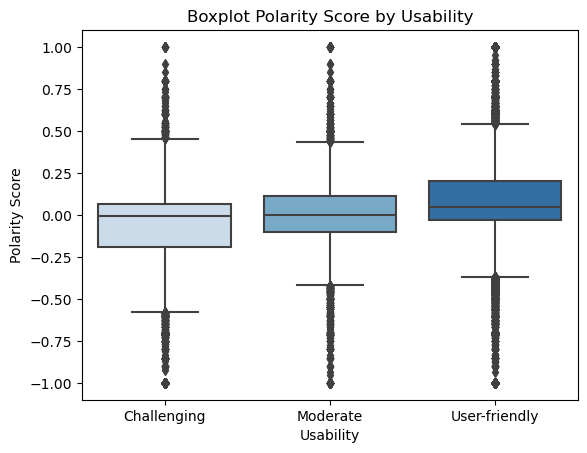

In [403]:
df.info()
filtered_df = df[df['EaseofUse'].isin([1, 2, 3])]
blue_palette = sns.color_palette("Blues", 3)
labels = {1: 'Challenging', 2: 'Moderate', 3: 'User-friendly'}
sns.boxplot(x='EaseofUse', y='Polarity_score_review', data=filtered_df, palette=blue_palette, order=[1, 2, 3])
plt.xlabel('Usability')
plt.ylabel('Polarity Score')
plt.title('Boxplot Polarity Score by Usability')
plt.xticks([0, 1, 2], [labels[val] for val in [1, 2, 3]]) 
# plt.savefig('distributionPolarity.png', dpi=300, bbox_inches='tight')
plt.show()

In [385]:
df.groupby('EaseofUse')['Polarity_score_review'].mean()

EaseofUse
1   -0.069501
2   -0.004377
3    0.074715
Name: Polarity_score_review, dtype: float64

In [364]:
df.loc[(df['EaseofUse'] == 3) & (df['Polarity_score_review'] == -0.5)].head(20)
                                                                         

Age                                            Reviews     Sex  \
57          19-24  prescribed lysteda treat severe menstrual cram...  Female   
995         45-54  sciatic nerve pain  although medication extrem...  Female   
2211        35-44  unfortunately  lyrica control pain  work  cogn...  Female   
3328        55-64  taking medication became extremely ill two day...    Male   
3687        45-54  kimberly  49 try 700   come way  real gross fi...  Female   
4976        55-64  third blood pressure mediaction body reaction ...  Female   
5750        65-74  losartan 50mg lower blood pressure  cause hand...  Female   
5946   75 or over  taking drug four year  noticed stiffness pain ...  Female   
7141        45-54     luxury made athlete foot worse  disappointing   Female   
7160        65-74  expensive ask doctor discount coupon went  470...    Male   
10717       35-44  caused horrible cough lasted entire time takin...  Female   
10880       25-34  medication made extremely angry  irritable dep...  Female   
11543       65-74  drug 3days tired  hacking cough  problem breat...    Male   
11548       65-74  caused sever sinus problem almost constant cou...  Female   
19350       55-64  worst nausea daily taking medication  bowel mo...  Female   
19726       55-64  linz helped constipation problem unable purcha...    Male   
19806       55-64  see change condition  taking 3 week  meantime ...  Female   
20539       45-54  hair loss common  kidding  knew ahead time  mi...  Female   
20949  75 or over                 unfortunately lost hair bald spot   Female   
26412       55-64  drug year reading comment got  oh    instance ...  Female   

       EaseofUse  Polarity_score_review  
57             3                   -0.5  
995            3                   -0.5  
2211           3                   -0.5  
3328           3                   -0.5  
3687           3                   -0.5  
4976           3                   -0.5  
5750           3                   -0.5  
5946           3                   -0.5  
7141           3                   -0.5  
7160           3                   -0.5  
10717          3                   -0.5  
10880          3                   -0.5  
11543          3                   -0.5  
11548          3                   -0.5  
19350          3                   -0.5  
19726          3                   -0.5  
19806          3                   -0.5  
20539          3                   -0.5  
20949          3                   -0.5  
26412          3                   -0.5

In [365]:
df.Reviews.loc[5750]

'losartan 50mg lower blood pressure  cause hand tremor  writing difficult '

### Train/Test split

In [251]:
df.head()

Age                                            Reviews     Sex  \
0   75 or over  retired physician med tried allergy  seasonal ...    Male   
6        25-34  gotten pregnant job  switched brand another ge...  Female   
7        45-54  take 5 year age  prevent ovarian cyst  2 burst...  Female   
9        55-64                         12 hour spray work 6 hour     Male   
13       19-24  usually zero little acne  month taking medicat...  Female   

    EaseofUse  
0           3  
6           3  
7           3  
9           3  
13          1

In [252]:
# Split data in train and test
train, test = train_test_split(df, test_size=0.1, random_state=42, stratify=df['EaseofUse'])

In [253]:
print (test.shape[0])
print (train.shape[0])

7579
68211


In [254]:
test.EaseofUse.value_counts()

EaseofUse
3    5466
1    1288
2     825
Name: count, dtype: int64

In [255]:
# train.EaseofUse.value_counts()
test.EaseofUse.value_counts()
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7579 entries, 211222 to 44054
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        7579 non-null   object
 1   Reviews    7579 non-null   object
 2   Sex        7579 non-null   object
 3   EaseofUse  7579 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 296.1+ KB
None


In [256]:
train.EaseofUse.value_counts()
print (train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68211 entries, 233007 to 200930
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        68211 non-null  object
 1   Reviews    68211 non-null  object
 2   Sex        68211 non-null  object
 3   EaseofUse  68211 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.6+ MB
None


### DROP ONLY WHEN TESTING WITHOUT ADDITIONAL FEATURES

In [213]:
# Drop features for experiment 3, DROP ONLY WHEN TESTED WITHOUT ADDITIONAL FEATURES 
train.drop(columns=['Age', 'Sex'], inplace= True)
test.drop(columns=['Age', 'Sex'], inplace= True)

In [257]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68211 entries, 233007 to 200930
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        68211 non-null  object
 1   Reviews    68211 non-null  object
 2   Sex        68211 non-null  object
 3   EaseofUse  68211 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 7579 entries, 211222 to 44054
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        7579 non-null   object
 1   Reviews    7579 non-null   object
 2   Sex        7579 non-null   object
 3   EaseofUse  7579 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 296.1+ KB
None


### Undersample train set

In [258]:
# Class imbalance Undersampling the data distribution with RandomUnderSampler
X_train = train.drop(columns=['EaseofUse'])
y_train = train['EaseofUse']
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train['EaseofUse'] = y_train_resampled
print(train.EaseofUse.value_counts())

EaseofUse
1    7422
2    7422
3    7422
Name: count, dtype: int64


In [269]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22266 entries, 183081 to 193215
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        22266 non-null  object
 1   Reviews    22266 non-null  object
 2   Sex        22266 non-null  object
 3   EaseofUse  22266 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 869.8+ KB


In [217]:
print(train.shape[0])

22266


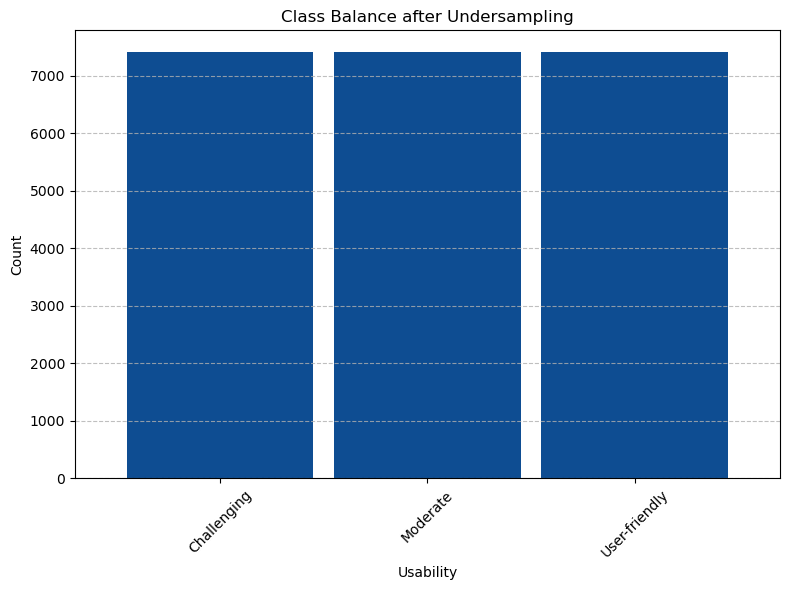

In [1075]:
# Plot class balance 
class_labels = {1: 'Challenging', 2: 'Moderate', 3: 'User-friendly'}
class_counts = train['EaseofUse'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', width=0.9, color='#0E4D92') 
plt.title('Class Balance after Undersampling')
plt.xlabel('Usability')
plt.ylabel('Count')
plt.xticks(range(len(class_labels)), [class_labels[label] for label in class_counts.index], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
# plt.savefig('class_balance.png', dpi=300, bbox_inches='tight')
plt.show()

### Transform features

In [219]:
# Encode categorical features with dummies encoding en label encoding RUN ONLY WHEN TESTING WITH FEATURES FROM DATASET
train = pd.get_dummies(train, columns=['Sex'])
test = pd.get_dummies(test, columns=['Sex'])

ordinal_encoder = OrdinalEncoder()
train['Age'] = ordinal_encoder.fit_transform(train[['Age']])
test['Age'] = ordinal_encoder.transform(test[['Age']])

### CHANGE SETTINGS WHEN RUN WITH UNIGRAMS, BIGRAMS 

In [220]:
# Apply TF-IDF and ngrams on the review fature to be processed, CHANGE SETTING WHEN RUNNING UNIGRAMS, BIGRAMS OR TOGHETHER 
# tfidf_vectorizer = TfidfVectorizer(use_idf= True,smooth_idf = False, min_df= 0.005) #default
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1),smooth_idf = False, min_df= 0.005) #unigrams 
# tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), use_idf= True,smooth_idf = False, min_df= 0.005) #unigrams and bigrams

# Transform reviews
tfidf_train = tfidf_vectorizer.fit_transform(train['Reviews'])
tfidf_test = tfidf_vectorizer.transform(test['Reviews'])

# Convert to dataframe
X_train_text = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=train.index)
X_test_text = pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=test.index)

# Concatenate and make dataframe
train = pd.concat([train.drop(columns='Reviews'), X_train_text], axis=1)
test = pd.concat([test.drop(columns='Reviews'), X_test_text], axis=1)

In [221]:
print (train.shape)
print (test.shape)

(22266, 930)
(7579, 930)


In [222]:
# Check the feature weights created by TFIDF
feature_names = tfidf_vectorizer.get_feature_names_out()
weights = np.asarray(tfidf_vectorizer.idf_)
features_df = pd.DataFrame({'feature': feature_names, 'weight': weights})
features_df = features_df.sort_values(by='weight', ascending=False)
print(features_df.tail(20))

        feature    weight
306        feel  3.031820
92         back  3.006451
911        work  2.972304
238      doctor  2.961389
759     started  2.942100
919       would  2.917354
344         get  2.846875
464        like  2.817416
894        week  2.760980
505  medication  2.760980
250        drug  2.693294
921        year  2.690612
526       month  2.683332
830        time  2.665836
585        pain  2.566839
261      effect  2.549559
802        take  2.548290
724        side  2.538411
804      taking  2.366286
209         day  2.253976


In [223]:
# Split the train and test set for prediction in: X_train, y_train, X_test, y_test
X_train = train.drop(columns=['EaseofUse'])
y_train = train['EaseofUse']
X_test = test.drop(columns=['EaseofUse'])
y_test = test['EaseofUse']

In [224]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(22266, 929)
(22266,)
(7579, 929)
(7579,)


In [225]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22266 entries, 183081 to 193215
Columns: 929 entries, Polarity_score_review to zero
dtypes: float64(929)
memory usage: 158.0 MB


In [ ]:
# The code was sourced from: https://github.com/autogluon/autogluon/issues/399
# RUN ONLY IF ERROR WITH LIGHTGBM 

# # Function to clean columns name for only in case of LightGBM error 
# def clean_col(columns):
#     new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in columns}
#     new_n_list = list(new_names.values())
#     new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
#     return new_names

# # Clean the column names of X_train and X_test
# X_train.rename(columns=clean_col(X_train.columns), inplace=True)
# X_test.rename(columns=clean_col(X_train.columns), inplace=True)

### RUN ONLY FOR SVM

In [226]:
# Perform scaling voor SVM, run for SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Results Experiment 1 baseline raw_data vs undersampling

## --> Random Forests 

In [451]:
# Baseline Random Forests without undersampling 
rf_raw = RandomForestClassifier(random_state=42)
rf_raw.fit(X_train, y_train)
y_pred = rf_raw.predict(X_test)

Test MAE: 0.445
Test RMSE: 0.883
Test CWK: 0.084


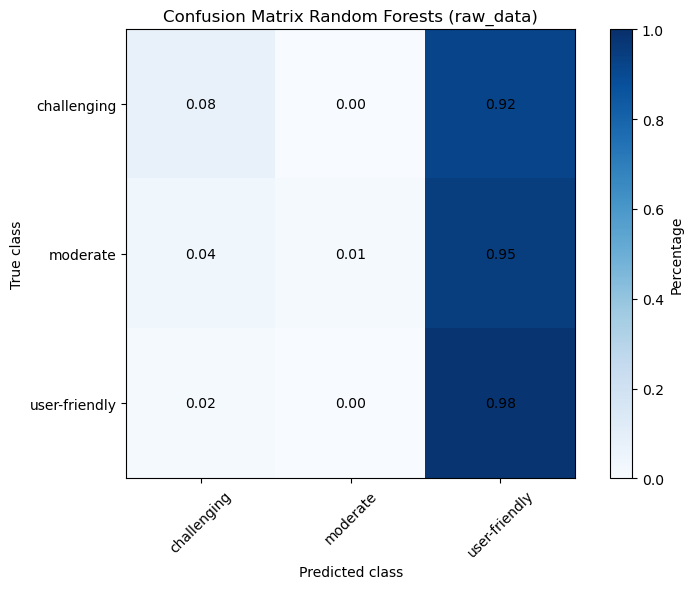

In [452]:
# Evaluation
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests (raw_data)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('confusion_matrix_rawdata.png')
plt.show()

In [1130]:
# Baseline Random Forests with undersampling
rf_under = RandomForestClassifier(random_state = 42)
rf_under.fit(X_train, y_train)
y_pred = rf_under.predict(X_test)

Test MAE: 0.661
Test RMSE: 1.024
Test CWK: 0.284



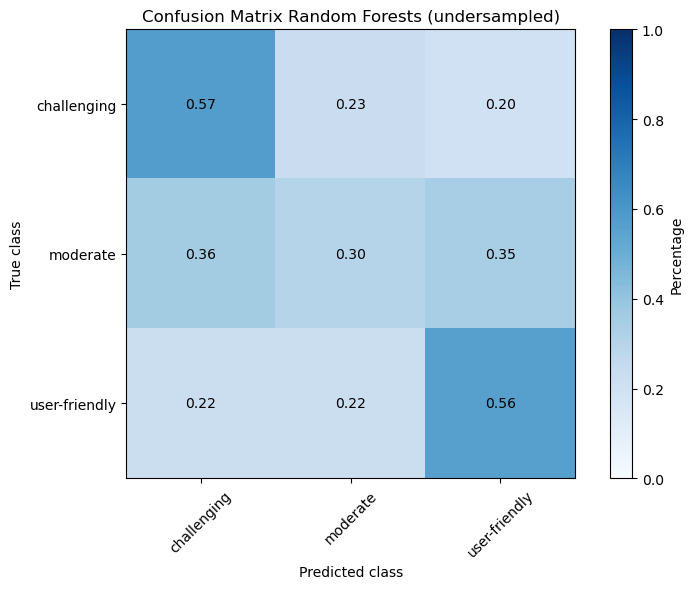

In [1131]:
# Evaluation
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')
print ()

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests (undersampled)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.tight_layout()
# plt.savefig('RFconfusion_matrix_baseline.png')
plt.show()

## --> LightGBM

In [77]:
# Baseline LightGBM without undersampling
lgbm_raw = lgb.LGBMClassifier(objective='multiclass', num_class=3, verbose=-1, random_state = 42)
lgbm_raw.fit(X_train, y_train)
y_pred = lgbm_raw.predict(X_test)

Test MAE: 0.426
Test RMSE: 0.862
Test CWK: 0.193


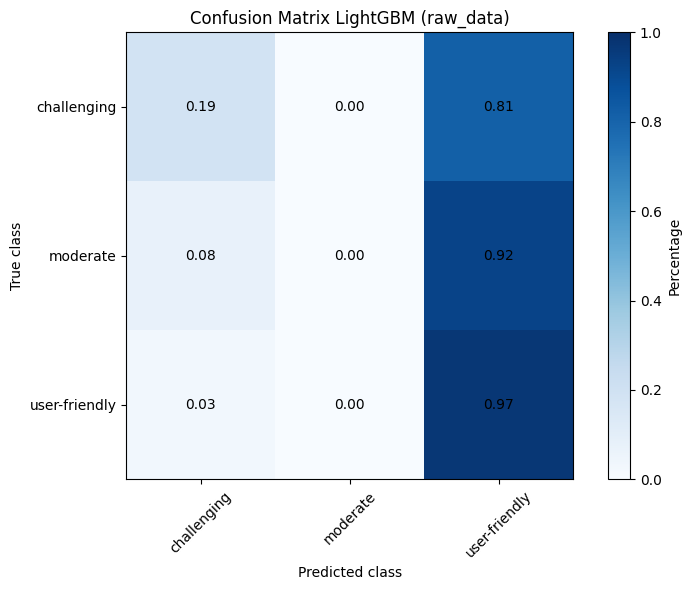

In [78]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM (raw_data)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/confusion_matrix_rawdata.png')
plt.show()

In [60]:
# Baseline LightGBM with undersampling
lgbm_under = lgb.LGBMClassifier(objective='multiclass', num_class=3, verbose=-1, random_state=42)
lgbm_under.fit(X_train, y_train)
y_pred = lgbm_under.predict(X_test)

Test MAE: 0.640
Test RMSE: 0.982
Test CWK: 0.307


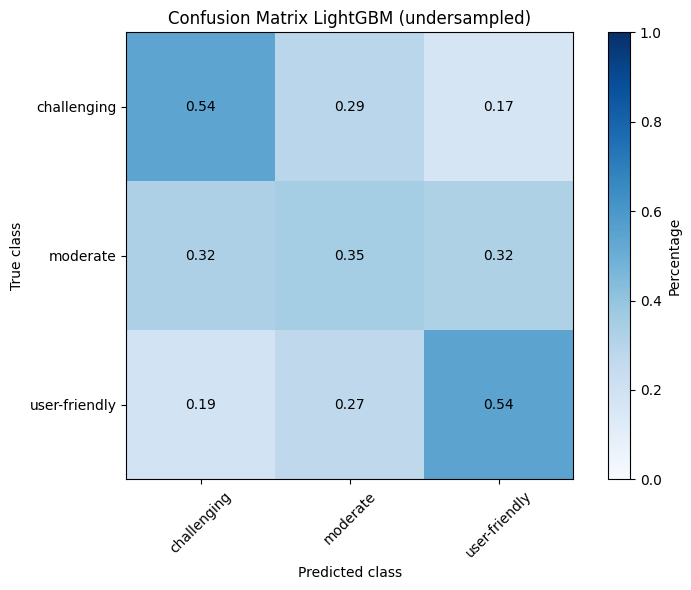

In [34]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM (undersampled)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/confusion_matrix_underdata.png')
plt.show()

## --> SVC

In [643]:
# Baseline SVC without undersampling 
start_time = time.time()

svc_raw = SVC(kernel='rbf', decision_function_shape='ovr', verbose = 0,  random_state = 42)
svc_raw.fit(X_train, y_train)
y_pred = svc_raw.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Execution time: 2 hours, 34 minutes, 55 seconds


Test MAE: 0.433
Test RMSE: 0.870
Test CWK: 0.109


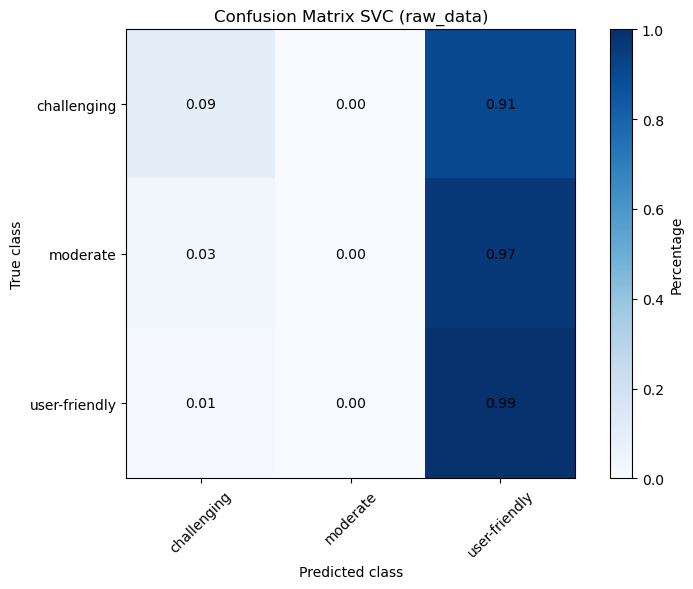

In [644]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC (raw_data)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('confusion_matrix_rawdataSVC.png')
plt.show()

In [626]:
# Baseline SVC with undersampling 
start_time = time.time()

svc_under = SVC(kernel='rbf', decision_function_shape='ovr', random_state = 42, verbose = 0)
svc_under.fit(X_train, y_train)
y_pred = svc_under.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Execution time: 0 hours, 9 minutes, 28 seconds


Test MAE: 0.645
Test RMSE: 0.984
Test CWK: 0.303


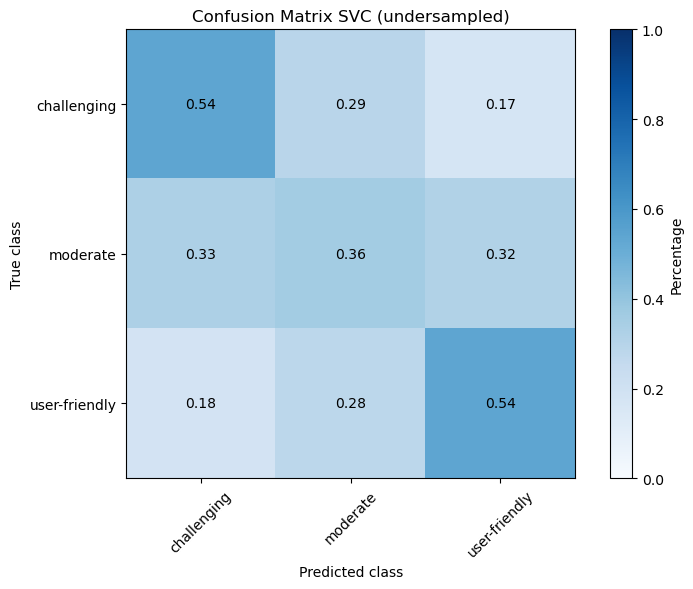

In [627]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC (undersampled)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('confusion_matrix_undersampledSVC.png')
plt.show()

# Results Experiment 2 with TF-IDF unigrams and bigrams (-/+ polarity score)

### Random Forests tfidf unigrams

In [1384]:
# Hyperparameter tuning: Randomized search
start_time = time.time()

param_grid = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy'], 
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs=-1,
                                   verbose = 3, 
                                   random_state=42)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best score found: ",-rf_random.best_score_)
print ('Best estimator:', rf_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.659 total time=   5.7s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.660 total time=   5.8s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.684 total time=   5.8s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.664 total time=   5.9s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.658 total time=   5.9s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.657 total time=  36.2s
[CV 3/5] END bootstr

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.652 total time= 4.3min
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.650 total time= 4.3min
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.634 total time= 4.3min
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.674 total time= 4.3min
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.661 total time= 1.9min
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.663 total time= 1.8min
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7,

In [1385]:
# Save Randomized and 5CV results 
RF1_CV = pd.DataFrame(rf_random.cv_results_)
RF1_CV.to_csv('RF1_CV.csv', index=False)
box_fig = pd.read_csv('RF1_CV.csv')

In [541]:
# box_fig.head(100)

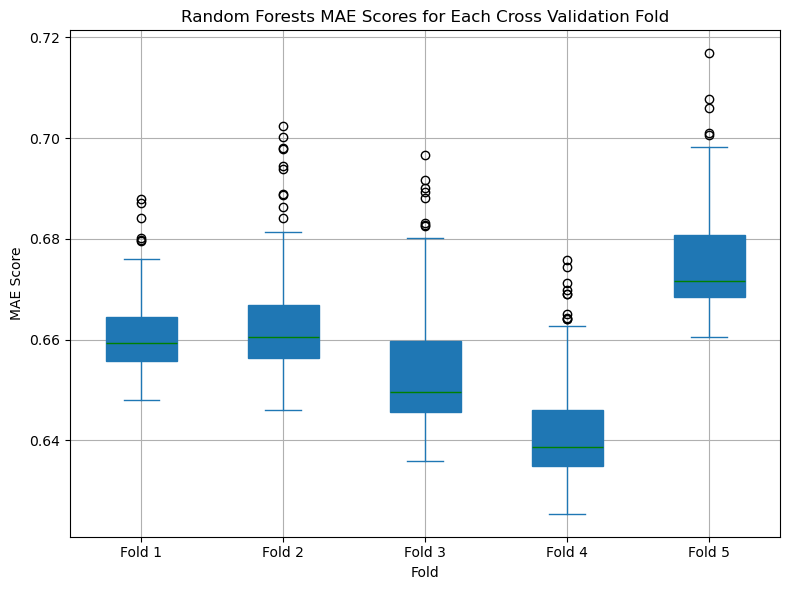

In [1391]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True, color='#1f77b4',medianprops=dict(color='green'))
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('Random Forests MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

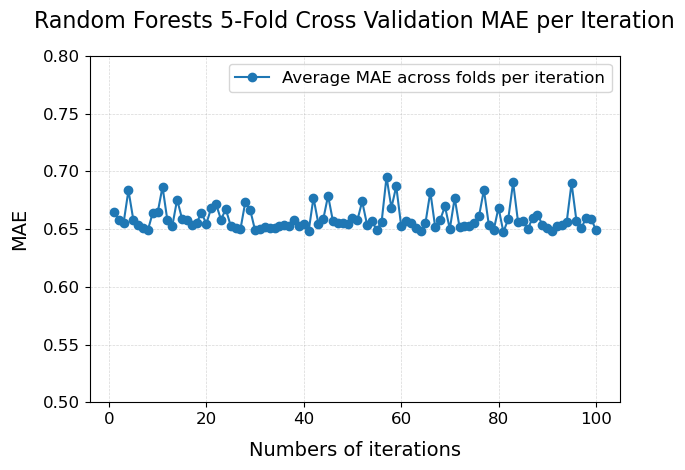

In [1392]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('Random Forests 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AVG_Iterations.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [1388]:
# Trained Random Forests predict test data with best estimator
best_estimator = rf_random.best_estimator_
y_pred = best_estimator.predict(X_test)

Test MAE: 0.627
Test RMSE: 0.985
Test CWK: 0.310


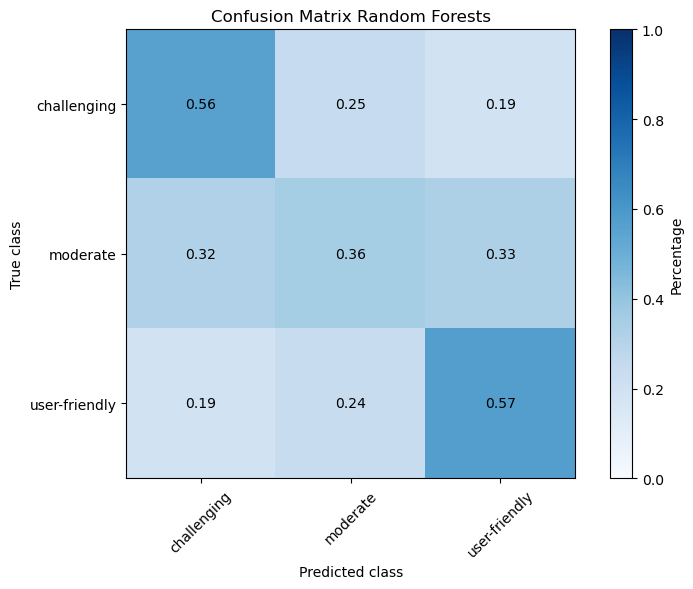

In [1389]:
# Evaluation trained best estimator Random Forests
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('RFConfusionMatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

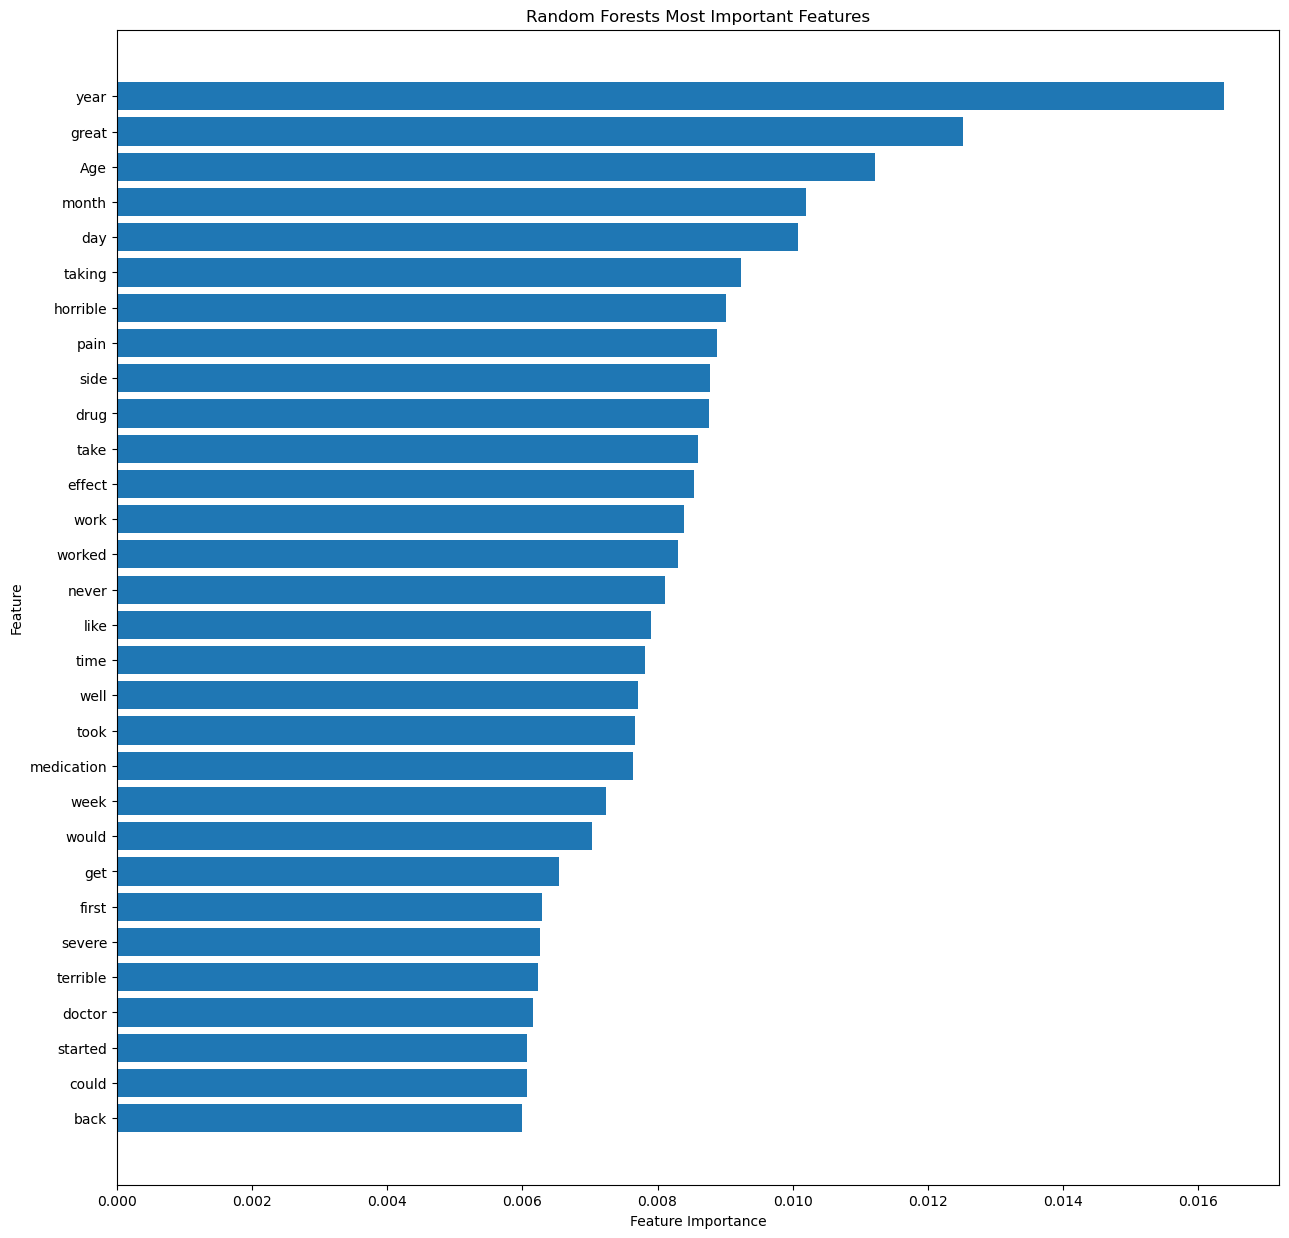

In [1390]:
# Feature importance Random Forests
feature_importance = best_estimator.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center', color='#1f77b4')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order
plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### Random Forests tfidf unigrams + polarity score 

In [1415]:
# Hyperparameter tuning: Randomized search
start_time = time.time()

param_grid = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy']
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs=-1,
                                   verbose = 3, 
                                   random_state=42)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best score found: ",-rf_random.best_score_)
print ('Best estimator:', rf_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.649 total time=   7.1s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.661 total time=   7.1s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.664 total time=   7.2s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.680 total time=   7.3s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.667 total time=   7.3s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.659 total time=  34.4s
[CV 2/5] END bootstr

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.629 total time= 3.0min
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.661 total time= 1.2min
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.641 total time= 3.0min
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.651 total time= 1.2min
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.663 total time= 1.2min
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.664 total time= 3.0min
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=59, min_samples_leaf=

In [1416]:
# Save Randomized and 5CV results 
RF3_CV = pd.DataFrame(rf_random.cv_results_)
RF3_CV.to_csv('RF3_CV.csv', index=False)
box_fig = pd.read_csv('RF3_CV.csv')

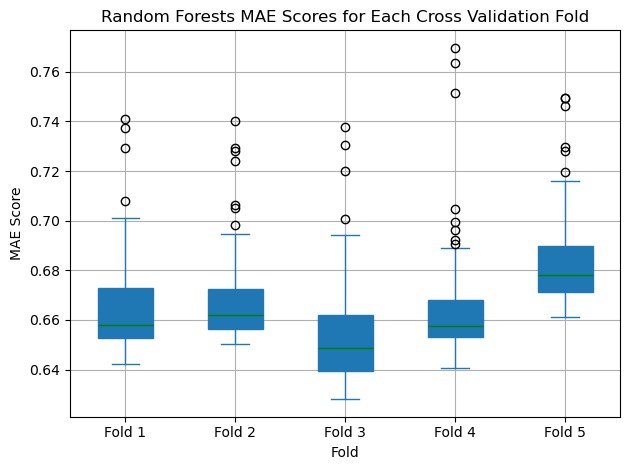

In [1418]:
# Boxplot MAE Scores for each fold
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True, color = '#1f77b4', medianprops=dict(color='green'))
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('Random Forests MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

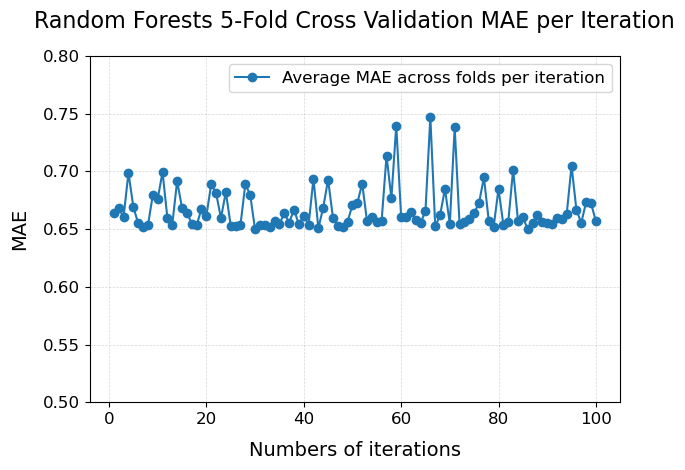

In [1419]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('Random Forests 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AVG_Iterations.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [1420]:
# Trained Random Forests predict test data with best estimator
best_estimator = rf_random.best_estimator_
y_pred = best_estimator.predict(X_test)

Test MAE: 0.633
Test RMSE: 0.998
Test CWK: 0.305


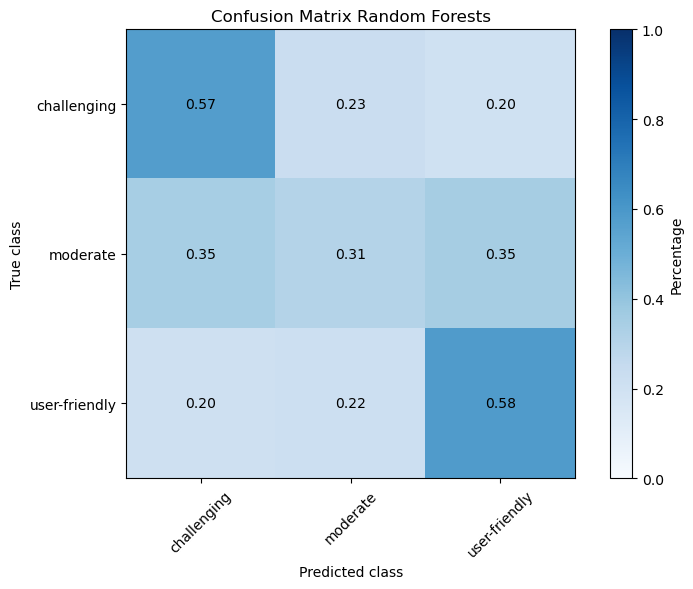

In [1421]:
# Evaluation trained best estimator Random Forests
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('RFConfusionMatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

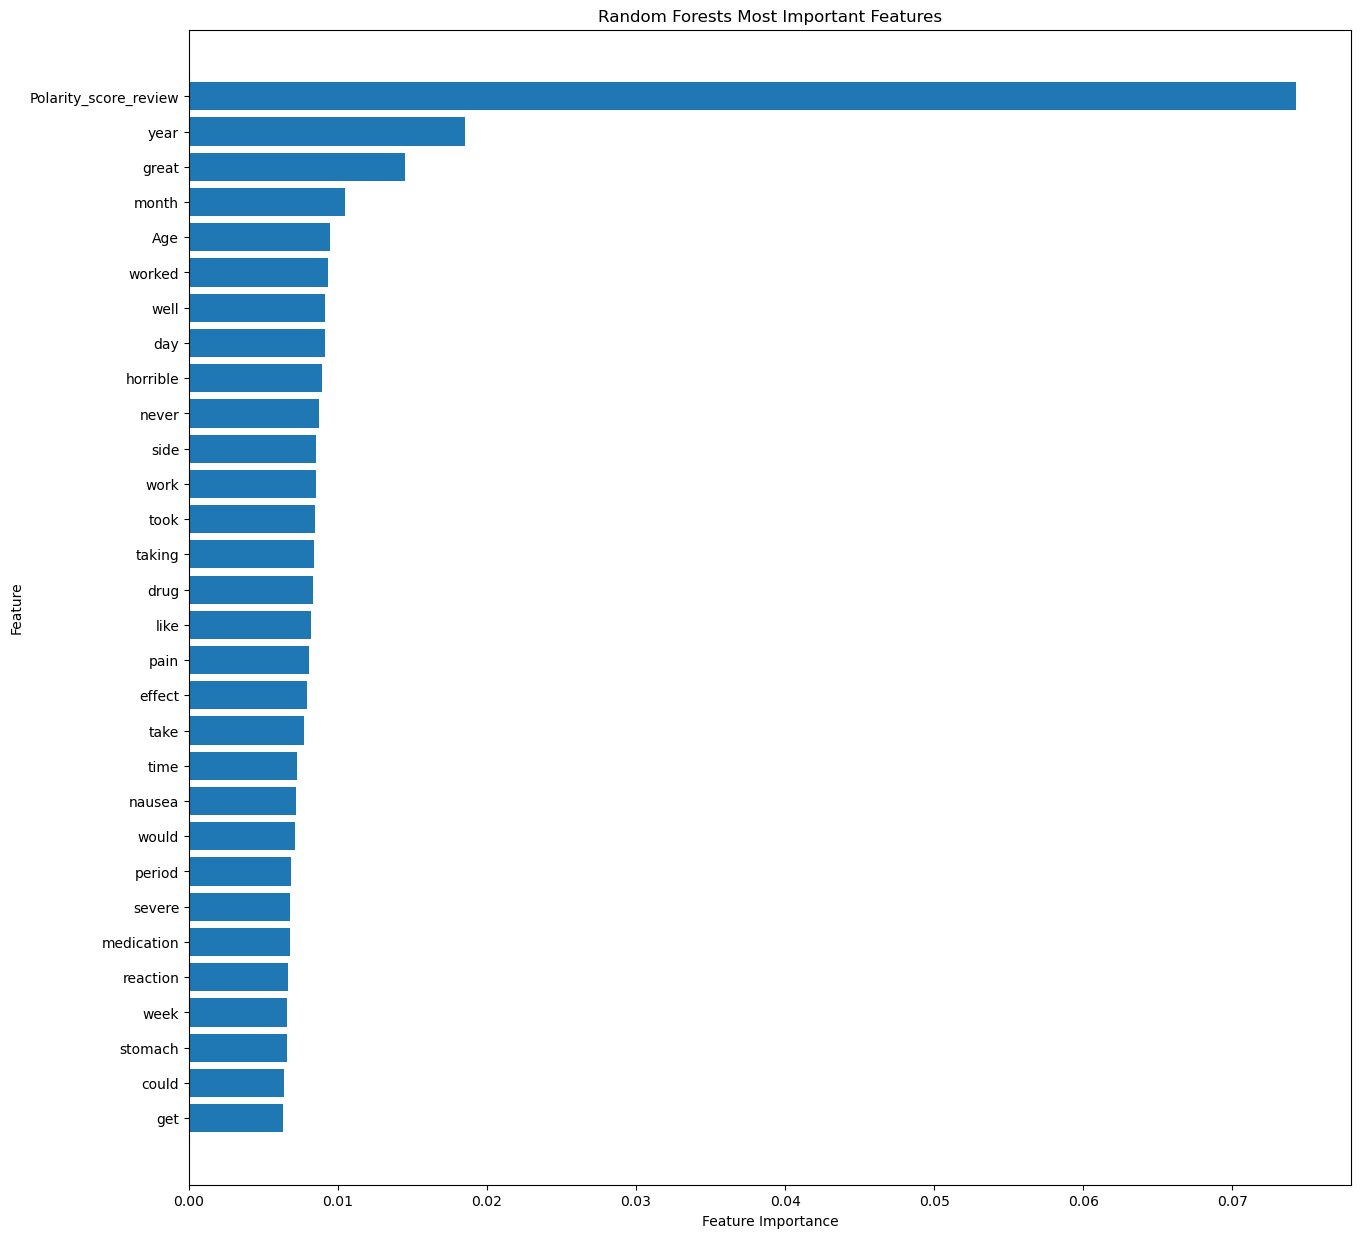

In [1422]:
# Feature importance Random Forests
feature_importance = best_estimator.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center', color='#1f77b4')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order
plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### Random Forests tfidf unigrams, bigrams

In [1457]:
# Hyperparameter tuning: Randomized search
start_time = time.time()

param_grid = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy'],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs=-1,
                                   verbose = 3, 
                                   random_state=42)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best score found: ",-rf_random.best_score_)
print ('Best estimator:', rf_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.660 total time=   3.4s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.665 total time=   3.5s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.660 total time=   3.5s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.657 total time=   3.5s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.683 total time=   3.6s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.654 total time=  18.5s
[CV 2/5] END bootstr

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.655 total time= 1.2min
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.653 total time= 2.9min
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.656 total time= 1.2min
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.632 total time= 2.9min
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.638 total time= 2.9min
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.671 total time= 2.9min
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7,

In [1458]:
# Save Randomized and 5CV results 
RF2_CV = pd.DataFrame(rf_random.cv_results_)
RF2_CV.to_csv('RF2_CV.csv', index=False)
box_fig = pd.read_csv('RF2_CV.csv')

In [205]:
# box_fig.head()

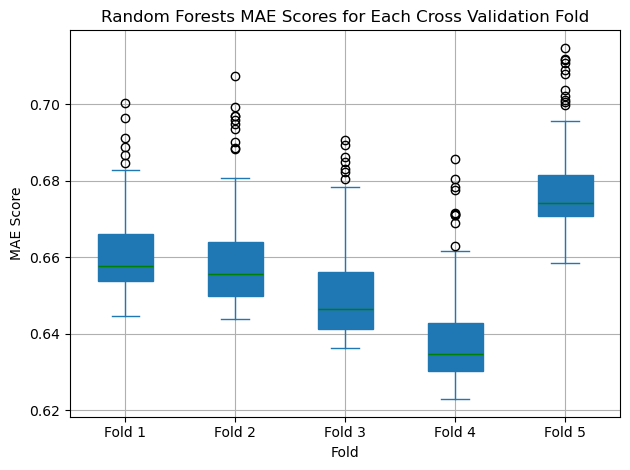

In [1459]:
# Boxplot MAE Scores for each fold
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True, color='#1f77b4',medianprops=dict(color='green'))
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('Random Forests MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

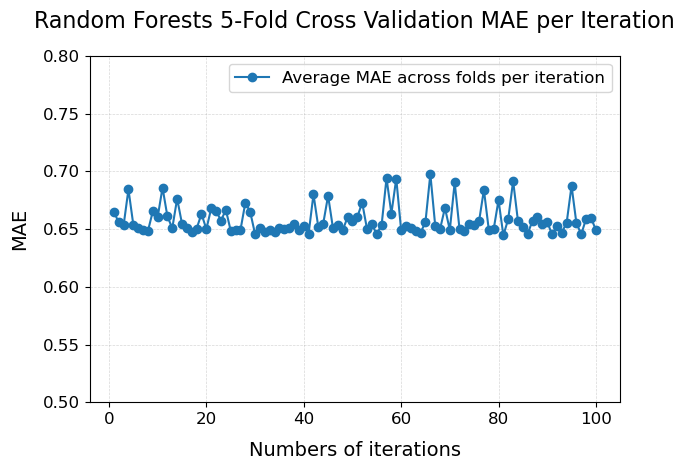

In [1460]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('Random Forests 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AVG_Iterations.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [1461]:
# Trained Random Forests predict test data with best estimator
best_estimator = rf_random.best_estimator_
y_pred = best_estimator.predict(X_test)

Test MAE: 0.629
Test RMSE: 0.984
Test CWK: 0.310


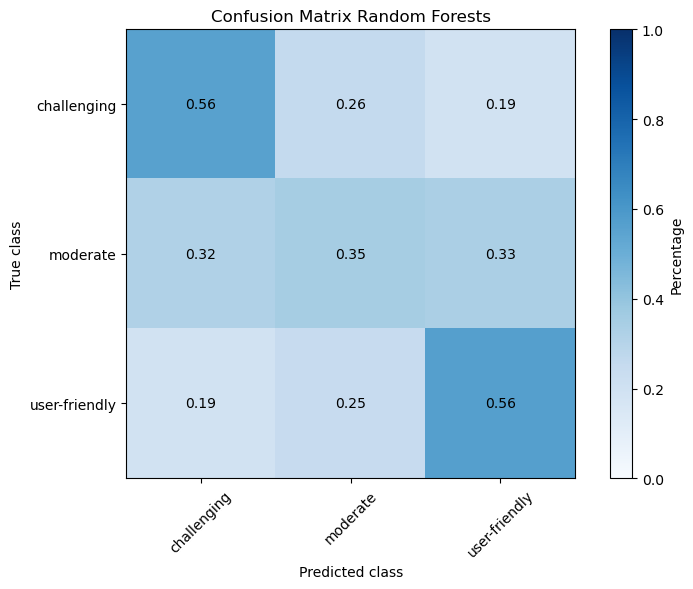

In [1462]:
# Evaluation trained best estimator Random Forests
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('RFConfusionMatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

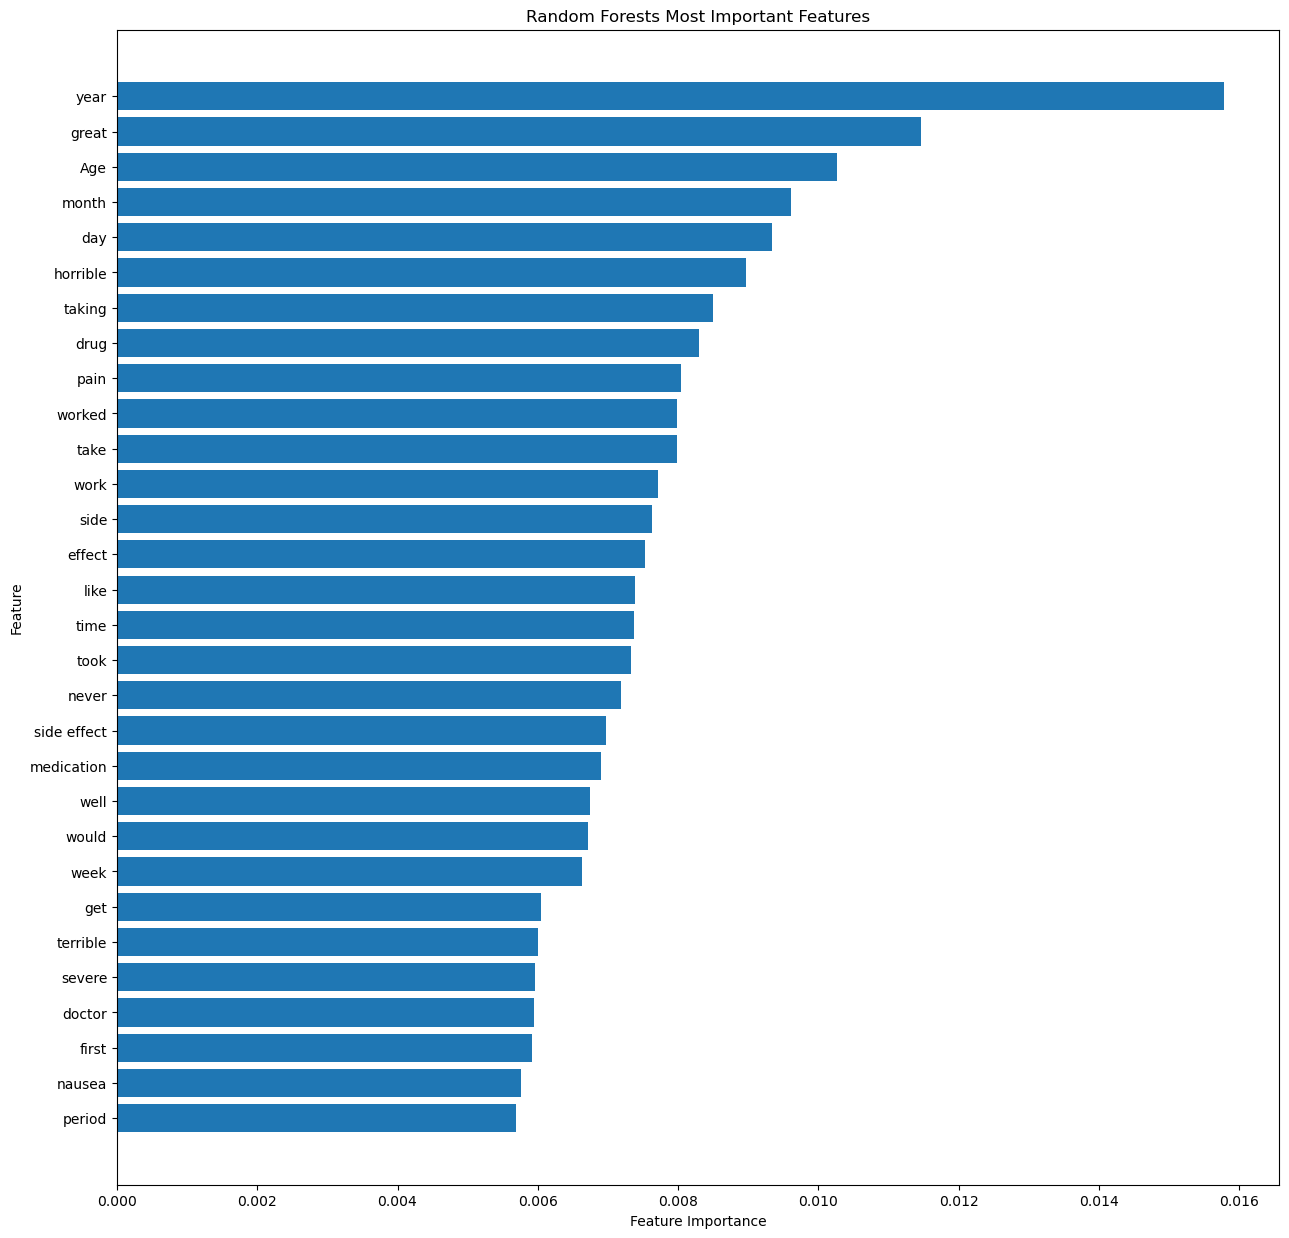

In [1463]:
# Feature importance Random Forests
feature_importance = best_estimator.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center', color='#1f77b4')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order
plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### Random Forests tfidf unigrams bigrams + polarity score 

In [1504]:
# Hyperparameter tuning: Randomized search
start_time = time.time()

param_grid = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy'],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs=-1,
                                   verbose = 3, 
                                   random_state=42)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best score found: ",-rf_random.best_score_)
print ('Best estimator:', rf_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.648 total time=   3.6s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.666 total time=   3.7s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.646 total time=   3.6s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.655 total time=   3.7s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.679 total time=   3.7s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.654 total time=  20.8s
[CV 2/5] END bootstr

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.651 total time= 4.9min
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.644 total time= 4.9min
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.635 total time= 4.9min
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.666 total time= 2.0min
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7, min_samples_split=5, n_estimators=448;, score=-0.658 total time= 2.0min
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=59, min_samples_leaf=1, min_samples_split=3, n_estimators=651;, score=-0.670 total time= 4.9min
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=32, min_samples_leaf=7,

In [1505]:
# Save Randomized and 5CV results 
RF4_CV = pd.DataFrame(rf_random.cv_results_)
RF4_CV.to_csv('RF4_CV.csv', index=False)
box_fig = pd.read_csv('RF4_CV.csv')

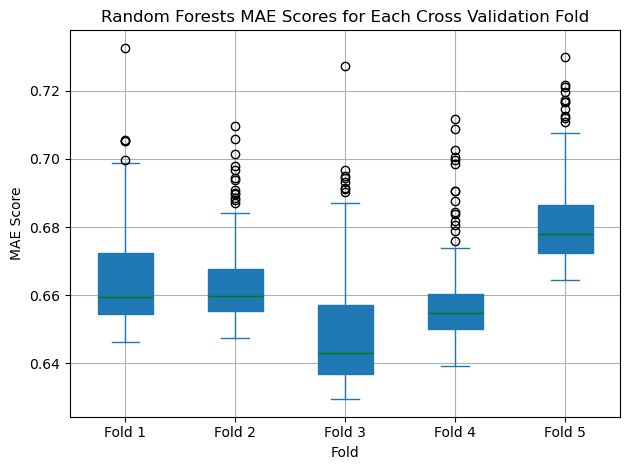

In [1506]:
# Boxplot MAE Scores for each fold
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True, color='#1f77b4',medianprops=dict(color='green'))
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('Random Forests MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

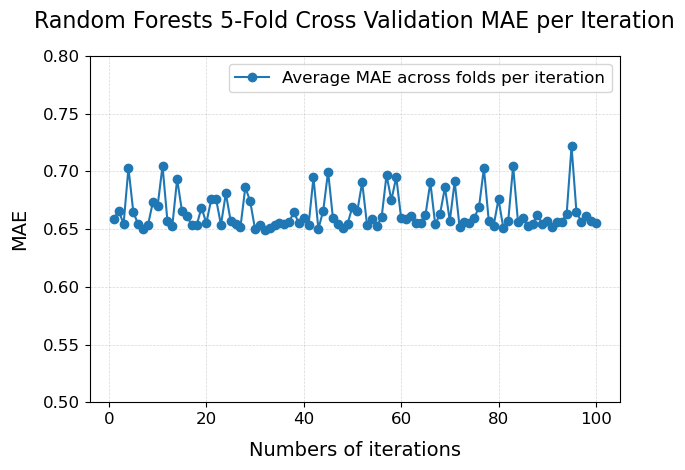

In [1507]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('Random Forests 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AVG_Iterations.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [1508]:
# Trained Random Forests predict test data with best estimator
best_estimator = rf_random.best_estimator_
y_pred = best_estimator.predict(X_test)

Test MAE: 0.627
Test RMSE: 0.989
Test CWK: 0.311


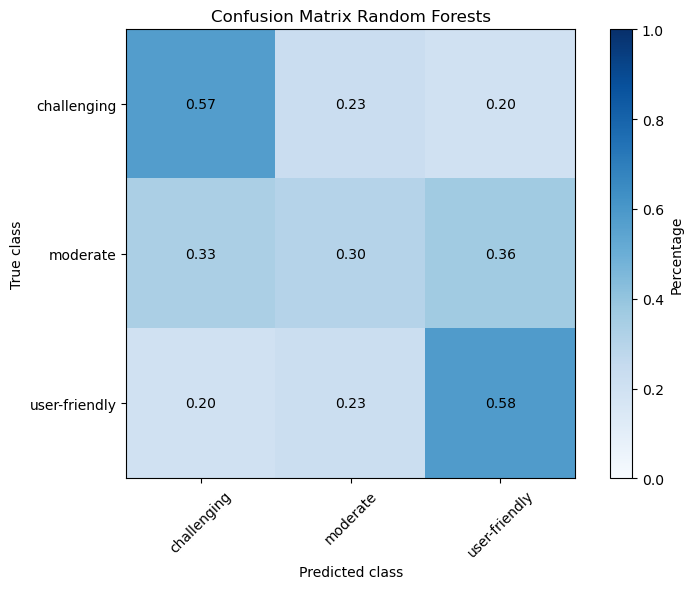

In [1509]:
# Evaluation trained best estimator Random Forests
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('RFConfusionMatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

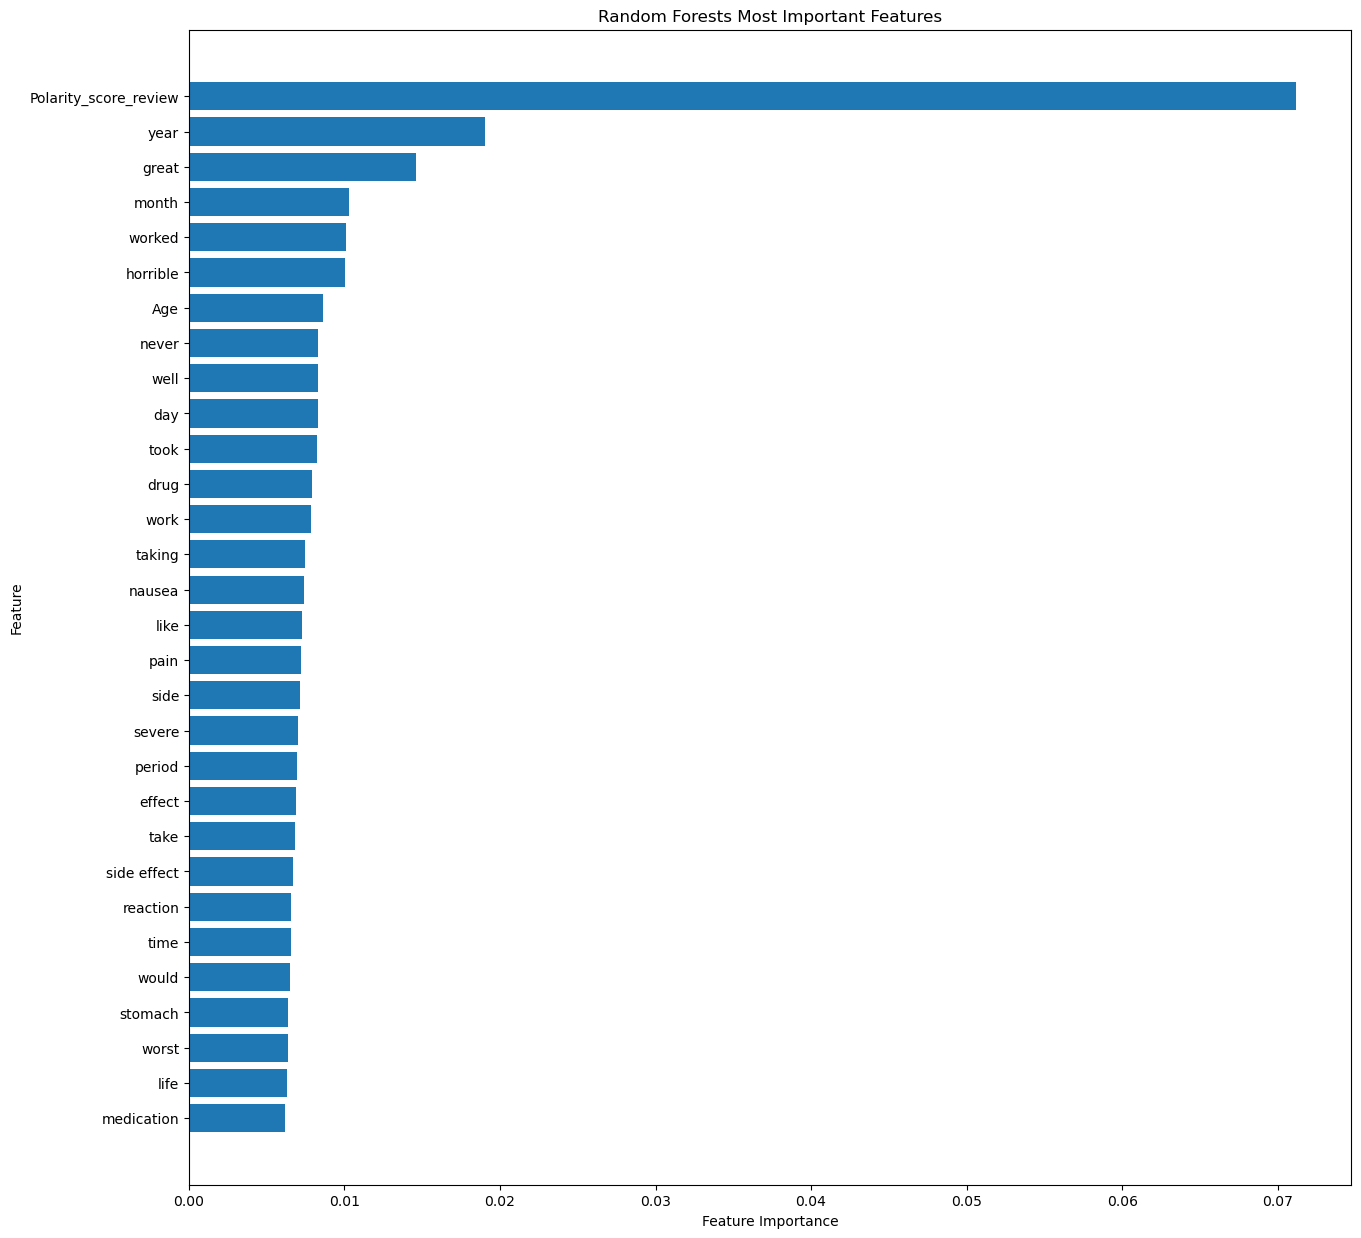

In [1510]:
# Feature importance Random Forests
feature_importance = best_estimator.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center', color='#1f77b4')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order
plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### LGBM tfidf unigrams

In [35]:
# Hyperparameter tuning Randomized search
start_time = time.time()


param_grid = {
    'random_state' : [42],
    'objective': ['multiclass'],
    'verbose': [-1],
    'num_class': [3],
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(10, 201)),
    'learning_rate': [i/100 for i in range(1, 51)],
    'feature_fraction': [i/10 for i in range(5, 10)],
    'bagging_fraction': [i/10 for i in range(5, 10)],
    'bagging_freq': list(range(1, 11)),
    'min_data_in_leaf': list(range(5, 31)),
    'lambda_l1': [i/10 for i in range(11)],
    'lambda_l2': [i/10 for i in range(11)],
    'max_depth': list(range(5, 71)),
    'min_gain_to_split': [i/100 for i in range(5, 31)],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_classifier = lgb.LGBMClassifier()
lgbm_random = RandomizedSearchCV(estimator=lgbm_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   random_state=42,
                                   verbose = 3)
lgbm_random.fit(X_train, y_train)



print("Best Parameters:", lgbm_random.best_params_)
print("Best score found: ",-lgbm_random.best_score_)
print ('Best estimator:', lgbm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.694 total time=  15.5s
[CV 2/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.688 total time=  15.3s
[CV 3/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.659 total time=  1

In [36]:
# Save Randomized and 5CV results
LGBM1_CV = pd.DataFrame(lgbm_random.cv_results_)
LGBM1_CV.to_csv('/content/drive/MyDrive/3_classes/LGBM1_CV.csv', index=False)
box_fig = pd.read_csv('/content/drive/MyDrive/3_classes/LGBM1_CV.csv')

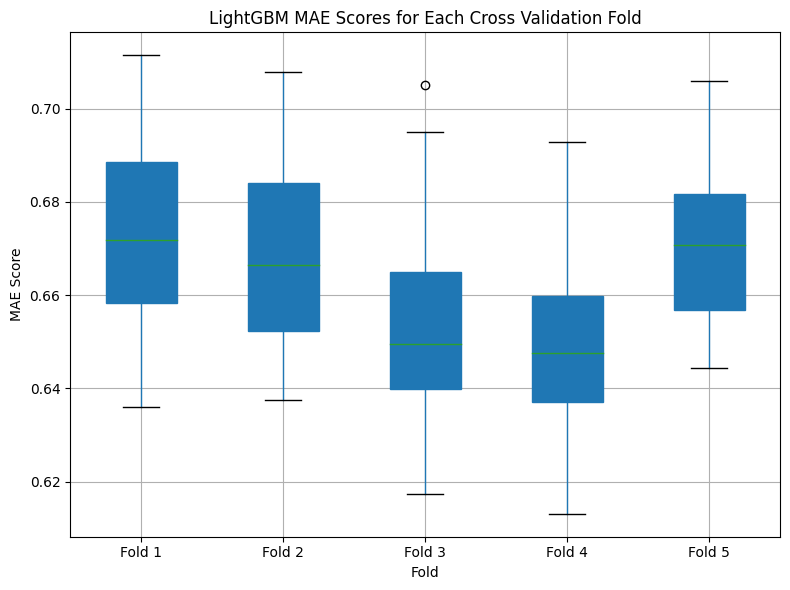

In [37]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True)
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('LightGBM MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

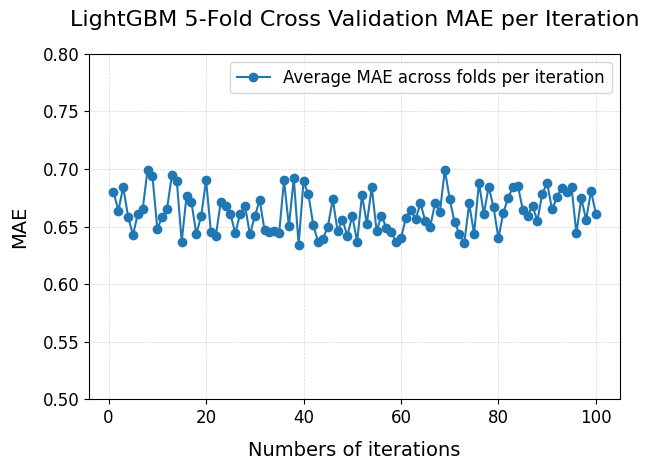

In [39]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('LightGBM 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [40]:
# Trained LGBM predict test data with best estimator
lgb_random1 = lgbm_random.best_estimator_
y_pred = lgb_random1.predict(X_test)

Test MAE: 0.635
Test RMSE: 0.975
Test CWK: 0.309


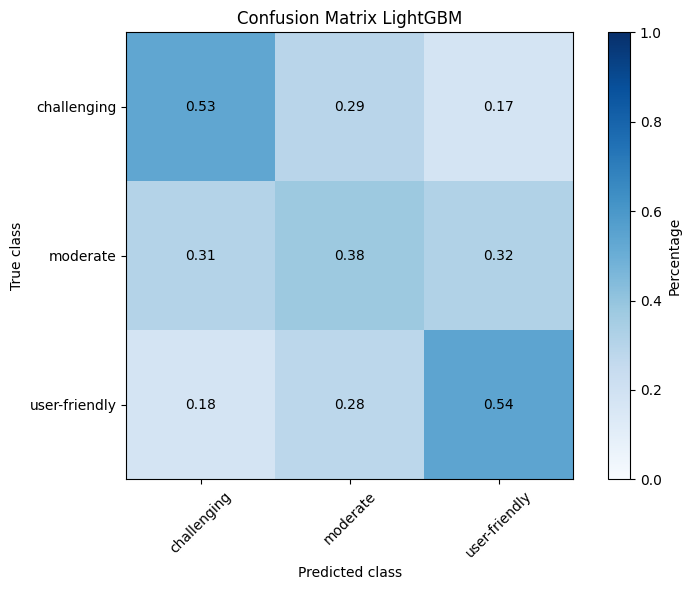

In [41]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('/content/drive/MyDrive/3_classes/LGBM_confusionmatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

### LGBM unigrams + polarity score

In [38]:
# Hyperparameter tuning Randomized search
start_time = time.time()


param_grid = {
    'random_state' : [42],
    'objective': ['multiclass'],
    'verbose': [-1],
    'num_class': [3],
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(10, 201)),
    'learning_rate': [i/100 for i in range(1, 51)],
    'feature_fraction': [i/10 for i in range(5, 10)],
    'bagging_fraction': [i/10 for i in range(5, 10)],
    'bagging_freq': list(range(1, 11)),
    'min_data_in_leaf': list(range(5, 31)),
    'lambda_l1': [i/10 for i in range(11)],
    'lambda_l2': [i/10 for i in range(11)],
    'max_depth': list(range(5, 71)),
    'min_gain_to_split': [i/100 for i in range(5, 31)],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_classifier = lgb.LGBMClassifier()
lgbm_random = RandomizedSearchCV(estimator=lgbm_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   random_state=42,
                                   verbose = 3)
lgbm_random.fit(X_train, y_train)



print("Best Parameters:", lgbm_random.best_params_)
print("Best score found: ",-lgbm_random.best_score_)
print ('Best estimator:', lgbm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.686 total time=  19.6s
[CV 2/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.689 total time=  20.4s
[CV 3/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.664 total time=  1

In [39]:
# Save Randomized and 5CV results
LGBM4_CV = pd.DataFrame(lgbm_random.cv_results_)
LGBM4_CV.to_csv('/content/drive/MyDrive/3_classes/LGBM4_CV.csv', index=False)
box_fig = pd.read_csv('/content/drive/MyDrive/3_classes/LGBM4_CV.csv')

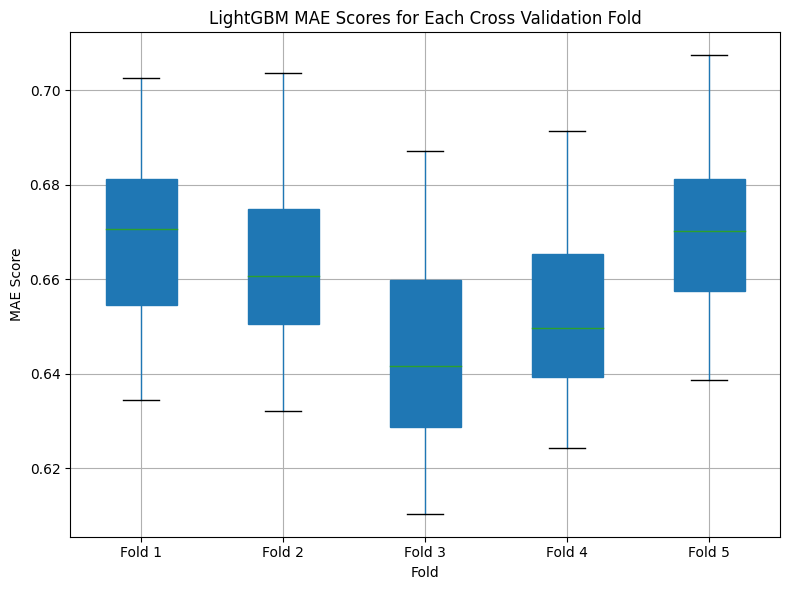

In [40]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True)
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('LightGBM MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

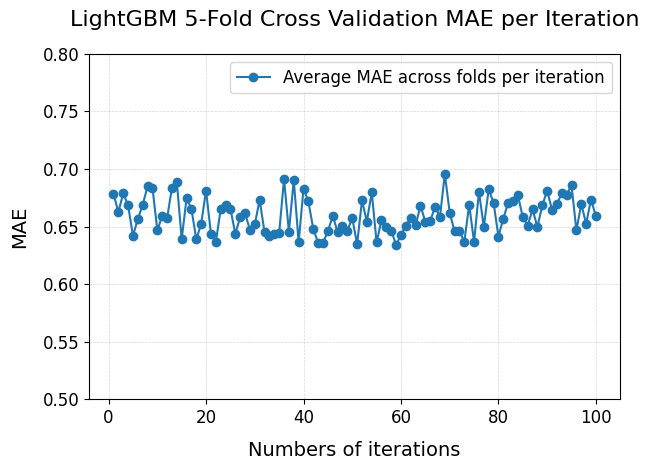

In [41]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('LightGBM 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [42]:
# Trained LGBM predict test data with best estimator
lgb_random1 = lgbm_random.best_estimator_
y_pred = lgb_random1.predict(X_test)

Test MAE: 0.639
Test RMSE: 0.983
Test CWK: 0.308


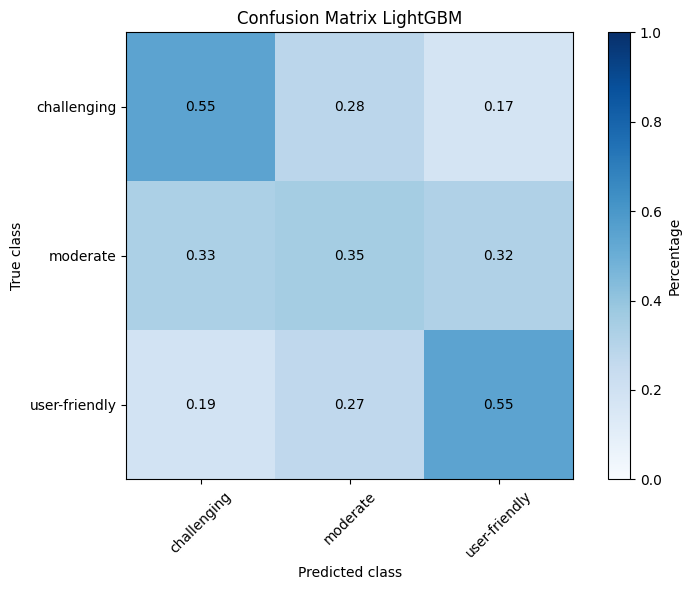

In [43]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('/content/drive/MyDrive/3_classes/LGBM_confusionmatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

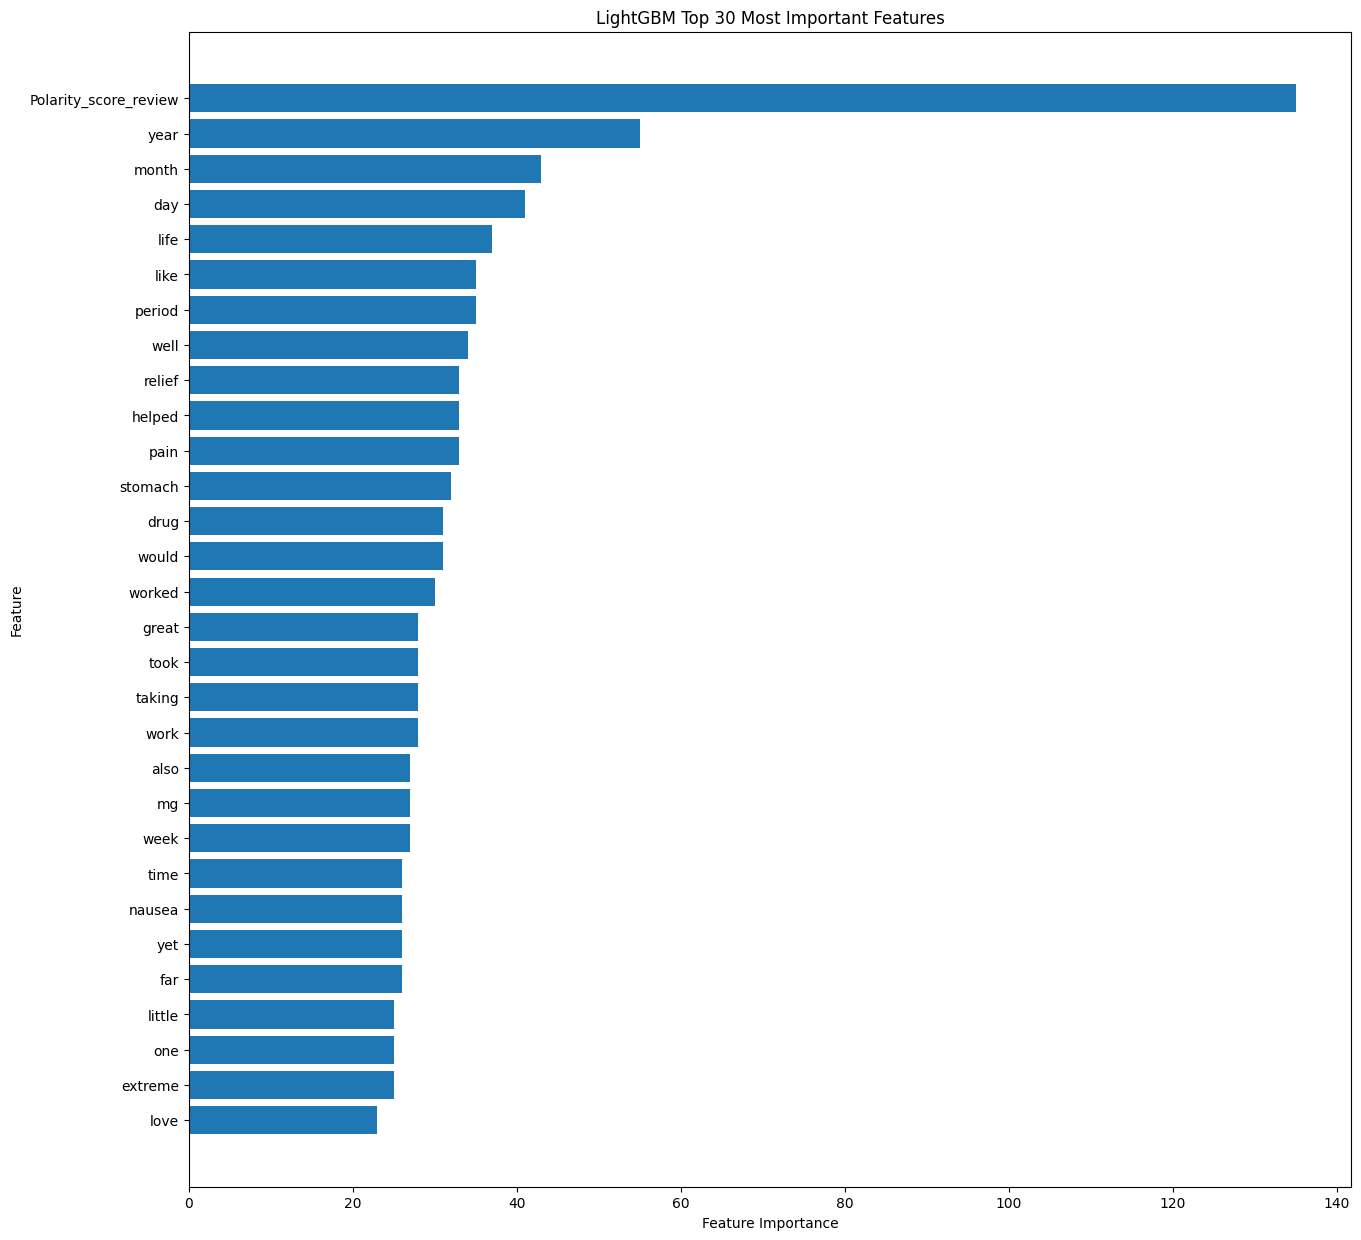

In [44]:
# Feature importance LightGBM
feature_importance = lgb_random1.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_featureimportance', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### LGBM tfidf unigrams, bigrams 

In [58]:
# Hyperparameter tuning Randomized search
start_time = time.time()


param_grid = {
    'objective': ['multiclass'],
    'verbose': [-1],
    'num_class': [3],
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(10, 201)),
    'learning_rate': [i/100 for i in range(1, 51)],
    'feature_fraction': [i/10 for i in range(5, 10)],
    'bagging_fraction': [i/10 for i in range(5, 10)],
    'bagging_freq': list(range(1, 11)),
    'min_data_in_leaf': list(range(5, 31)),
    'lambda_l1': [i/10 for i in range(11)],
    'lambda_l2': [i/10 for i in range(11)],
    'max_depth': list(range(5, 71)),
    'min_gain_to_split': [i/100 for i in range(5, 31)],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_classifier = lgb.LGBMClassifier(random_state = 42)
lgbm_random = RandomizedSearchCV(estimator=lgbm_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   random_state=42,
                                   verbose = 3)
lgbm_random.fit(X_train, y_train)



print("Best Parameters:", lgbm_random.best_params_)
print("Best score found: ",-lgbm_random.best_score_)
print ('Best estimator:', lgbm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.678 total time=  29.8s
[CV 2/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.680 total time=  21.2s
[CV 3/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.669 total time=  19.5s
[CV 4/5] END bagging_fraction=0.6, bagging_fre

In [22]:
# Save Randomized and 5CV results
LGBM2_CV = pd.DataFrame(lgbm_random.cv_results_)
LGBM2_CV.to_csv('/content/drive/MyDrive/3_classes/LGBM2_CV.csv', index=False)
box_fig = pd.read_csv('/content/drive/MyDrive/3_classes/LGBM2_CV.csv')

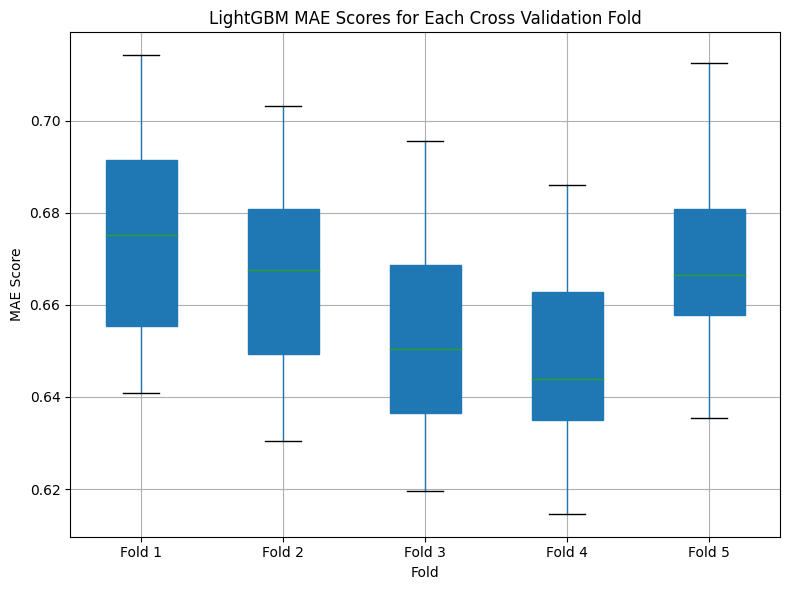

In [60]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True)
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('LightGBM MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

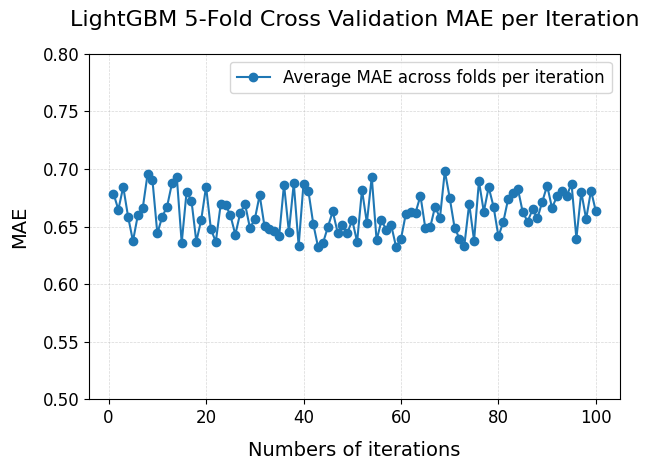

In [61]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('LightGBM 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [26]:
# Trained LGBM predict test data with best estimator
lgb_random1 = lgbm_random.best_estimator_
y_pred = lgb_random1.predict(X_test)

Test MAE: 0.623
Test RMSE: 0.972
Test CWK: 0.319


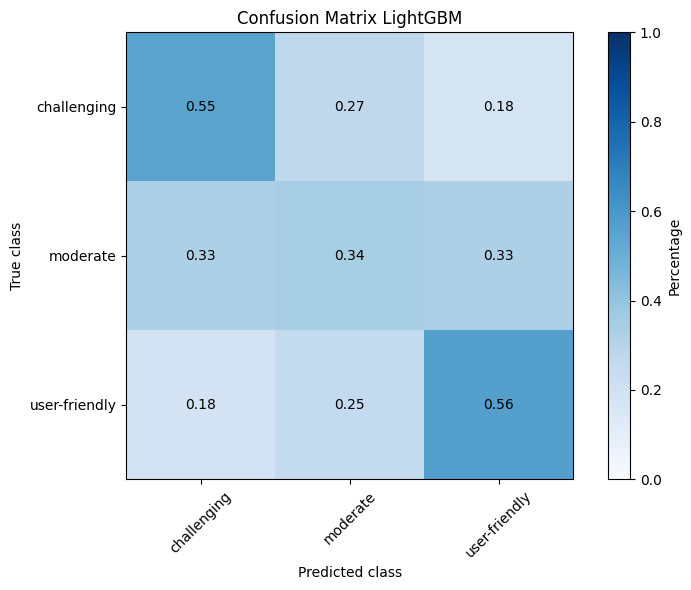

In [64]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('/content/drive/MyDrive/3_classes/LGBM_confusionmatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

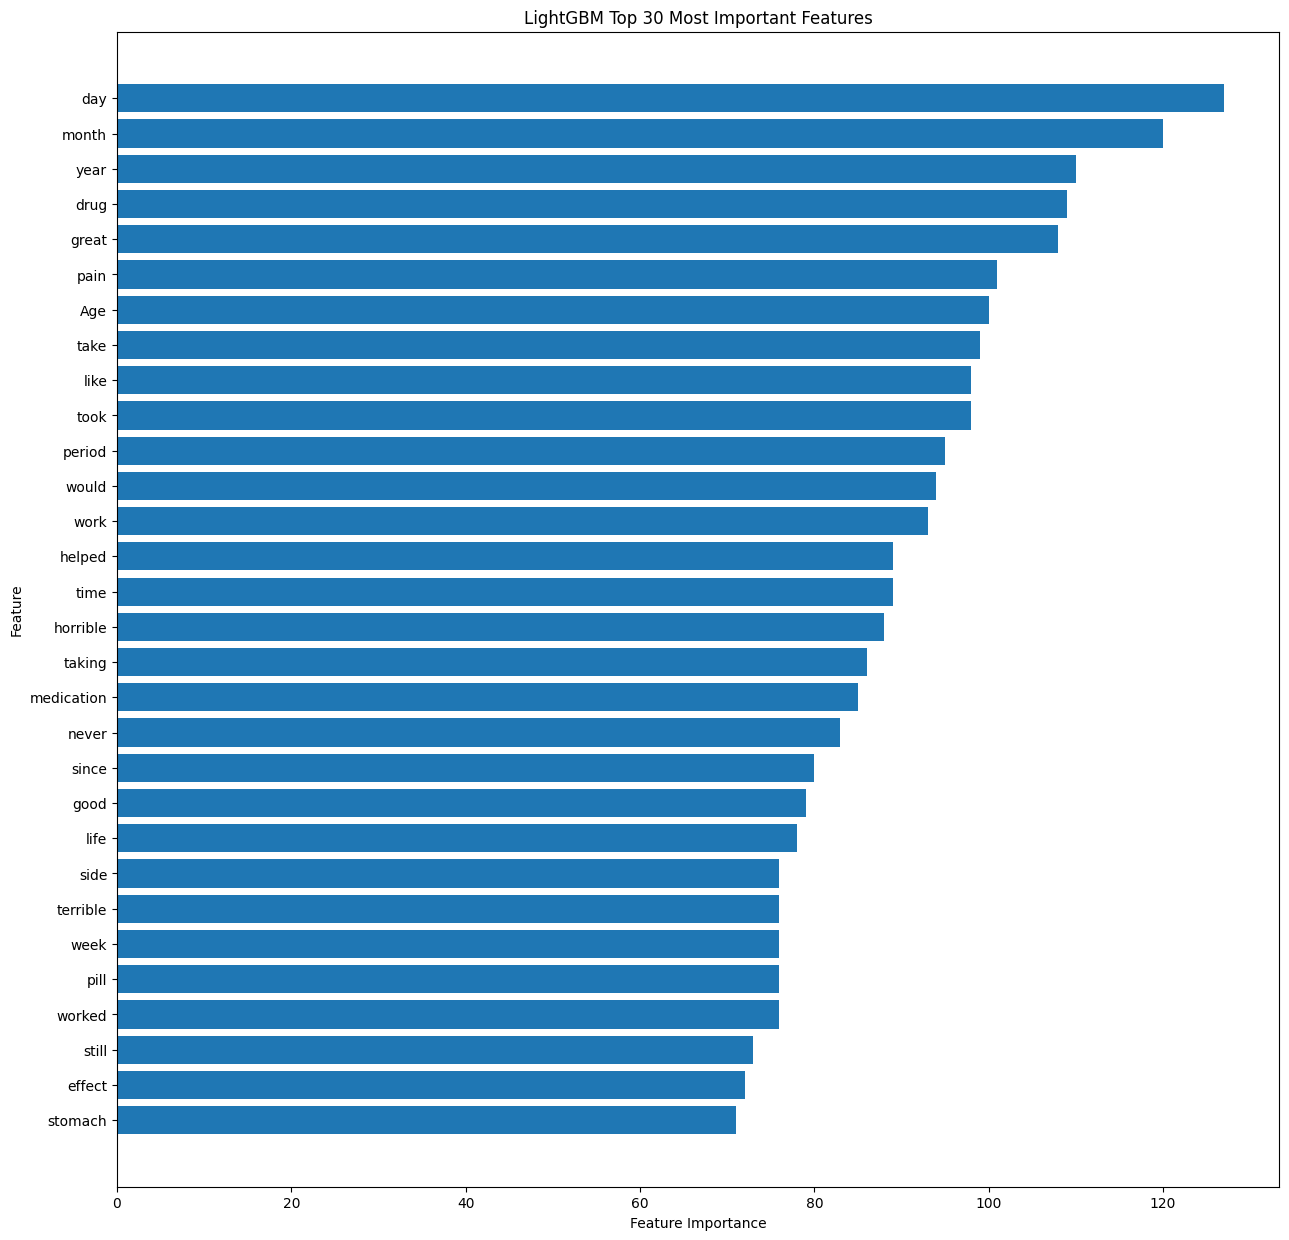

In [65]:
# Feature importance LightGBM
feature_importance = lgb_random1.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_featureimportance', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### LGBM tfidf unigrams, bigrams + polarity score 

In [50]:
# Hyperparameter tuning Randomized search
start_time = time.time()

param_grid = {
    'random_state' : [42],
    'objective': ['multiclass'],
    'verbose': [-1],
    'num_class': [3],
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(10, 201)),
    'learning_rate': [i/100 for i in range(1, 51)],
    'feature_fraction': [i/10 for i in range(5, 10)],
    'bagging_fraction': [i/10 for i in range(5, 10)],
    'bagging_freq': list(range(1, 11)),
    'min_data_in_leaf': list(range(5, 31)),
    'lambda_l1': [i/10 for i in range(11)],
    'lambda_l2': [i/10 for i in range(11)],
    'max_depth': list(range(5, 71)),
    'min_gain_to_split': [i/100 for i in range(5, 31)],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_classifier = lgb.LGBMClassifier()
lgbm_random = RandomizedSearchCV(estimator=lgbm_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   random_state=42,
                                   verbose = 3)
lgbm_random.fit(X_train, y_train)



print("Best Parameters:", lgbm_random.best_params_)
print("Best score found: ",-lgbm_random.best_score_)
print ('Best estimator:', lgbm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.682 total time=  30.2s
[CV 2/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.684 total time=  20.7s
[CV 3/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.667 total time=  1

In [52]:
# Save Randomized and 5CV results
LGBM3_CV = pd.DataFrame(lgbm_random.cv_results_)
LGBM3_CV.to_csv('/content/drive/MyDrive/3_classes/LGBM3_CV.csv', index=False)
box_fig = pd.read_csv('/content/drive/MyDrive/3_classes/LGBM3_CV.csv')

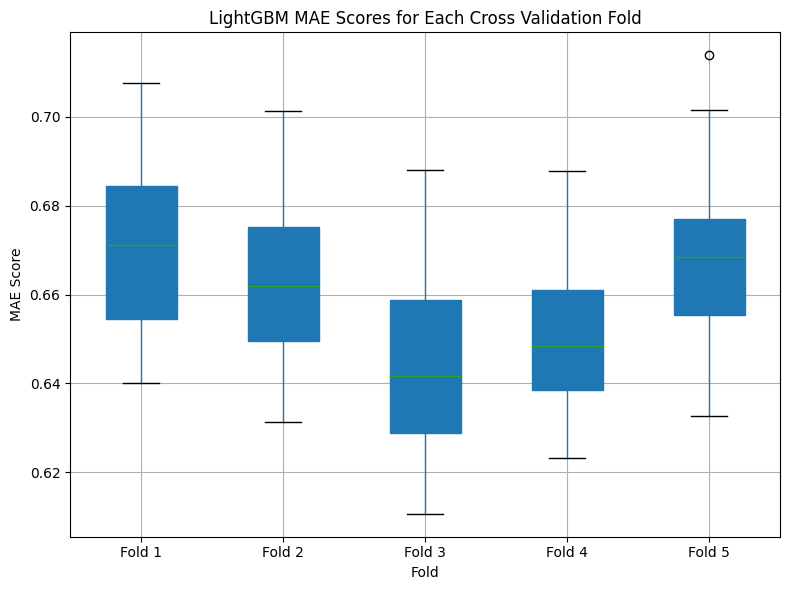

In [53]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True)
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('LightGBM MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

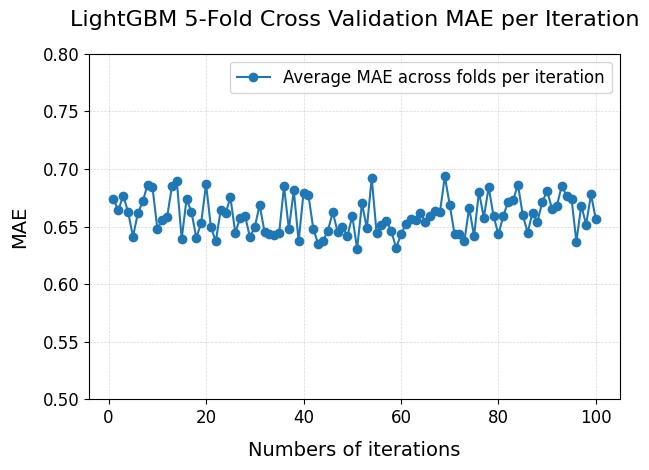

In [55]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('LightGBM 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [56]:
# Trained LGBM predict test data with best estimator
lgb_random1 = lgbm_random.best_estimator_
y_pred = lgb_random1.predict(X_test)

Test MAE: 0.641
Test RMSE: 0.987
Test CWK: 0.301


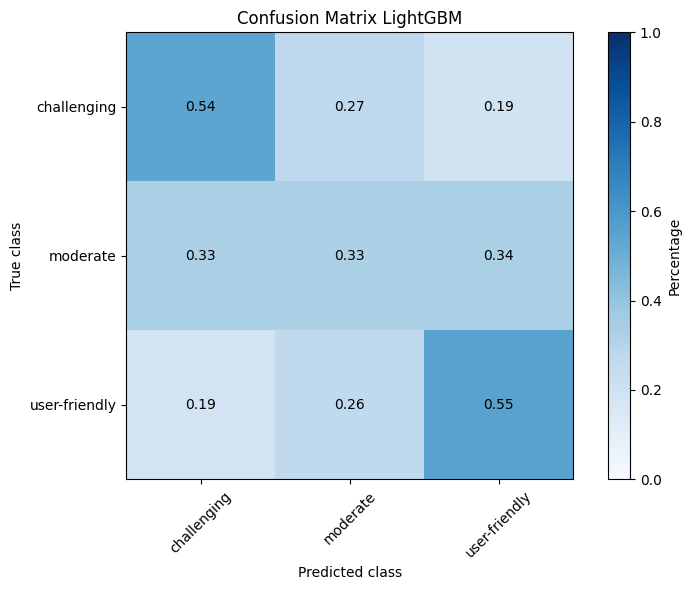

In [57]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('/content/drive/MyDrive/3_classes/LGBM_confusionmatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

### LightGBM feature Importance generating best estimator 

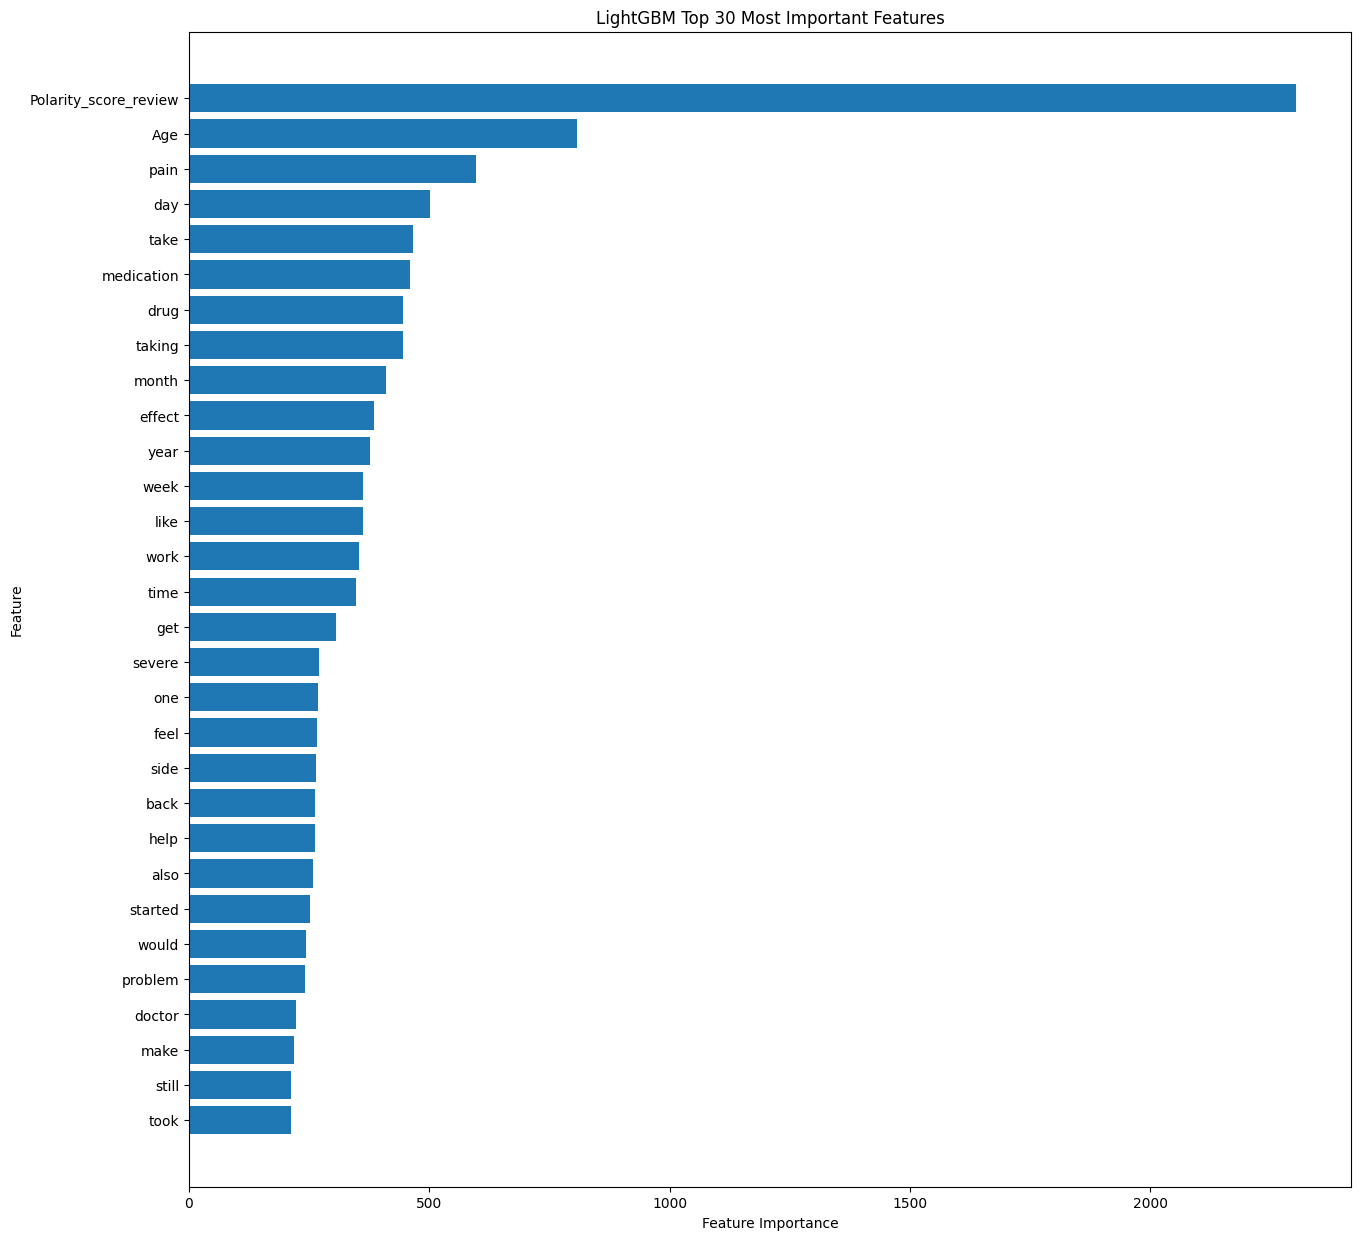

In [73]:
# Feature importance LightGBM
feature_importance = lgb_random1.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_featureimportance', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### SVC tfidf unigrams

In [579]:
# Hyperparameter tuning SVC GridSeach
start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr'],
    'class_weight': ['balanced'], 
} 

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   
svm_classifier = SVC(random_state=42)
svm_random = GridSearchCV(estimator=svm_classifier,
                                param_grid=param_grid,                
                                cv=k_fold,                        
                                scoring='neg_mean_absolute_error',          
                                n_jobs=5,
                                verbose = 3)  

svm_random.fit(X_train, y_train)

print("Best Parameters:", svm_random.best_params_)
print("Best score found: ",-svm_random.best_score_)
print ('Best estimator:', svm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.997 total time=13.1min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.996 total time=13.5min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.669 total time=13.7min
[CV 2/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.998 total time=13.9min
[CV 4/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.997 total time=13.9min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time=13.7min
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.997 total time=13.4min
[CV 2/5] END C=0.1, class_weight=balanced, decision_

In [580]:
# Save Gridsearch and 5CV results 
SVC1_CV = pd.DataFrame(svm_random.cv_results_)
SVC1_CV.to_csv('SVC1_CV.csv', index=False)
box_fig = pd.read_csv('SVC1_CV.csv')

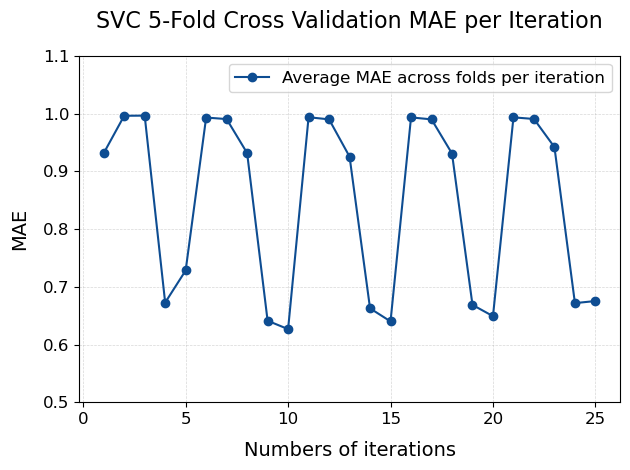

In [603]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('SVC 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('SVC_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [604]:
# Trained SVC predict test data with best estimator
svm_random1 = svm_random.best_estimator_
y_pred = svm_random1.predict(X_test)

Test MAE: 0.631
Test RMSE: 0.964
Test CWK: 0.319


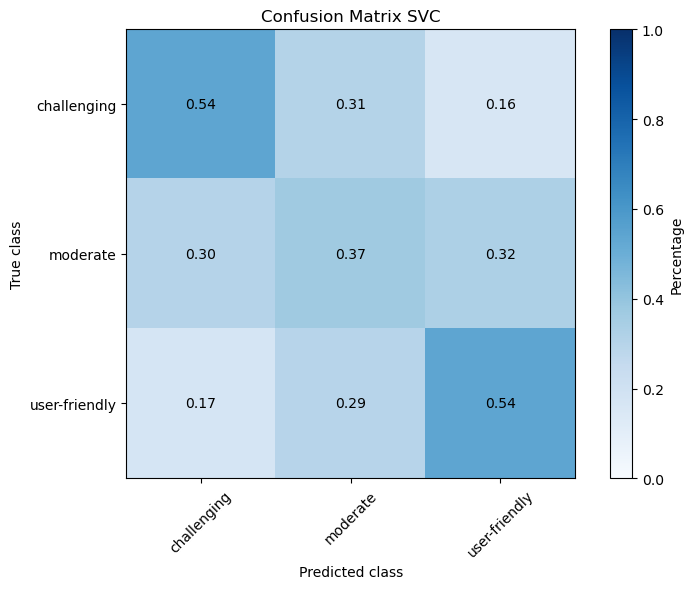

In [605]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('SVC_confusionmatrix', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### SVC tfidf unigrams + polarity score

In [1552]:
# Hyperparameter tuning SVC GridSearch
start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr'],
    'class_weight': ['balanced'], 
} 

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   
svm_classifier = SVC(random_state=42)
svm_random = GridSearchCV(estimator=svm_classifier,
                                param_grid=param_grid,                
                                cv=k_fold,                        
                                scoring='neg_mean_absolute_error',          
                                n_jobs=5,
                                verbose = 3)  

svm_random.fit(X_train, y_train)

print("Best Parameters:", svm_random.best_params_)
print("Best score found: ",-svm_random.best_score_)
print ('Best estimator:', svm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.997 total time=13.1min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.996 total time=13.5min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.994 total time=13.7min
[CV 4/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.999 total time=13.9min
[CV 2/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.999 total time=13.9min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time=13.7min
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time=13.4min
[CV 2/5] END C=0.1, class_weight=balanced, decision_

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=-0.663 total time=349.7min
[CV 1/5] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.0001, kernel=rbf;, score=-0.658 total time= 6.8min
[CV 2/5] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.0001, kernel=rbf;, score=-0.638 total time= 6.7min
[CV 3/5] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=-0.648 total time=345.6min
[CV 4/5] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=-0.658 total time=345.3min
[CV 5/5] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=-0.659 total time=344.5min
[CV 5/5] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.0001, kernel=rbf;, score=-0.643 total time= 6.8min
[CV 3/5] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.0001, kerne

In [1553]:
# Save Gridsearch and 5CV results 
SVC4_CV = pd.DataFrame(svm_random.cv_results_)
SVC4_CV.to_csv('SVC4_CV.csv', index=False)
box_fig = pd.read_csv('SVC4_CV.csv')

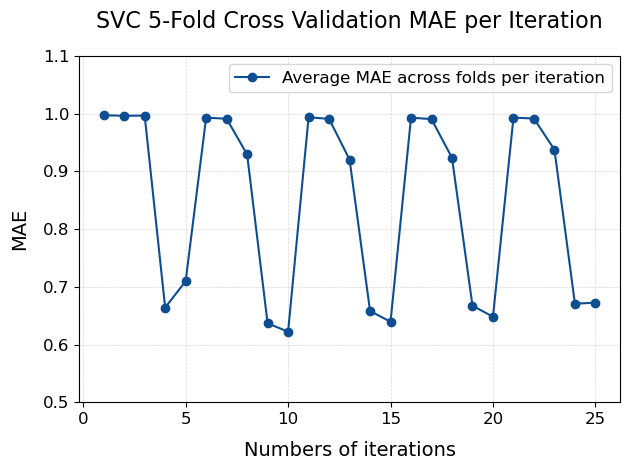

In [1556]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('SVC 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('SVC_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [1557]:
# Trained SVC predict test data with best estimator
svm_random1 = svm_random.best_estimator_
y_pred = svm_random1.predict(X_test)

Test MAE: 0.624
Test RMSE: 0.960
Test CWK: 0.322


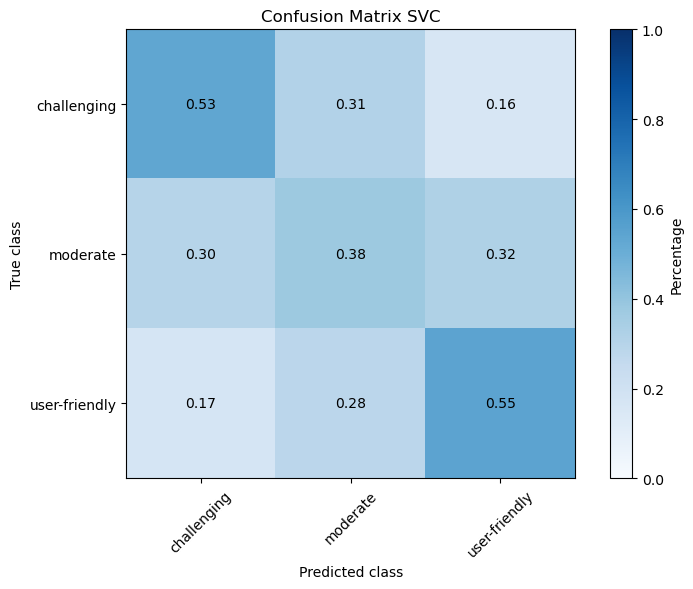

In [1558]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('SVC_confusionmatrix', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### SVC tfidf unigrams, bigrams

In [662]:
# Hyperparameter tuning SVC GridSearch
start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr'],
    'class_weight': ['balanced'], 
} 

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   
svm_classifier = SVC(random_state=42)
svm_random = GridSearchCV(estimator=svm_classifier,
                                param_grid=param_grid,                
                                cv=k_fold,                        
                                scoring='neg_mean_absolute_error',          
                                n_jobs=5,
                                verbose = 3)  

svm_random.fit(X_train, y_train)

print("Best Parameters:", svm_random.best_params_)
print("Best score found: ",-svm_random.best_score_)
print ('Best estimator:', svm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.997 total time=10.8min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.996 total time=11.1min
[CV 2/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.998 total time=11.5min
[CV 4/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.997 total time=11.5min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.669 total time=11.5min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time=11.5min
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.997 total time=11.2min
[CV 2/5] END C=0.1, class_weight=balanced, decision_

In [663]:
# Save Gridsearch and 5CV results 
SVC2_CV = pd.DataFrame(svm_random.cv_results_)
SVC2_CV.to_csv('SVC2_CV.csv', index=False)
box_fig = pd.read_csv('SVC2_CV.csv')

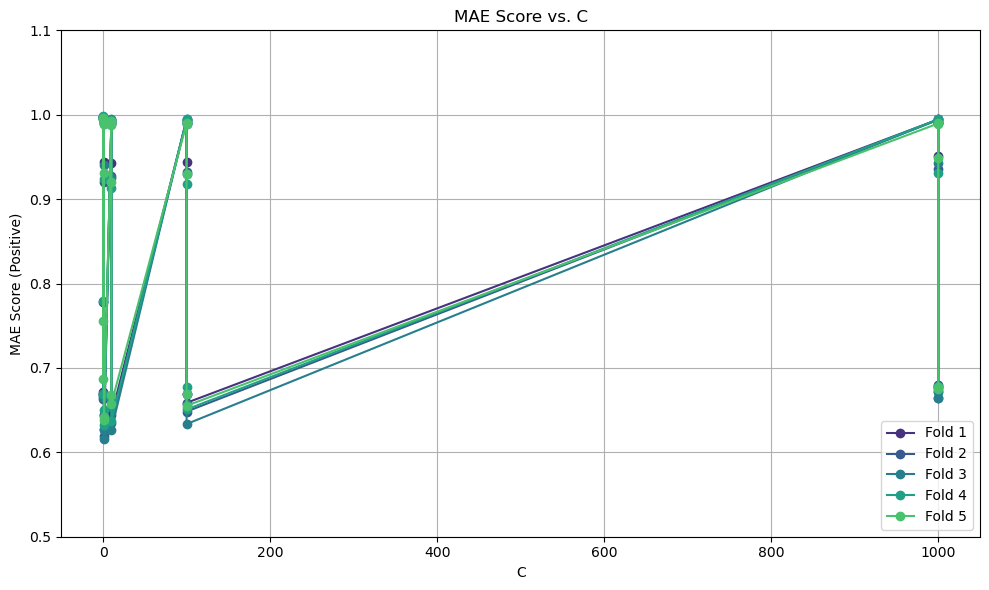

In [664]:
plt.figure(figsize=(10, 6))
for i in range(test_scores_flipped.shape[0]):
    plt.plot(C_values, test_scores_flipped[i], marker='o', linestyle='-', label=f'Fold {i+1}')

plt.xlabel('C')
plt.ylabel('MAE Score (Positive)')
plt.title('MAE Score vs. C')
plt.legend()
plt.grid(True)
plt.ylim(0.5, 1.1)
plt.tight_layout()
plt.savefig('MAE_vsC.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

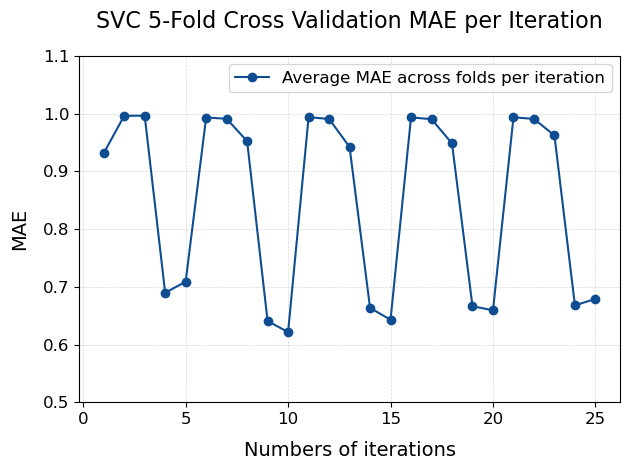

In [666]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('SVC 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('SVC_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [667]:
# Trained SVC predict test data with best estimator
svm_random1 = svm_random.best_estimator_
y_pred = svm_random1.predict(X_test)

Test MAE: 0.630
Test RMSE: 0.963
Test CWK: 0.319


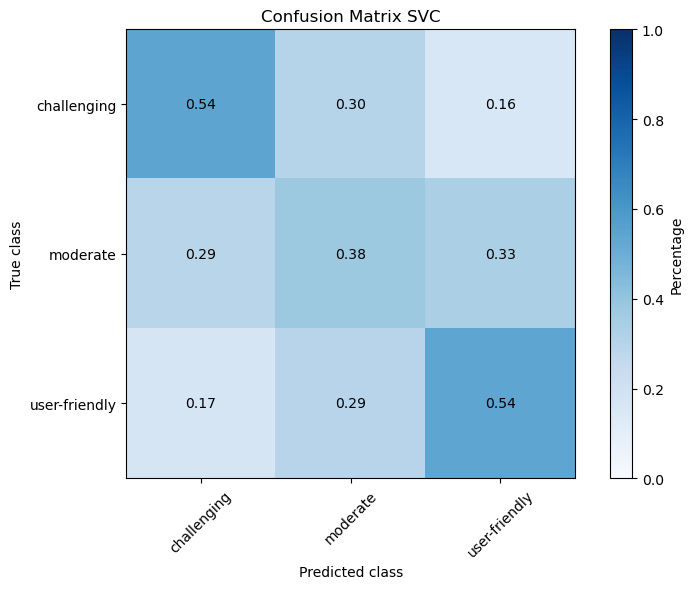

In [668]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('SVC_confusionmatrix', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

### SVC tfidf unigrams bigrams + polarity score

In [1185]:
# Hyperparameter tuning SVC GridSearch
start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr'],
    'class_weight': ['balanced'], 
} 

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   
svm_classifier = SVC(random_state=42)
svm_random = GridSearchCV(estimator=svm_classifier,
                                param_grid=param_grid,                
                                cv=k_fold,                        
                                scoring='neg_mean_absolute_error',          
                                n_jobs=5,
                                verbose = 3)  

svm_random.fit(X_train, y_train)

print("Best Parameters:", svm_random.best_params_)
print("Best score found: ",-svm_random.best_score_)
print ('Best estimator:', svm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.997 total time=14.4min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.996 total time=14.7min
[CV 4/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.999 total time=14.9min
[CV 2/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.999 total time=14.9min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.994 total time=14.9min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time= 9.7min
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time= 9.6min
[CV 2/5] END C=0.1, class_weight=balanced, decision_

In [1186]:
# Save Gridsearch and 5CV results 
SVC3_CV = pd.DataFrame(svm_random.cv_results_)
SVC3_CV.to_csv('SVC3_CV.csv', index=False)
box_fig = pd.read_csv('SVC3_CV.csv')

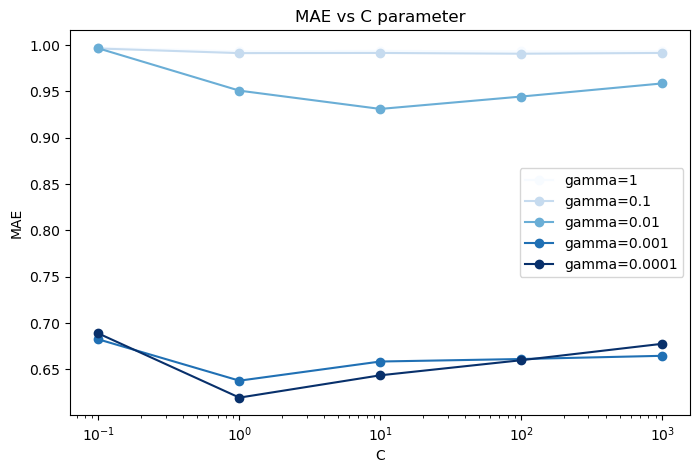

In [161]:
# Hereby I give credits for inspiration and parts of code which are sourced from https://www.geeksforgeeks.org/rbf-svm-parameters-in-scikit-learn/ 

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
} 
scores = np.array(-box_fig["mean_test_score"]).reshape(
    len(param_grid['gamma']),
    len(param_grid['C']))

# Plot MAE vs C parameter
plt.figure(figsize=(8, 5))
plt.title("MAE vs C and Gamma parameter")
plt.xlabel("C")
plt.ylabel("MAE")
n = len(param_grid['C'])
cmap = plt.cm.Blues(np.linspace(0, 1, len(param_grid['gamma']))) 
for i in range(n):
    plt.plot(param_grid['C'], 
             scores[:,i], 
             'o-', label='gamma='+str(param_grid['gamma'][i]), color=cmap[i])  
plt.legend()
plt.xscale('log')
plt.show()

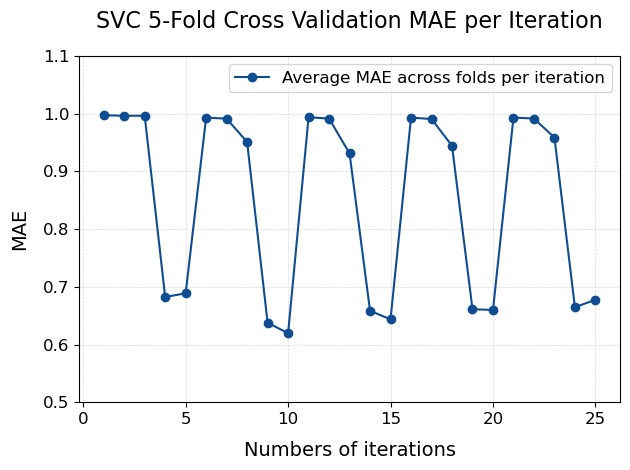

In [1189]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('SVC 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('SVC_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [1190]:
# Trained SVC predict test data with best estimator
svm_random1 = svm_random.best_estimator_
y_pred = svm_random1.predict(X_test)

Test MAE: 0.621
Test RMSE: 0.958
Test CWK: 0.325


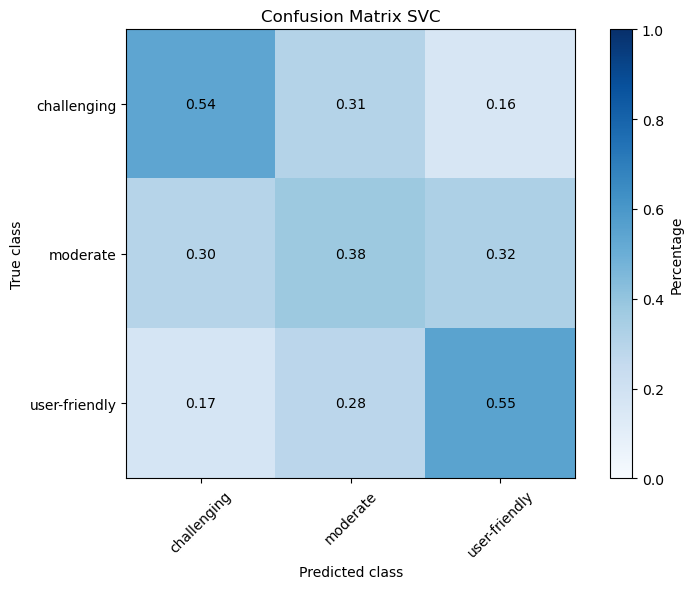

In [1191]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('SVC_confusionmatrixTB', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

# Results Experiments 3 Dropping features 'Age', 'Gender'  

## Results RF Unigrams without additional features

In [69]:
# Hyperparameter tuning: Randomized search
start_time = time.time()

param_grid = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy'], 
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs=-1,
                                   verbose = 3, 
                                   random_state=42)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best score found: ",-rf_random.best_score_)
print ('Best estimator:', rf_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=468;, score=-0.669 total time=  47.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=5, n_estimators=423;, score=-0.682 total time=   6.7s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=323;, score=-0.643 total time=  58.9s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=5, n_estimators=576;, score=-0.656 total time= 1.8min
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=57, min_samples_leaf=3, min_samples_split=6, n_estimators=828;, score=-0.641 total time= 5.4min
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=3, n_estimators=781;, score=-0.660 total time=  39.6s
[CV 5/5] END boot

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 52, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 494}
Best score found:  0.6471747476588035
Best estimator: RandomForestClassifier(max_depth=52, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=494, random_state=42)
Execution time: 1 hours, 37 minutes, 2 seconds


In [70]:
# Save Randomized and 5CV results 
RF_nofeat_U_CV = pd.DataFrame(rf_random.cv_results_)
RF_nofeat_U_CV.to_csv('RF_nofeat_U_CV.csv', index=False)
box_fig = pd.read_csv('RF_nofeat_U_CV.csv')

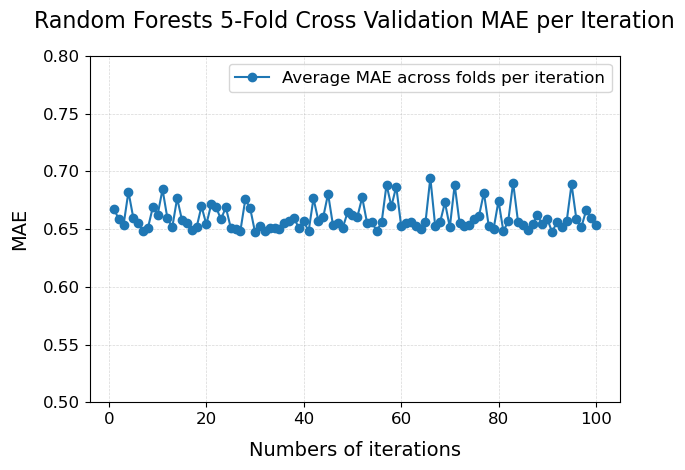

In [85]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('Random Forests 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AVG_Iterations.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [86]:
# Trained Random Forests predict test data with best estimator
best_estimator = rf_random.best_estimator_
y_pred = best_estimator.predict(X_test)

Test MAE: 0.635
Test RMSE: 0.986
Test CWK: 0.304


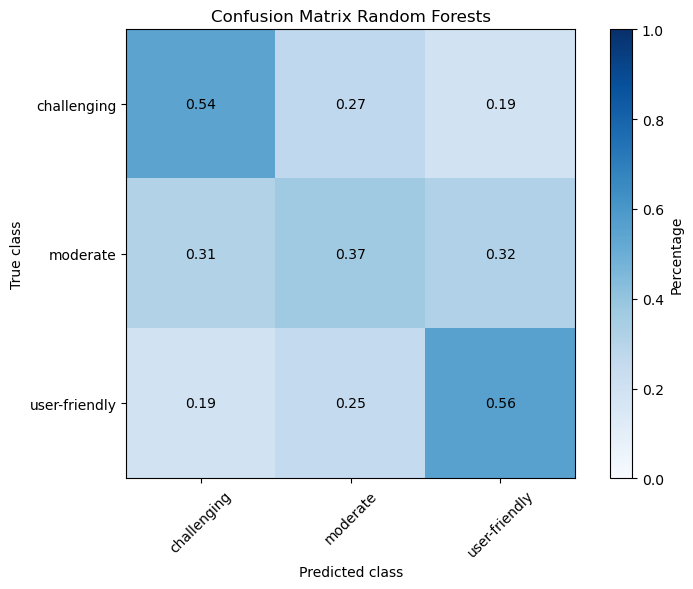

In [87]:
# Evaluation trained best estimator Random Forests
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('RFConfusionMatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

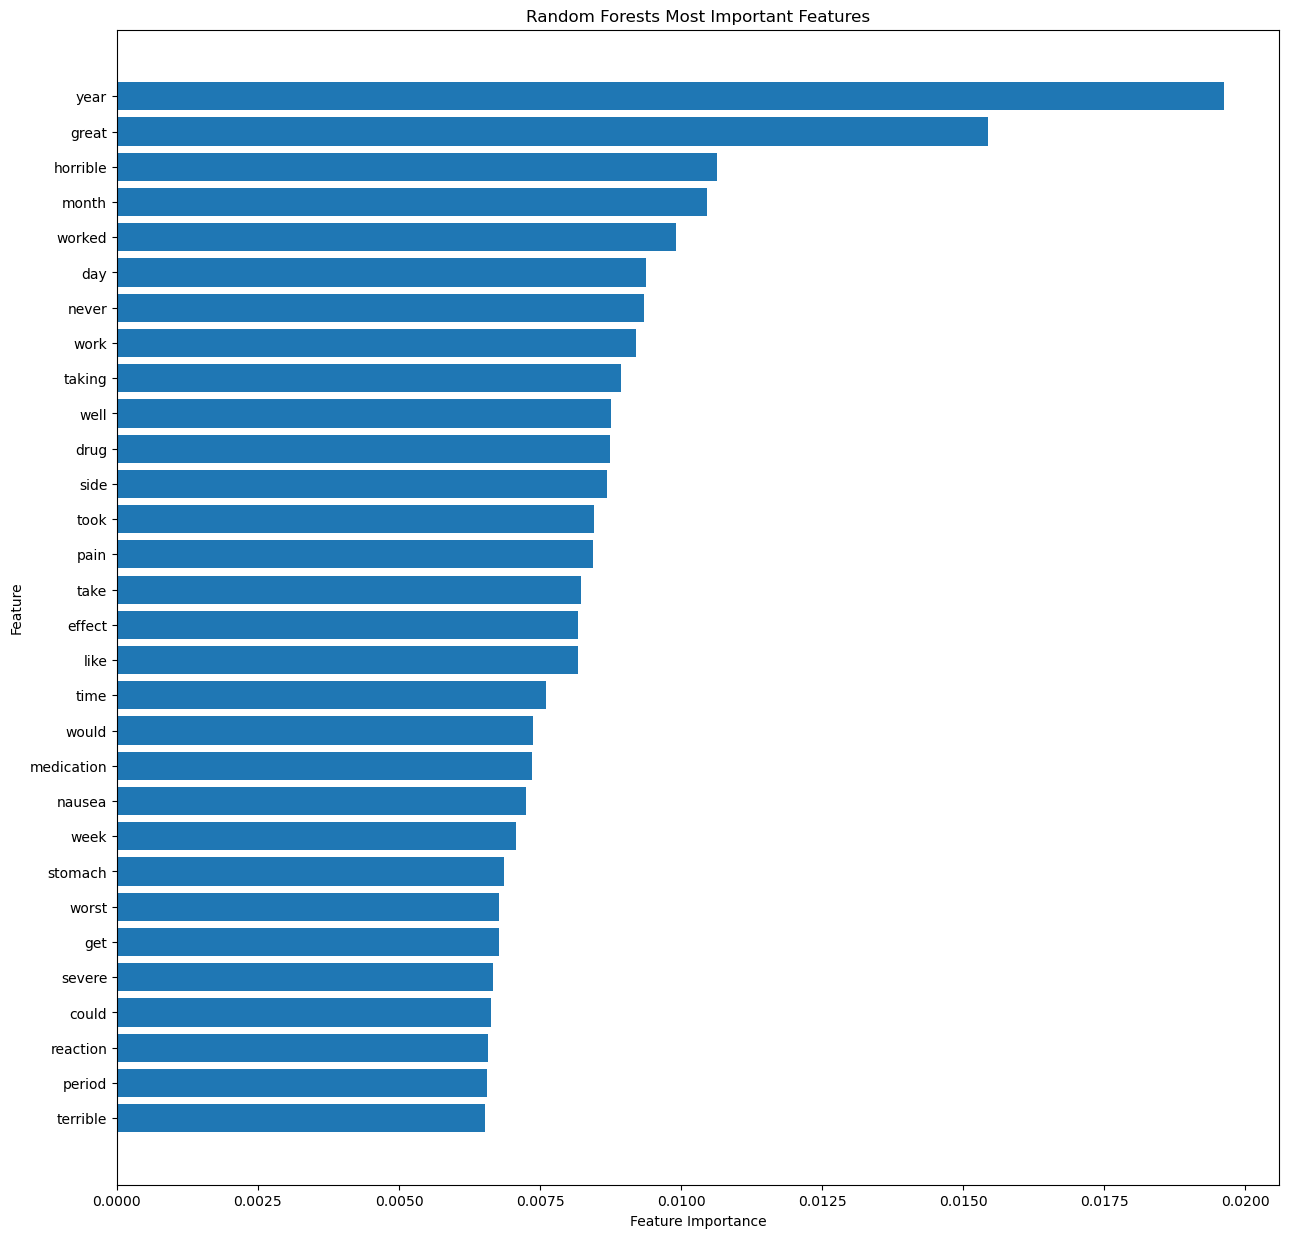

In [88]:
# Feature importance Random Forests
feature_importance = best_estimator.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center', color='#1f77b4')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order
plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## RF Unigrams + polarity without additional features

In [109]:
# Hyperparameter tuning: Randomized search
start_time = time.time()

param_grid = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy'], 
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs=5,
                                   verbose = 5, 
                                   random_state=42)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best score found: ",-rf_random.best_score_)
print ('Best estimator:', rf_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.667 total time=   3.6s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=468;, score=-0.670 total time=  35.6s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.660 total time=  22.9s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=5, n_estimators=423;, score=-0.696 total time=   5.6s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=323;, score=-0.659 total time=  44.7s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=44, min_samples_leaf=9, min_samples_split=2, n_estimators=484;, score=-0.651 total time= 1.4min
[CV 1/5] END bootstr

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.673 total time=   3.7s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=468;, score=-0.664 total time=  35.7s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.660 total time=  23.1s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=5, n_estimators=423;, score=-0.697 total time=   5.5s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=323;, score=-0.671 total time=  44.6s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=44, min_samples_leaf=9, min_samples_split=2, n_estimators=484;, score=-0.656 total time= 1.4min
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=42, min_samples_leaf=3, min_

In [115]:
# Save Randomized and 5CV results 
RF_nofeat_UT_CV = pd.DataFrame(rf_random.cv_results_)
RF_nofeat_UT_CV.to_csv('RF_nofeat_UT_CV.csv', index=False)
box_fig = pd.read_csv('RF_nofeat_UT_CV.csv')

In [117]:
# box_fig.head()

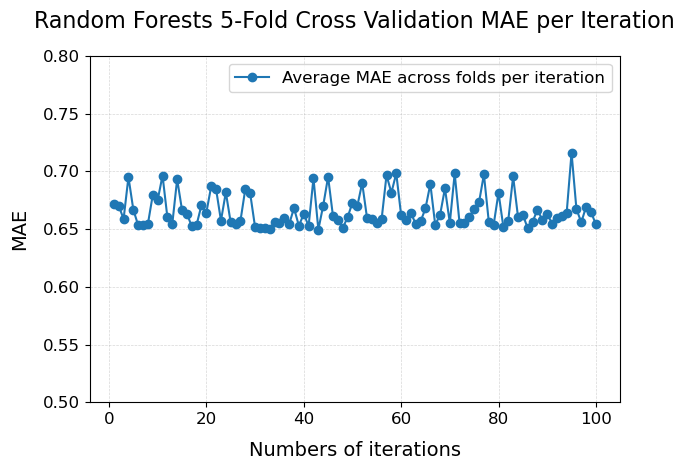

In [118]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('Random Forests 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AVG_Iterations.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [119]:
# Trained Random Forests predict test data with best estimator
best_estimator = rf_random.best_estimator_
y_pred = best_estimator.predict(X_test)

Test MAE: 0.638
Test RMSE: 0.996
Test CWK: 0.300


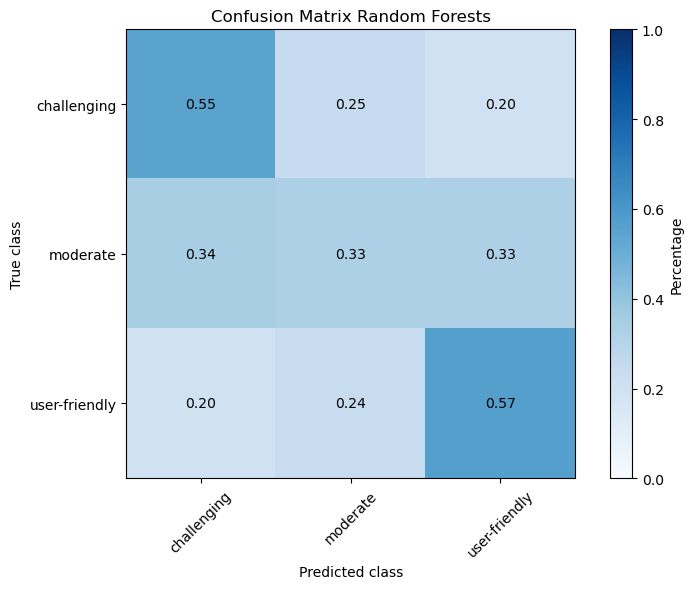

In [120]:
# Evaluation trained best estimator Random Forests
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('RFConfusionMatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

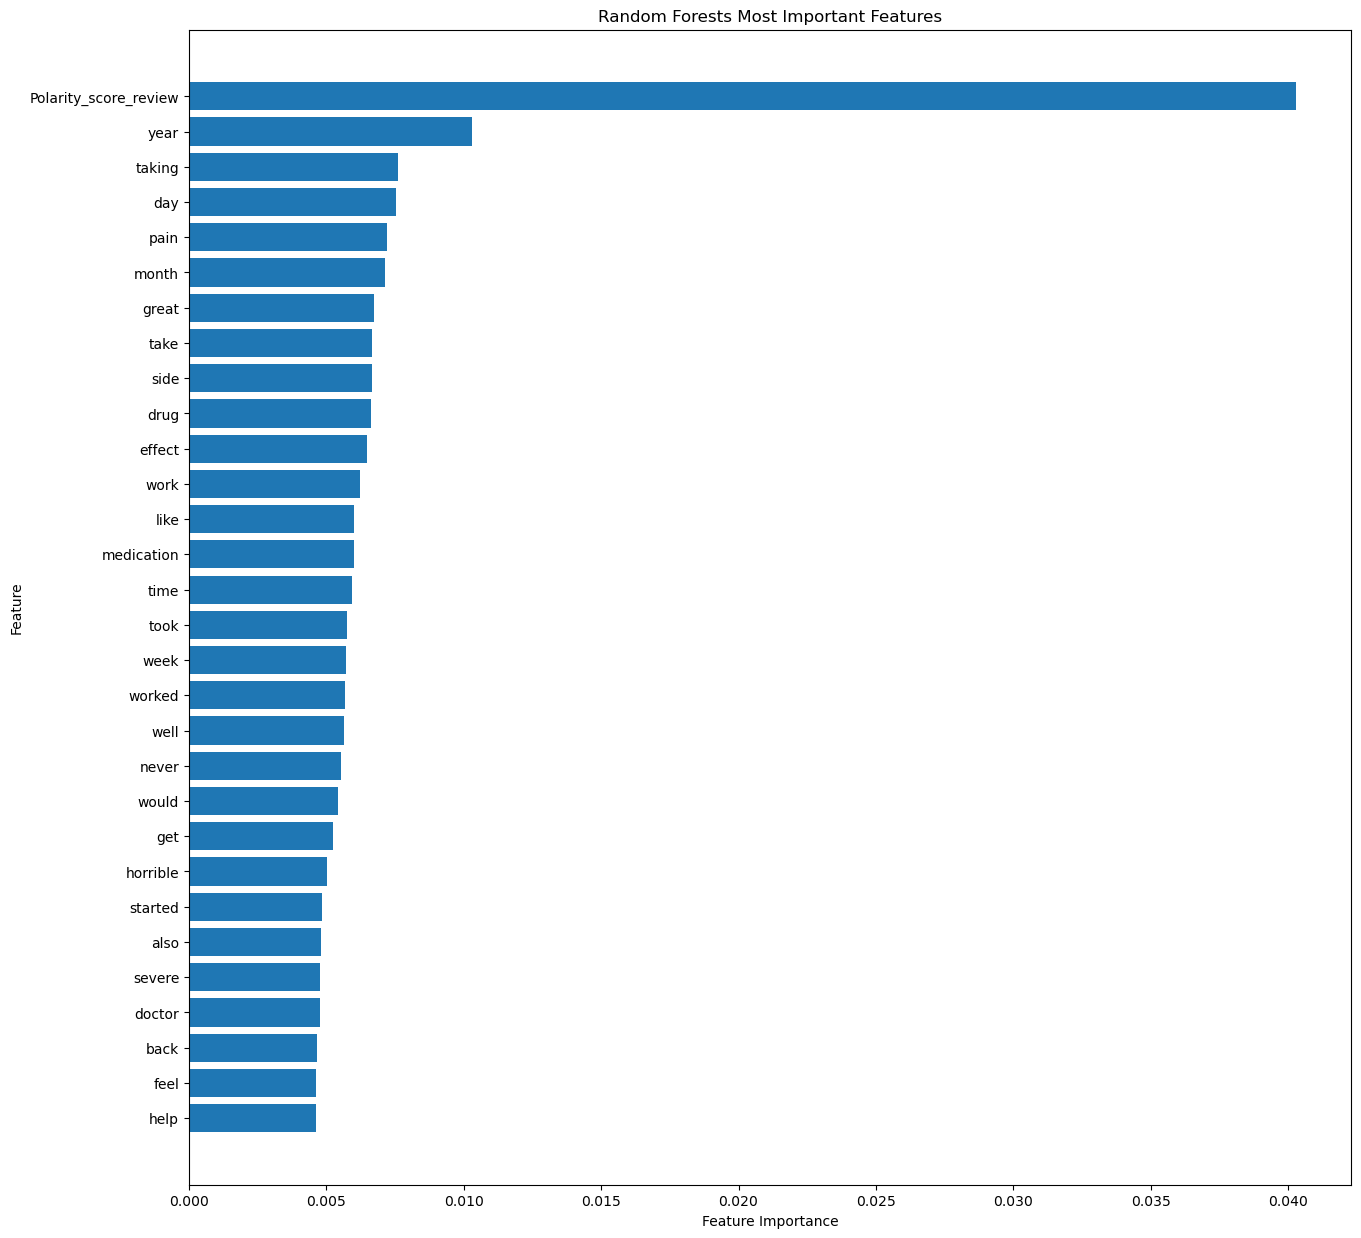

In [121]:
# Feature importance Random Forests
feature_importance = best_estimator.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center', color='#1f77b4')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order
plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## RF unigrams, bigrams without additional features 

In [141]:
# Hyperparameter tuning: Randomized search
start_time = time.time()

param_grid = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy'], 
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs=5,
                                   verbose = 5, 
                                   random_state=42)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best score found: ",-rf_random.best_score_)
print ('Best estimator:', rf_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.662 total time=   3.8s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=468;, score=-0.653 total time=  37.4s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.672 total time=  24.7s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=5, n_estimators=423;, score=-0.708 total time=   5.4s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=323;, score=-0.675 total time=  45.9s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=44, min_samples_leaf=9, min_samples_split=2, n_estimators=484;, score=-0.634 total time= 1.5min
[CV 2/5] END bootstr

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.681 total time=   3.8s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=468;, score=-0.670 total time=  37.1s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.640 total time=  24.6s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=5, n_estimators=423;, score=-0.671 total time=   5.5s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=323;, score=-0.632 total time=  46.3s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=44, min_samples_leaf=9, min_samples_split=2, n_estimators=484;, score=-0.673 total time= 1.5min
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=42, min_samples_leaf=3, min_

In [142]:
# Save Randomized and 5CV results 
RF_nofeat_UBT_CV = pd.DataFrame(rf_random.cv_results_)
RF_nofeat_UBT_CV.to_csv('RF_nofeat_UBT_CV.csv', index=False)
box_fig = pd.read_csv('RF_nofeat_UBT_CV.csv')

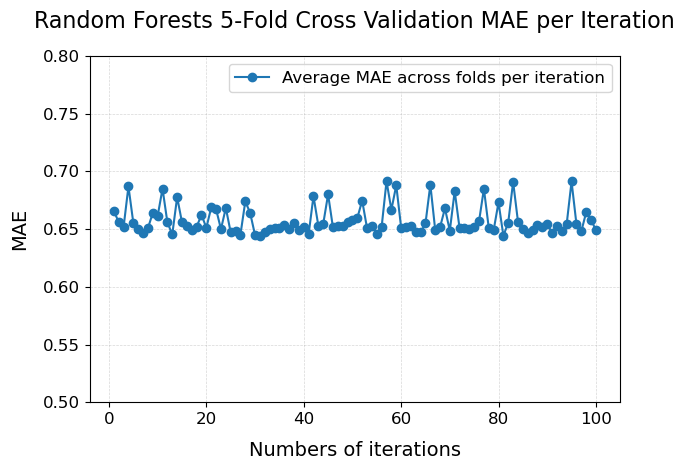

In [143]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('Random Forests 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AVG_Iterations.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [144]:
# Trained Random Forests predict test data with best estimator
best_estimator = rf_random.best_estimator_
y_pred = best_estimator.predict(X_test)

Test MAE: 0.640
Test RMSE: 0.985
Test CWK: 0.304


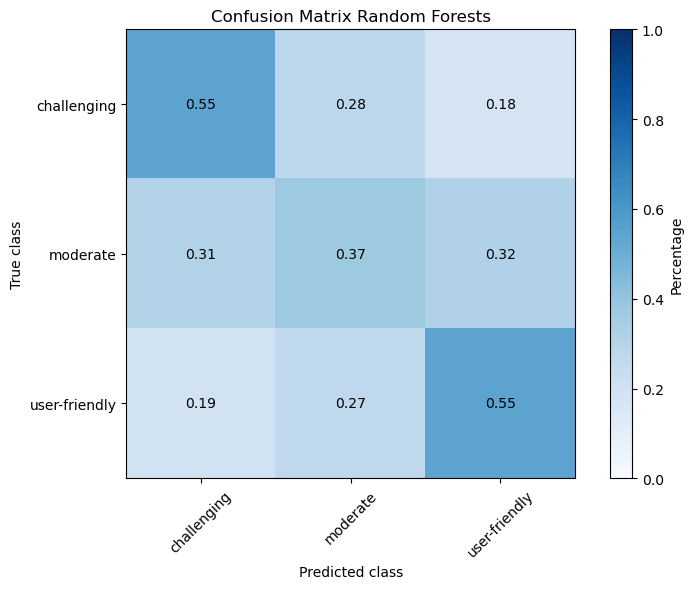

In [145]:
# Evaluation trained best estimator Random Forests
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('RFConfusionMatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

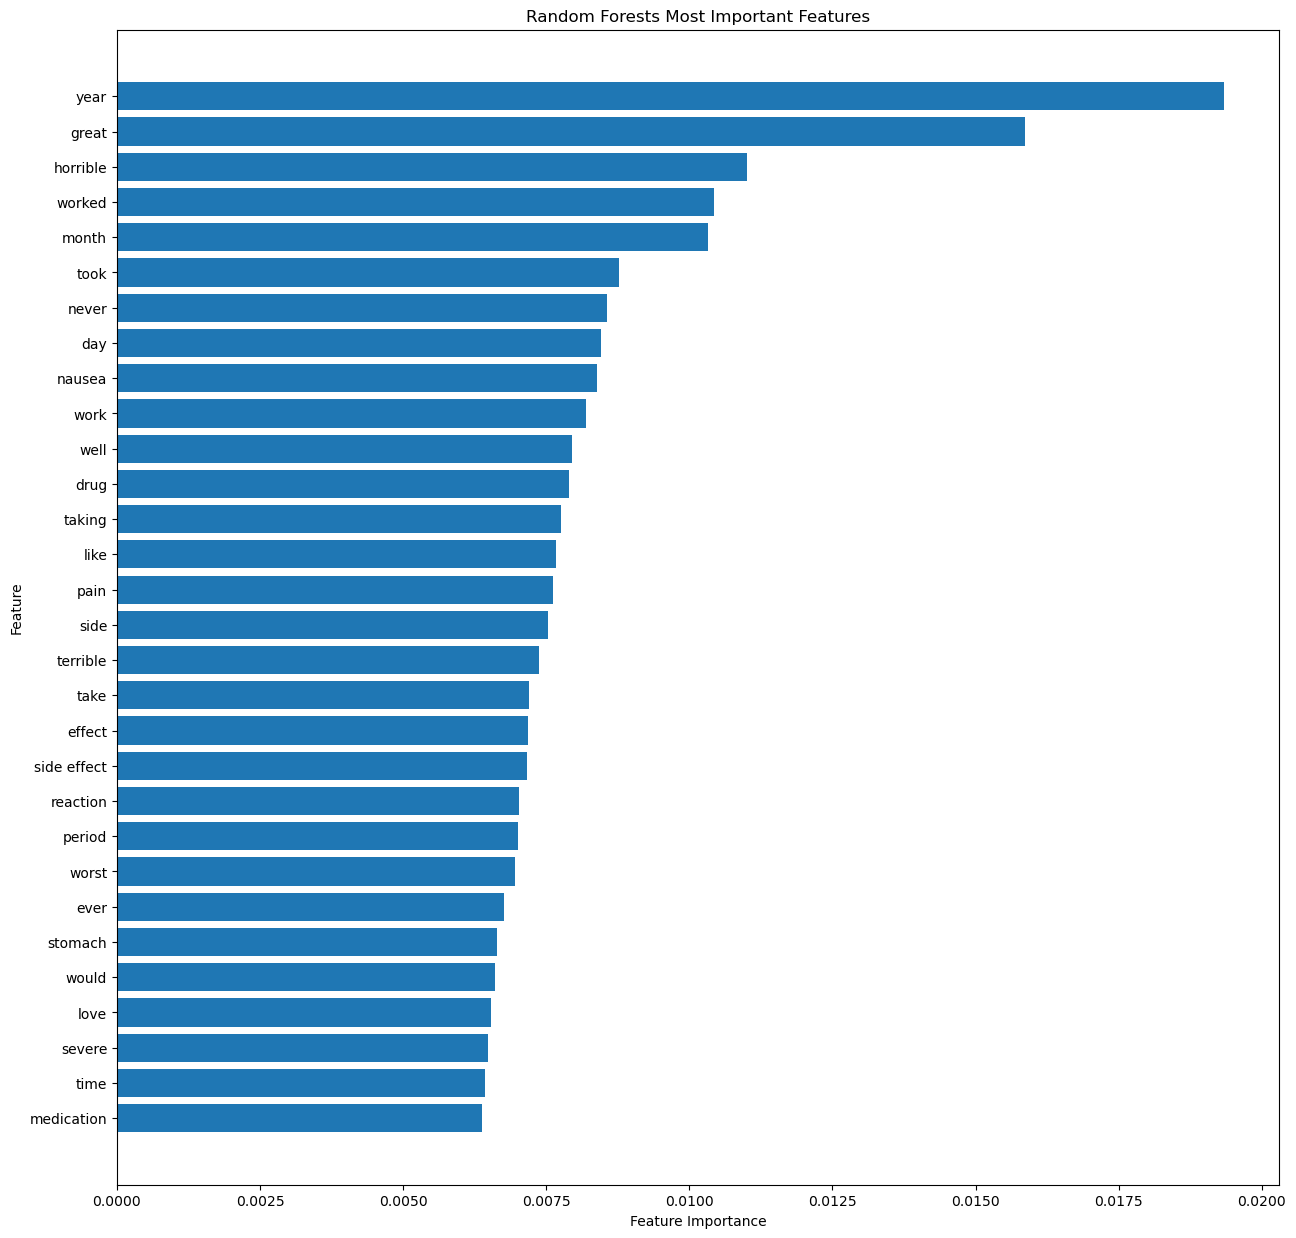

In [146]:
# Feature importance Random Forests
feature_importance = best_estimator.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center', color='#1f77b4')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order
plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## RF model with unigrams, bigrams + polarity score without features 'Age', 'Gender'

In [105]:
# Hyperparameter tuning: Randomized search
start_time = time.time()

param_grid = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(1, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap' : [True, False],
    'criterion': ['gini', 'entropy'], 
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs=5,
                                   verbose = 3, 
                                   random_state=42)
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best score found: ",-rf_random.best_score_)
print ('Best estimator:', rf_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.682 total time=   2.6s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=468;, score=-0.669 total time=  20.1s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.661 total time=  13.9s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=5, n_estimators=423;, score=-0.728 total time=   3.5s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=323;, score=-0.689 total time=  28.3s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=44, min_samples_leaf=9, min_samples_split=2, n_estimators=484;, score=-0.652 total time=  56.5s
[CV 3/5] END bootstr

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=29, min_samples_leaf=8, min_samples_split=6, n_estimators=30;, score=-0.656 total time=   2.6s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=19, min_samples_leaf=7, min_samples_split=4, n_estimators=468;, score=-0.667 total time=  20.1s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=36, min_samples_leaf=8, min_samples_split=9, n_estimators=140;, score=-0.641 total time=  14.0s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=2, min_samples_leaf=8, min_samples_split=5, n_estimators=423;, score=-0.697 total time=   3.5s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=5, n_estimators=323;, score=-0.664 total time=  28.3s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=44, min_samples_leaf=9, min_samples_split=2, n_estimators=484;, score=-0.675 total time=  56.5s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=42, min_samples_leaf=3, min_

In [106]:
# Save Randomized and 5CV results 
RF_nofeat_CV = pd.DataFrame(rf_random.cv_results_)
RF_nofeat_CV.to_csv('RF_nofeat_CV.csv', index=False)
box_fig = pd.read_csv('RF_nofeat_CV.csv')

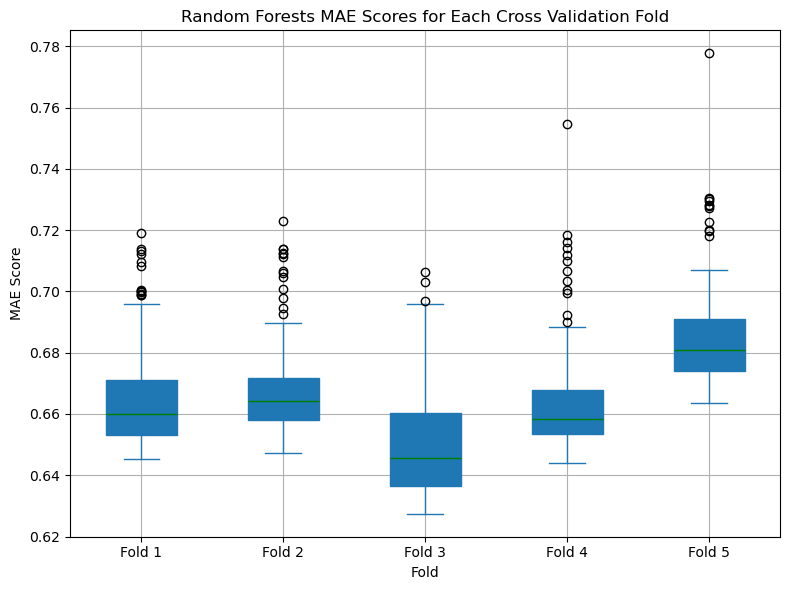

In [107]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True, color='#1f77b4',medianprops=dict(color='green'))
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('Random Forests MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

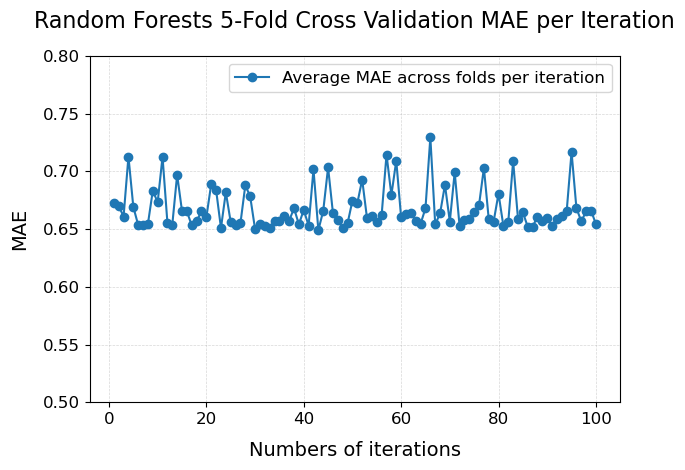

In [108]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('Random Forests 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('AVG_Iterations.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [109]:
# Trained Random Forests predict test data with best estimator
best_estimator = rf_random.best_estimator_
y_pred = best_estimator.predict(X_test)

Test MAE: 0.633
Test RMSE: 0.988
Test CWK: 0.306


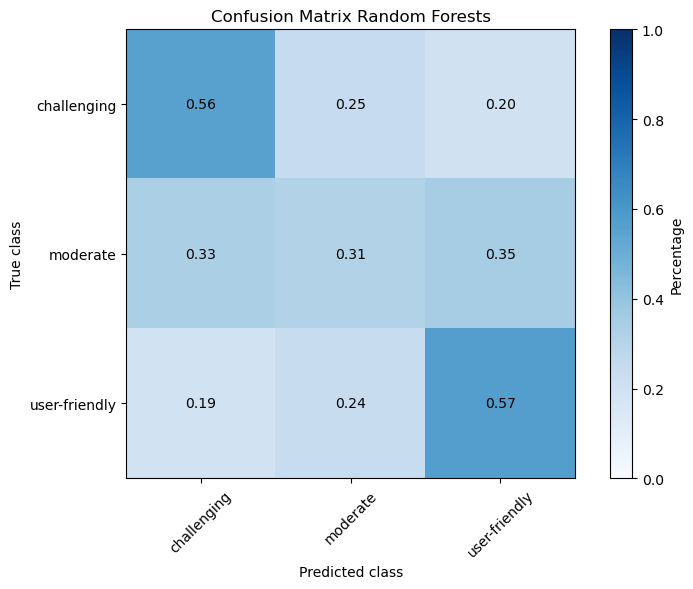

In [110]:
# Evaluation trained best estimator Random Forests
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('RFConfusionMatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

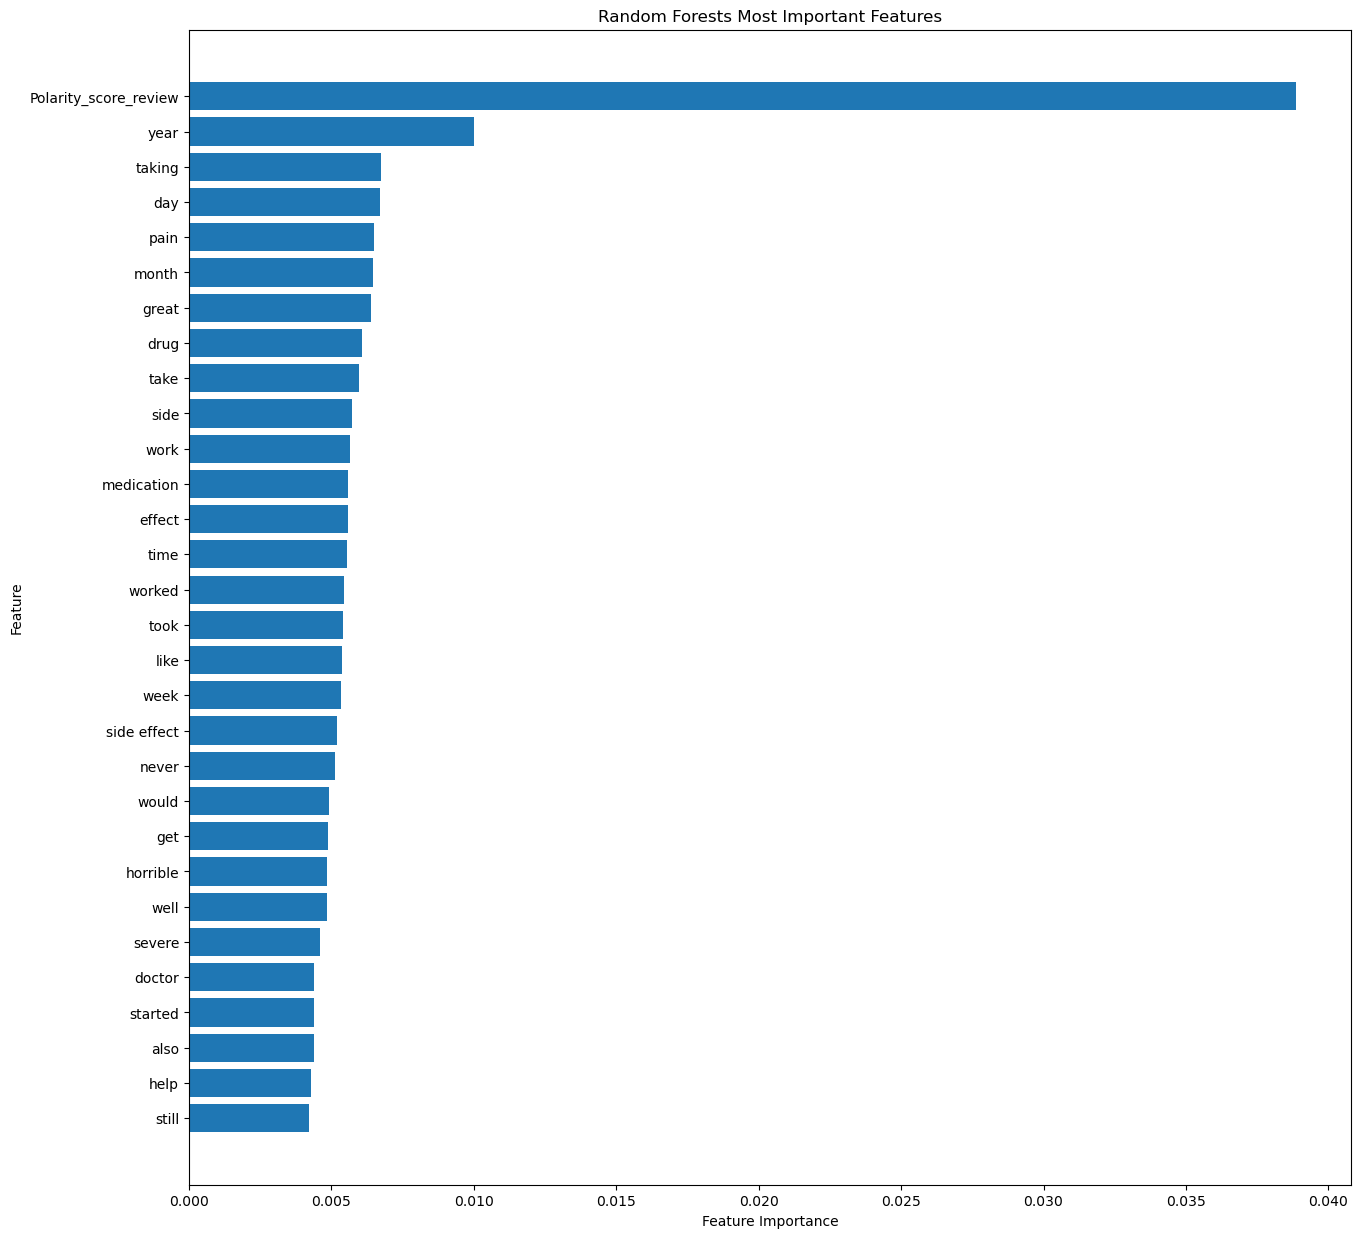

In [111]:
# Feature importance Random Forests
feature_importance = best_estimator.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center', color='#1f77b4')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forests Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to display features in descending order
plt.savefig('Feature importance.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## LightGBM with unigrams and bigrams without features 'Age', 'Gender'

In [20]:
# Hyperparameter tuning Randomized search
start_time = time.time()


param_grid = {
    'objective': ['multiclass'],
    'verbose': [-1],
    'num_class': [3],
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(10, 201)),
    'learning_rate': [i/100 for i in range(1, 51)],
    'feature_fraction': [i/10 for i in range(5, 10)],
    'bagging_fraction': [i/10 for i in range(5, 10)],
    'bagging_freq': list(range(1, 11)),
    'min_data_in_leaf': list(range(5, 31)),
    'lambda_l1': [i/10 for i in range(11)],
    'lambda_l2': [i/10 for i in range(11)],
    'max_depth': list(range(5, 71)),
    'min_gain_to_split': [i/100 for i in range(5, 31)],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
lgbm_random = RandomizedSearchCV(estimator=lgbm_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   random_state=42,
                                   verbose = 3)
lgbm_random.fit(X_train, y_train)



print("Best Parameters:", lgbm_random.best_params_)
print("Best score found: ",-lgbm_random.best_score_)
print ('Best estimator:', lgbm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.691 total time=  26.7s
[CV 2/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.682 total time=  20.1s
[CV 3/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.672 total time=  19.1s
[CV 4/5] END bagging_fraction=0.6, bagging_fre

In [21]:
# Save Randomized and 5CV results
LGBM_nofeat_CV = pd.DataFrame(lgbm_random.cv_results_)
LGBM_nofeat_CV.to_csv('/content/drive/MyDrive/3_classes/LGBM_nofeat_CV.csv', index=False)
box_fig = pd.read_csv('/content/drive/MyDrive/3_classes/LGBM_nofeat_CV.csv')

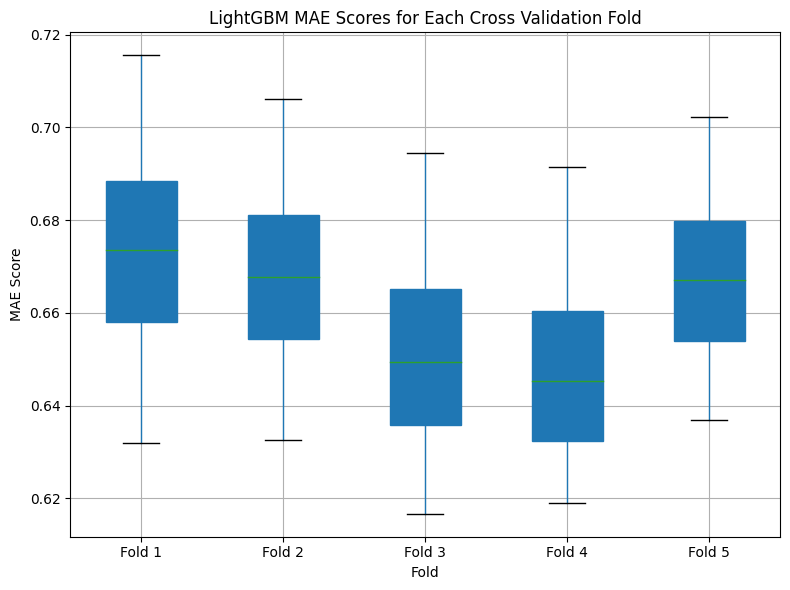

In [22]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True)
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('LightGBM MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

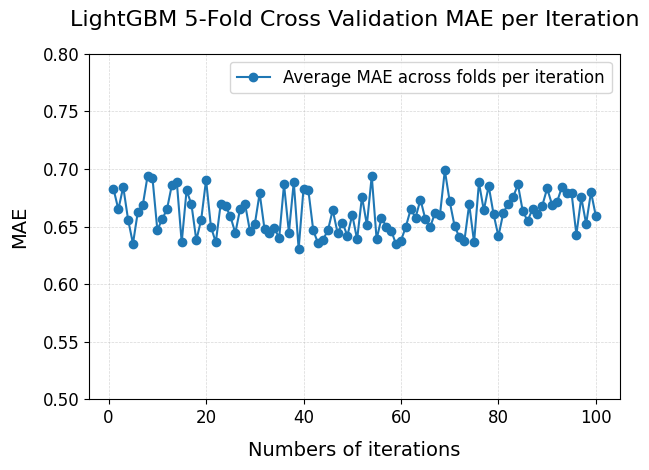

In [23]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')


plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('LightGBM 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [24]:
# Trained LGBM predict test data with best estimator
lgb_random1 = lgbm_random.best_estimator_
y_pred = lgb_random1.predict(X_test)

Test MAE: 0.634
Test RMSE: 0.972
Test CWK: 0.314


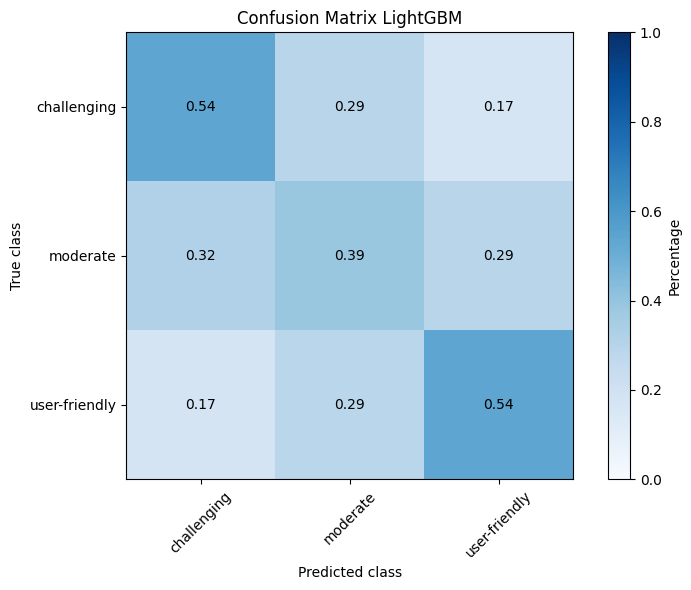

In [25]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('/content/drive/MyDrive/3_classes/LGBM_confusionmatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

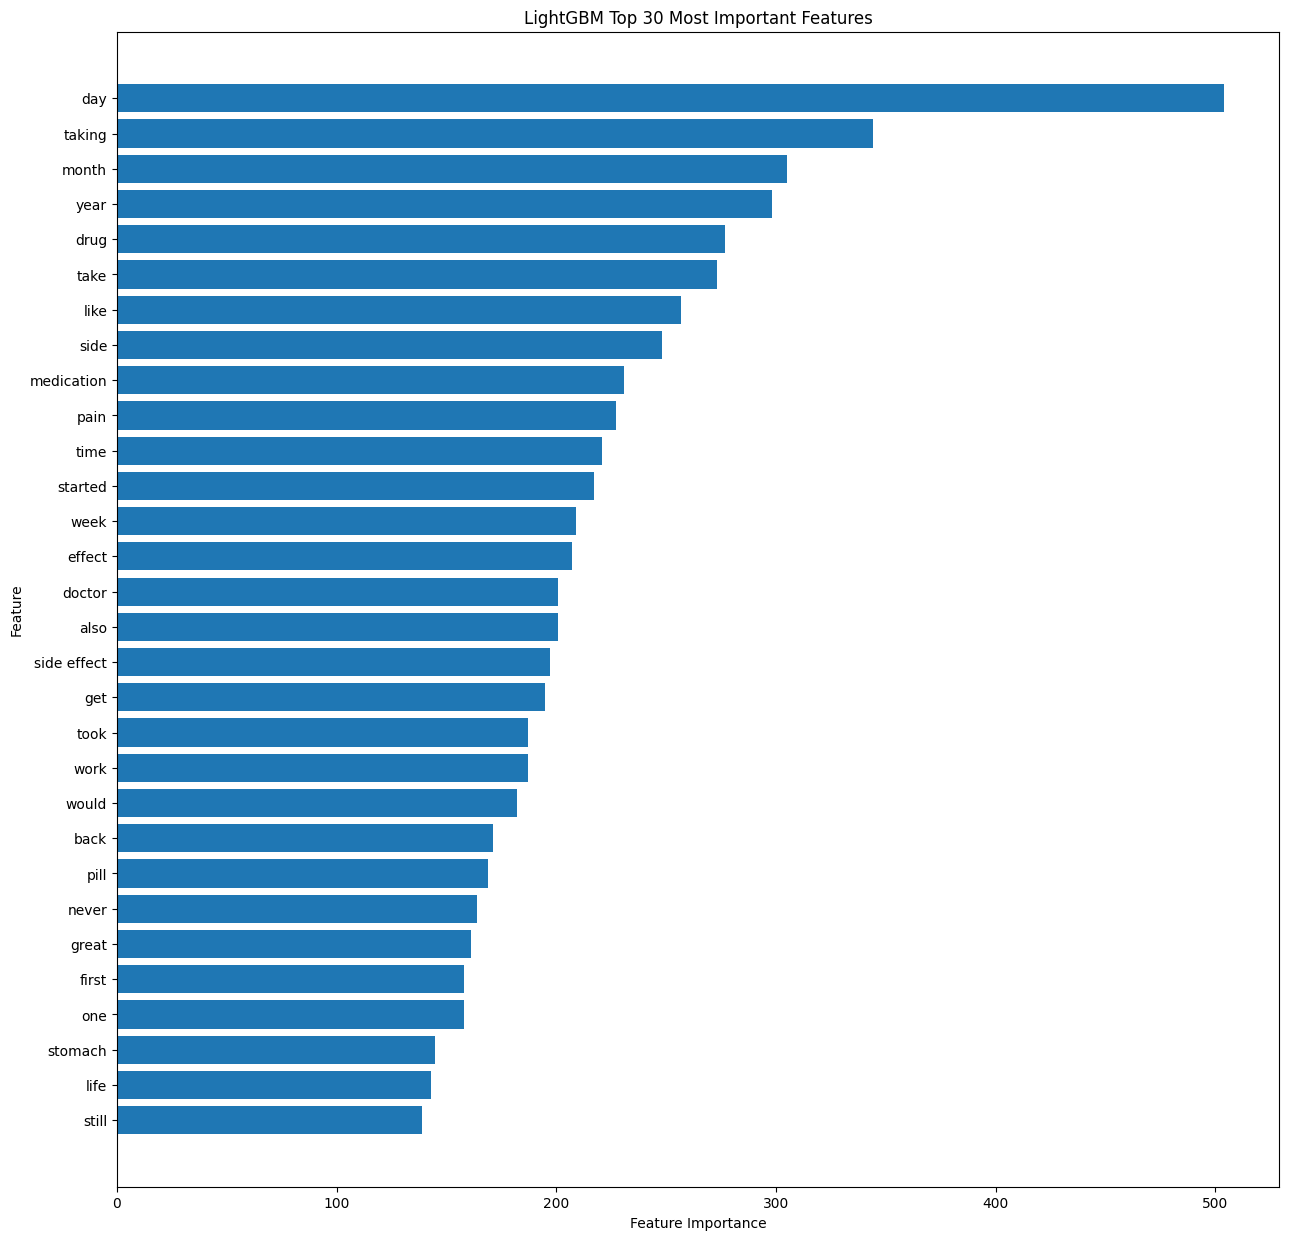

In [26]:
# Feature importance LightGBM
feature_importance = lgb_random1.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_featureimportance', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## LGBM unigrams without additional features 

In [21]:
# Hyperparameter tuning Randomized search
start_time = time.time()


param_grid = {
    'objective': ['multiclass'],
    'verbose': [-1],
    'num_class': [3],
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(10, 201)),
    'learning_rate': [i/100 for i in range(1, 51)],
    'feature_fraction': [i/10 for i in range(5, 10)],
    'bagging_fraction': [i/10 for i in range(5, 10)],
    'bagging_freq': list(range(1, 11)),
    'min_data_in_leaf': list(range(5, 31)),
    'lambda_l1': [i/10 for i in range(11)],
    'lambda_l2': [i/10 for i in range(11)],
    'max_depth': list(range(5, 71)),
    'min_gain_to_split': [i/100 for i in range(5, 31)],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
lgbm_random = RandomizedSearchCV(estimator=lgbm_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   random_state=42,
                                   verbose = 3)
lgbm_random.fit(X_train, y_train)



print("Best Parameters:", lgbm_random.best_params_)
print("Best score found: ",-lgbm_random.best_score_)
print ('Best estimator:', lgbm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.690 total time=  22.0s
[CV 2/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.684 total time=  19.2s
[CV 3/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.665 total time=  20.7s
[CV 4/5] END bagging_fraction=0.6, bagging_fre

In [22]:
# Save Randomized and 5CV results
LGBM_U_nofeat_CV = pd.DataFrame(lgbm_random.cv_results_)
LGBM_U_nofeat_CV.to_csv('/content/drive/MyDrive/3_classes/LGBM_U_nofeat_CV.csv', index=False)
box_fig = pd.read_csv('/content/drive/MyDrive/3_classes/LGBM_U_nofeat_CV.csv')

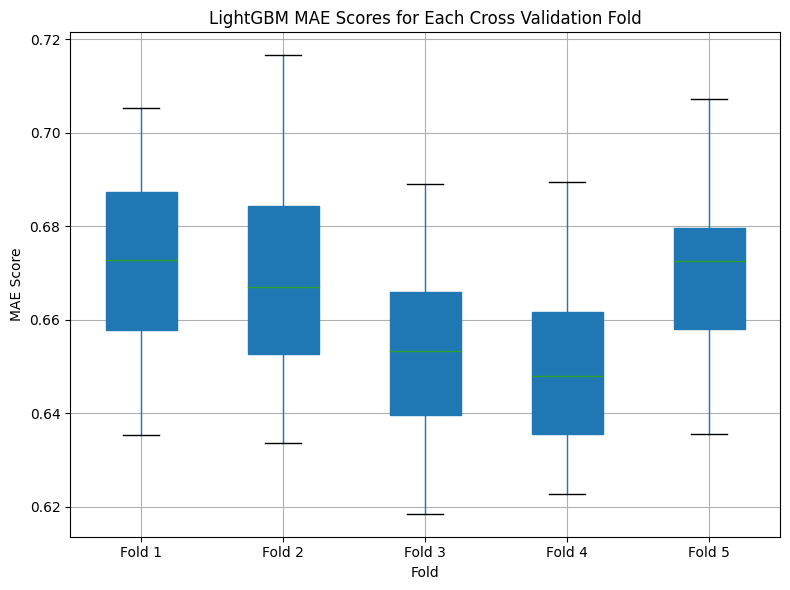

In [23]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True)
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('LightGBM MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

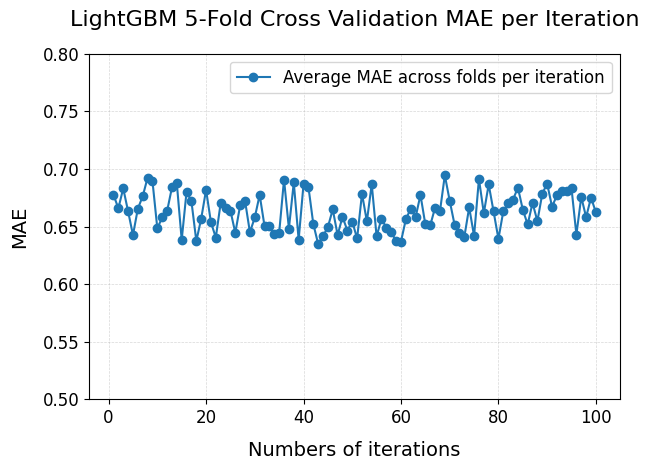

In [25]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')


plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('LightGBM 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [26]:
# Trained LGBM predict test data with best estimator
lgb_random1 = lgbm_random.best_estimator_
y_pred = lgb_random1.predict(X_test)

Test MAE: 0.629
Test RMSE: 0.977
Test CWK: 0.315


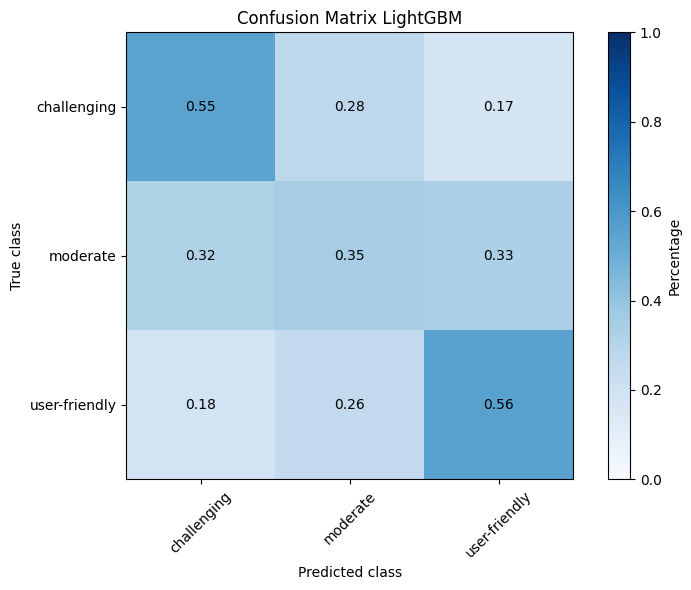

In [28]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('/content/drive/MyDrive/3_classes/LGBM_confusionmatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

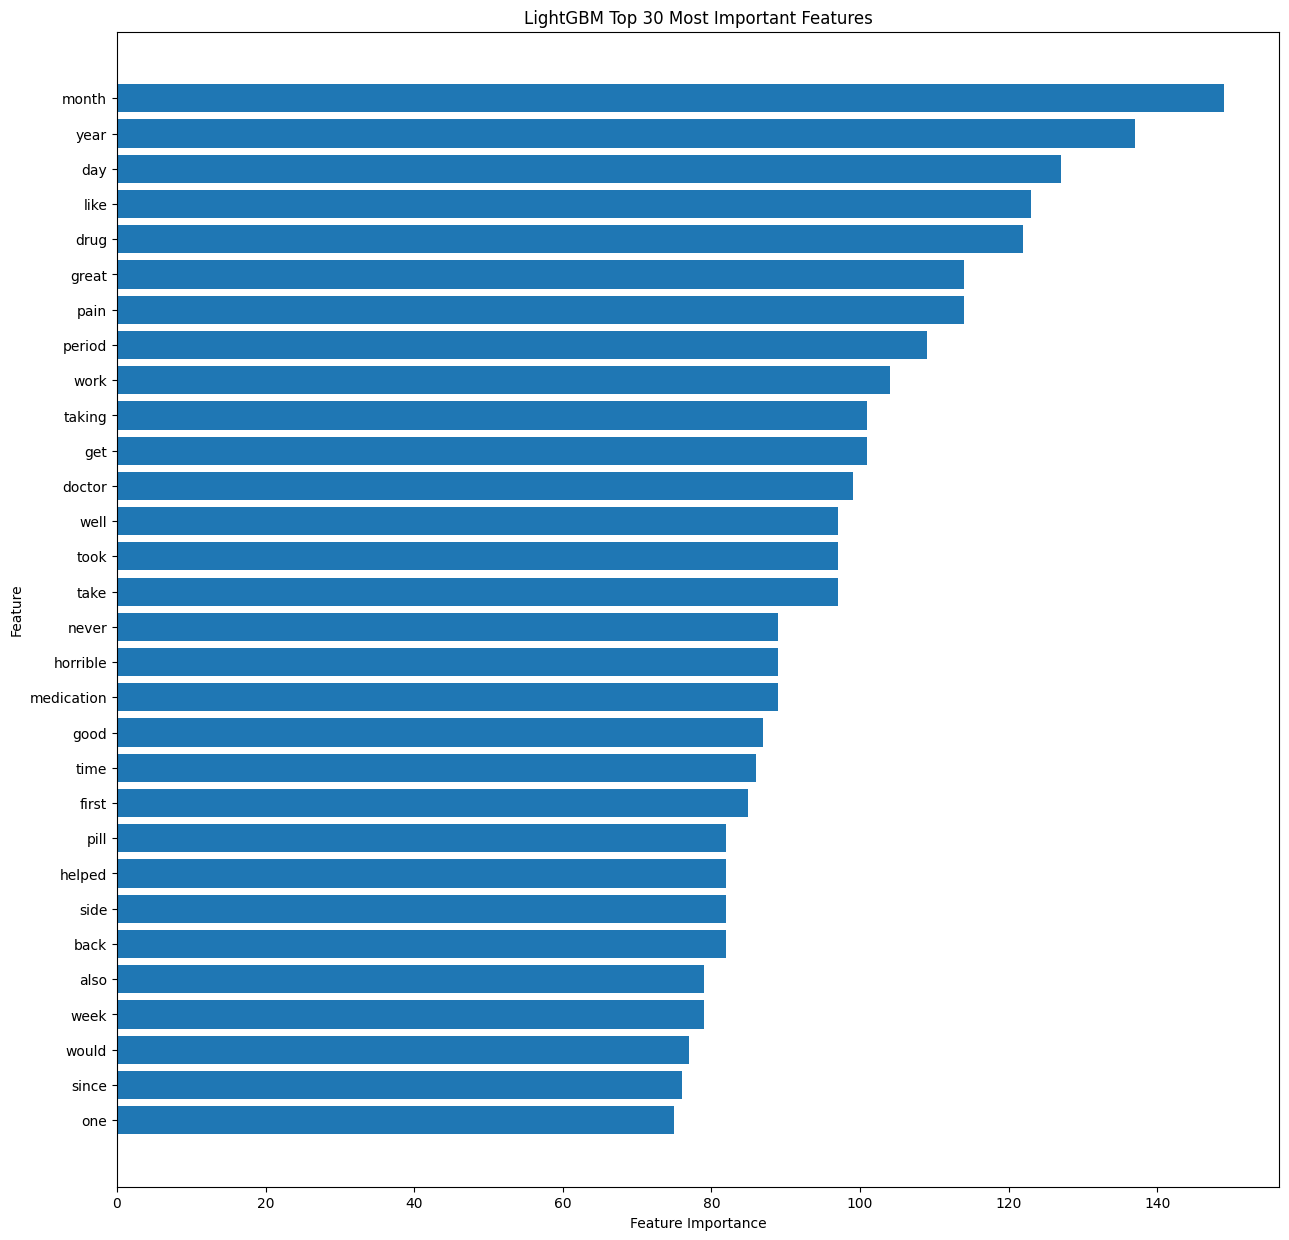

In [29]:
# Feature importance LightGBM
feature_importance = lgb_random1.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_featureimportance', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## LGBM unigrams + polarity score without additional features

In [25]:
# Hyperparameter tuning Randomized search
start_time = time.time()


param_grid = {
    'random_state' : [42],
    'objective': ['multiclass'],
    'verbose': [-1],
    'num_class': [3],
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(10, 201)),
    'learning_rate': [i/100 for i in range(1, 51)],
    'feature_fraction': [i/10 for i in range(5, 10)],
    'bagging_fraction': [i/10 for i in range(5, 10)],
    'bagging_freq': list(range(1, 11)),
    'min_data_in_leaf': list(range(5, 31)),
    'lambda_l1': [i/10 for i in range(11)],
    'lambda_l2': [i/10 for i in range(11)],
    'max_depth': list(range(5, 71)),
    'min_gain_to_split': [i/100 for i in range(5, 31)],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_classifier = lgb.LGBMClassifier()
lgbm_random = RandomizedSearchCV(estimator=lgbm_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   random_state=42,
                                   verbose = 3)
lgbm_random.fit(X_train, y_train)



print("Best Parameters:", lgbm_random.best_params_)
print("Best score found: ",-lgbm_random.best_score_)
print ('Best estimator:', lgbm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.679 total time=  18.1s
[CV 2/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.675 total time=  18.2s
[CV 3/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, random_state=42, verbose=-1;, score=-0.674 total time=  1

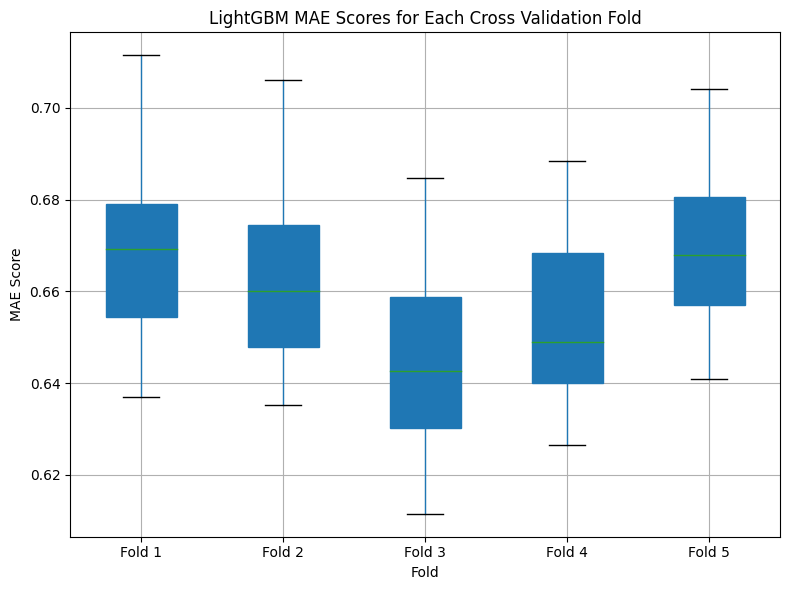

In [27]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True)
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('LightGBM MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

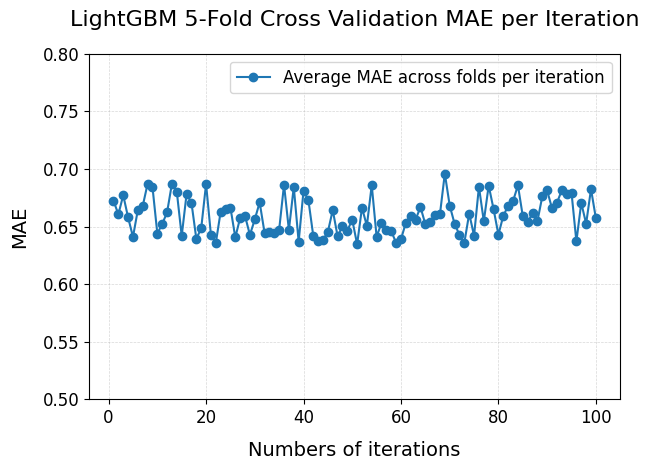

In [28]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('LightGBM 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [29]:
# Trained LGBM predict test data with best estimator
lgb_random1 = lgbm_random.best_estimator_
y_pred = lgb_random1.predict(X_test)

Test MAE: 0.638
Test RMSE: 0.983
Test CWK: 0.304


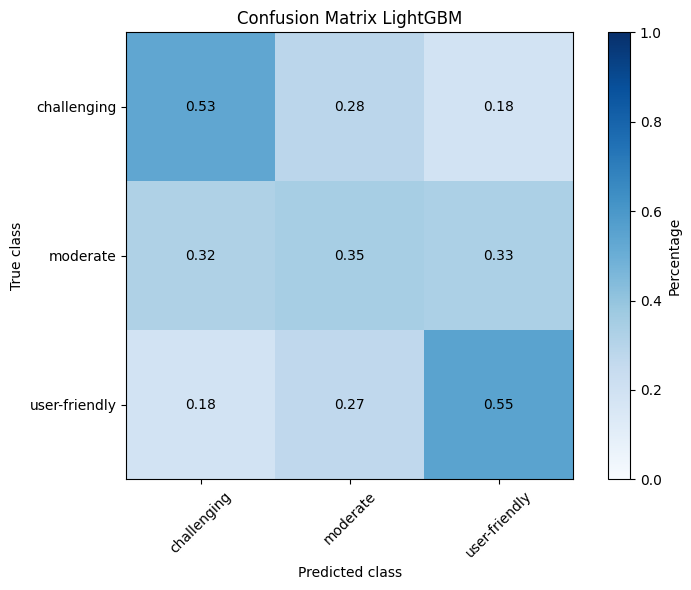

In [30]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('/content/drive/MyDrive/3_classes/LGBM_confusionmatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

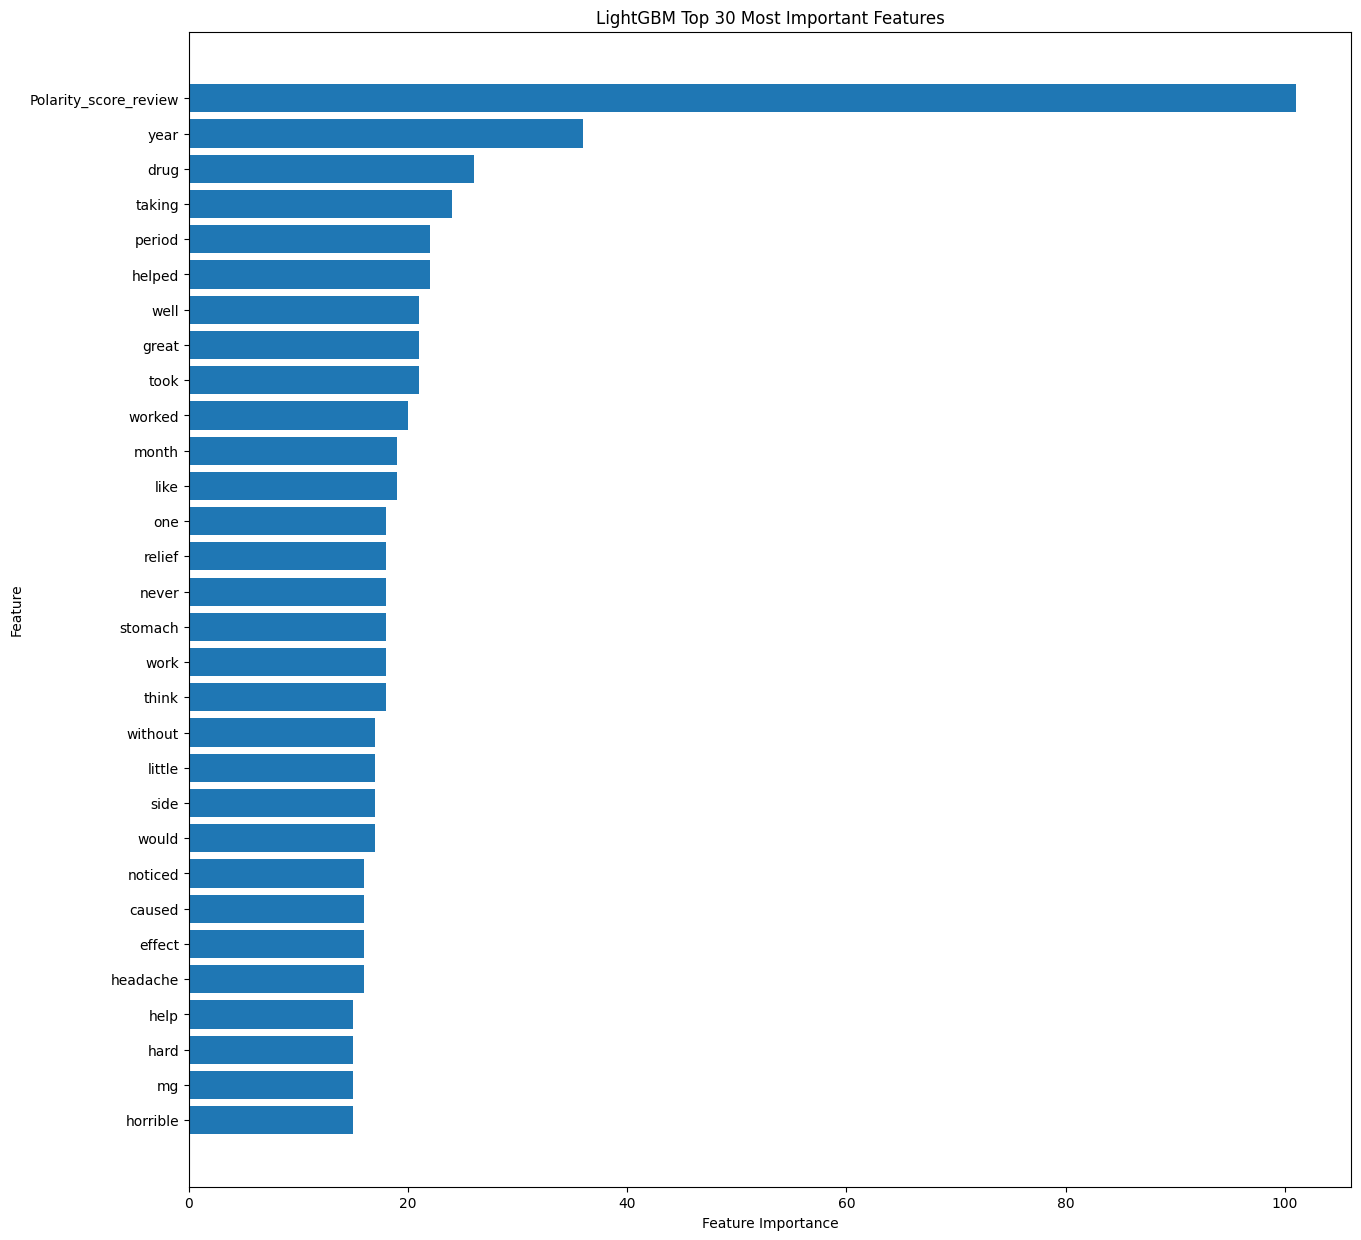

In [31]:
# Feature importance LightGBM
feature_importance = lgb_random1.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_featureimportance', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## LGBM unigrams, bigrams + polarity score without additional features 

In [19]:
# Hyperparameter tuning Randomized search
start_time = time.time()

param_grid = {
    'objective': ['multiclass'],
    'verbose': [-1],
    'num_class': [3],
    'boosting_type': ['gbdt'],
    'num_leaves': list(range(10, 201)),
    'learning_rate': [i/100 for i in range(1, 51)],
    'feature_fraction': [i/10 for i in range(5, 10)],
    'bagging_fraction': [i/10 for i in range(5, 10)],
    'bagging_freq': list(range(1, 11)),
    'min_data_in_leaf': list(range(5, 31)),
    'lambda_l1': [i/10 for i in range(11)],
    'lambda_l2': [i/10 for i in range(11)],
    'max_depth': list(range(5, 71)),
    'min_gain_to_split': [i/100 for i in range(5, 31)],
}

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
lgbm_random = RandomizedSearchCV(estimator=lgbm_classifier,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=k_fold,
                                   scoring = 'neg_mean_absolute_error',
                                   random_state=42,
                                   verbose = 3)
lgbm_random.fit(X_train, y_train)



print("Best Parameters:", lgbm_random.best_params_)
print("Best score found: ",-lgbm_random.best_score_)
print ('Best estimator:', lgbm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.685 total time=  20.0s
[CV 2/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.684 total time=  19.4s
[CV 3/5] END bagging_fraction=0.6, bagging_freq=5, boosting_type=gbdt, feature_fraction=0.6, lambda_l1=0.7, lambda_l2=0.2, learning_rate=0.38, max_depth=55, min_data_in_leaf=22, min_gain_to_split=0.23, num_class=3, num_leaves=52, objective=multiclass, verbose=-1;, score=-0.673 total time=  18.9s
[CV 4/5] END bagging_fraction=0.6, bagging_fre

In [20]:
# Save Randomized and 5CV results
LGBM_UBTnofeat_CV = pd.DataFrame(lgbm_random.cv_results_)
LGBM_UBTnofeat_CV.to_csv('/content/drive/MyDrive/3_classes/LGBM_UBTnofeat_CV.csv', index=False)
box_fig = pd.read_csv('/content/drive/MyDrive/3_classes/LGBM_UBTnofeat_CV.csv')

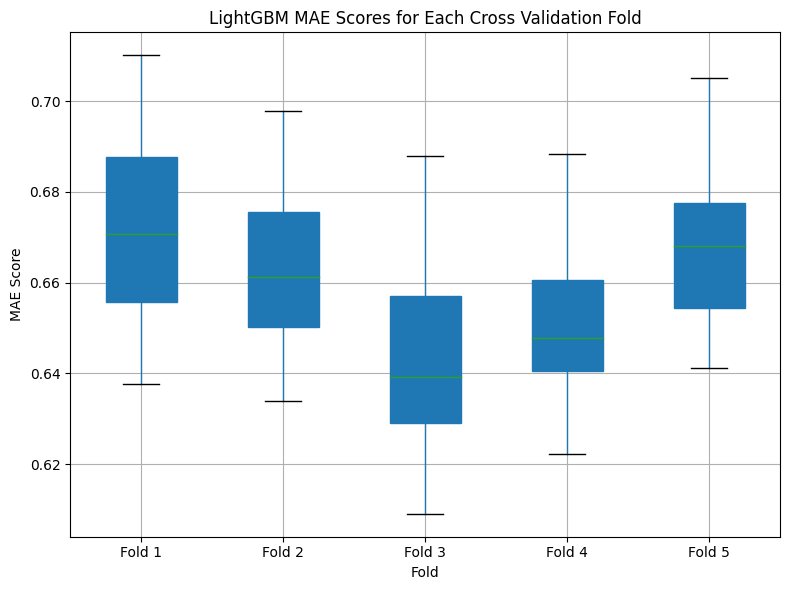

In [21]:
# Boxplot MAE Scores for each fold
plt.figure(figsize=(8, 6))
numeric_cols = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
box_fig[numeric_cols] = box_fig[numeric_cols].abs()
bp = box_fig.boxplot(column=numeric_cols, patch_artist=True)
plt.xlabel('Fold')
plt.ylabel('MAE Score')
plt.title('LightGBM MAE Scores for Each Cross Validation Fold')
plt.xticks(ticks=range(1, 6), labels=[f'Fold {i+1}' for i in range(5)])
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/MAE_perFold.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

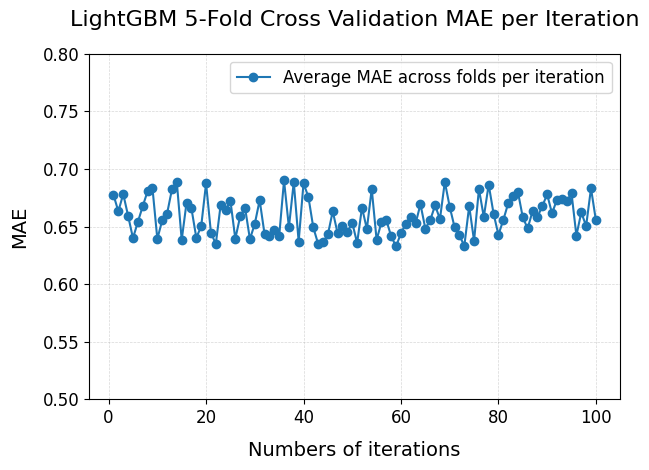

In [22]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('LightGBM 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 0.8)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [23]:
# Trained LGBM predict test data with best estimator
lgb_random1 = lgbm_random.best_estimator_
y_pred = lgb_random1.predict(X_test)

Test MAE: 0.642
Test RMSE: 0.983
Test CWK: 0.306


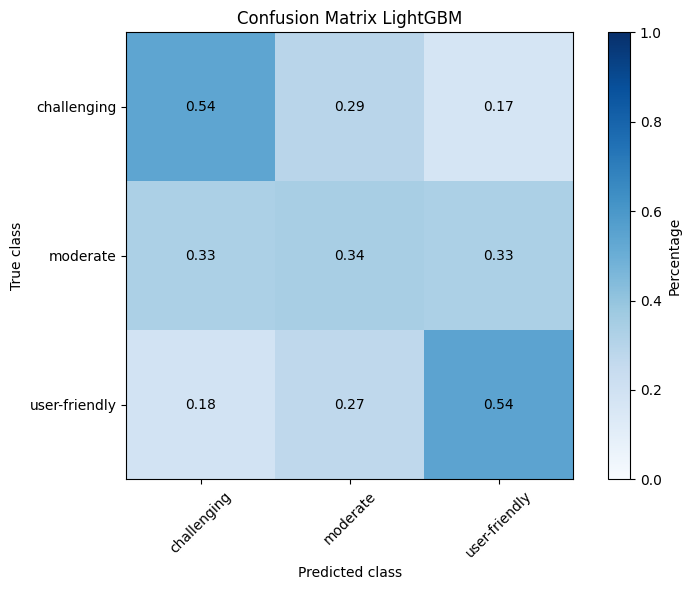

In [24]:
# Evaluation
lgbm_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {lgbm_mae:.3f}')
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = lgbm_mse ** 0.5
print(f'Test RMSE: {lgbm_rmse:.3f}')
lgbm_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {lgbm_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix LightGBM')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.savefig('/content/drive/MyDrive/3_classes/LGBM_confusionmatrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.show()

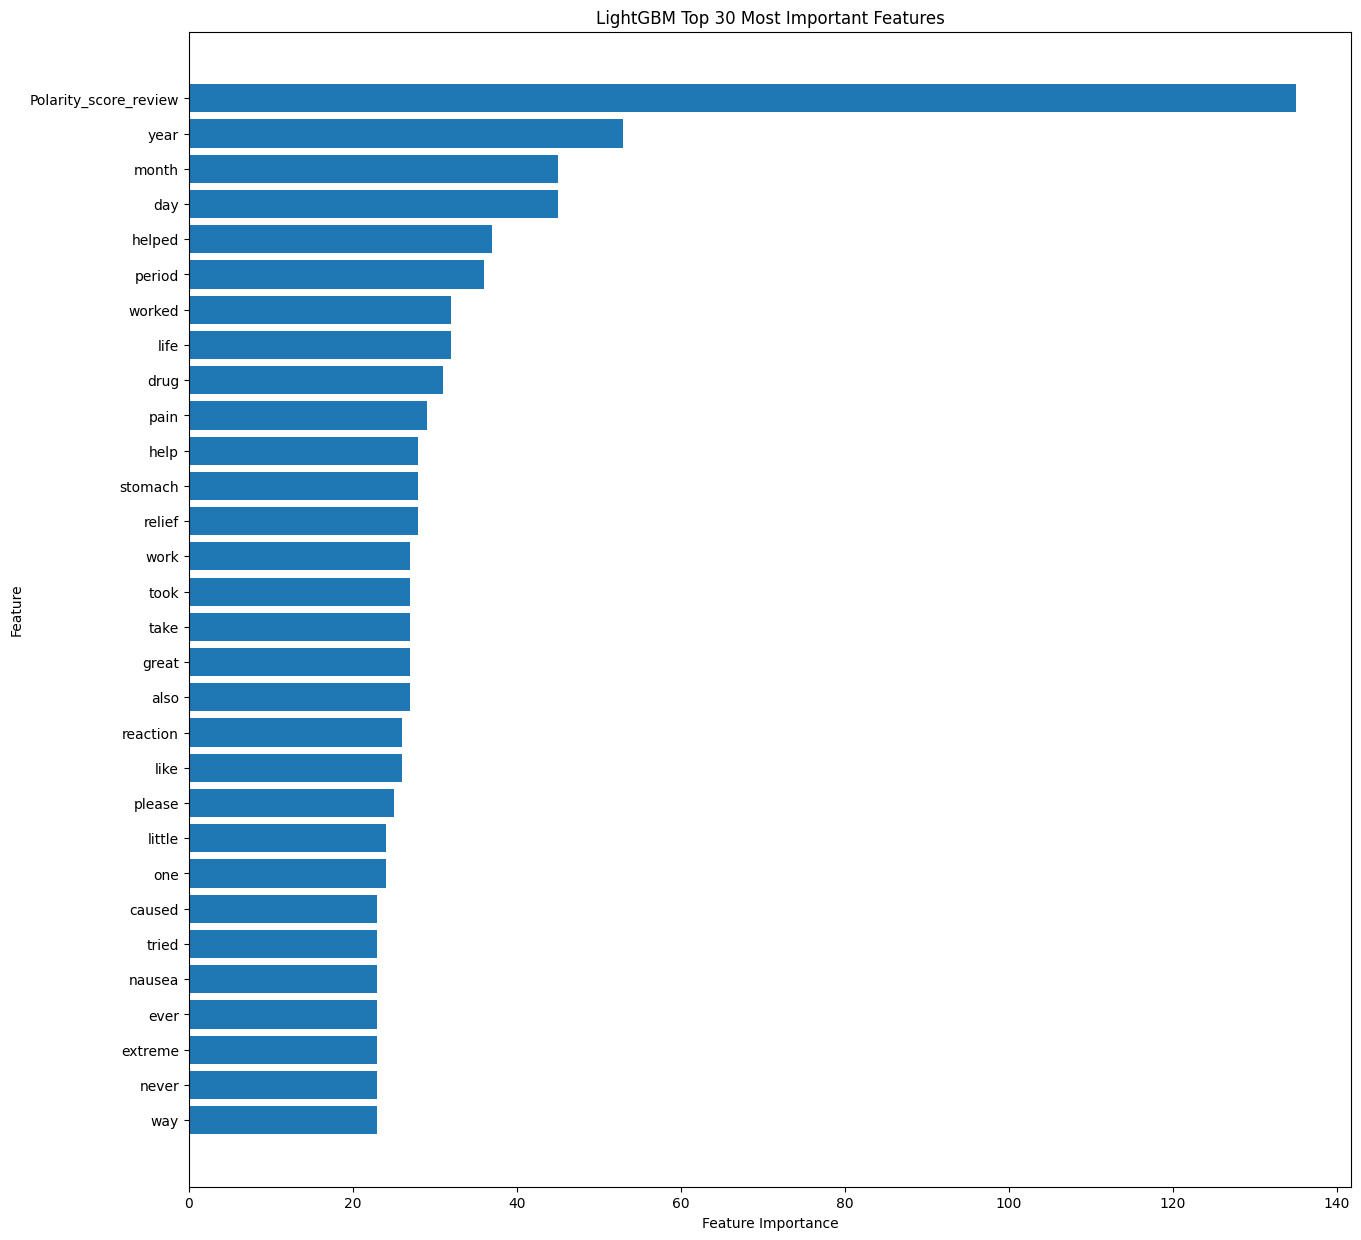

In [25]:
# Feature importance LightGBM
feature_importance = lgb_random1.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Top 30
n = 30
plt.figure(figsize=(15, 15))
plt.barh(range(n), feature_importance_df['Importance'].head(n), align='center')
plt.yticks(range(n), feature_importance_df['Feature'].head(n))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('LightGBM Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.savefig('/content/drive/MyDrive/3_classes/LGBM_featureimportance', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## SVC with unigrams, bigrams and polarity score, without features 'Age', 'Gender'

In [1609]:
# Hyperparameter tuning SVC GidSearch
start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr'],
    'class_weight': ['balanced'], 
} 

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   
svm_classifier = SVC(random_state=42)
svm_random = GridSearchCV(estimator=svm_classifier,
                                param_grid=param_grid,                
                                cv=k_fold,                        
                                scoring='neg_mean_absolute_error',          
                                n_jobs=5,
                                verbose = 3)  

svm_random.fit(X_train, y_train)

print("Best Parameters:", svm_random.best_params_)
print("Best score found: ",-svm_random.best_score_)
print ('Best estimator:', svm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.996 total time=15.5min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.995 total time=15.8min
[CV 2/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.998 total time=16.3min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.995 total time=16.3min
[CV 4/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.998 total time=16.3min
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time=15.8min
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time=15.4min
[CV 2/5] END C=0.1, class_weight=balanced, decision_

In [1610]:
# Save Gridsearch and 5CV results 
SVC_nofeat_CV = pd.DataFrame(svm_random.cv_results_)
SVC_nofeat_CV.to_csv('SVC_nofeat_CV.csv', index=False)
box_fig = pd.read_csv('SVC_nofeat_CV.csv')

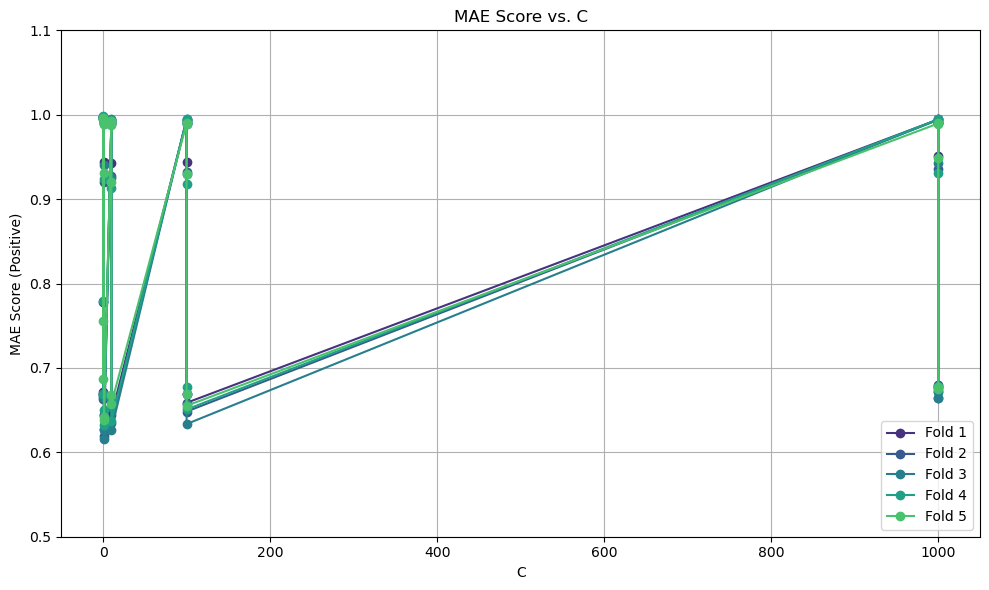

In [1611]:
plt.figure(figsize=(10, 6))
for i in range(test_scores_flipped.shape[0]):
    plt.plot(C_values, test_scores_flipped[i], marker='o', linestyle='-', label=f'Fold {i+1}')

plt.xlabel('C')
plt.ylabel('MAE Score (Positive)')
plt.title('MAE Score vs. C')
plt.legend()
plt.grid(True)
plt.ylim(0.5, 1.1)
plt.tight_layout()
plt.savefig('MAE_vsC.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

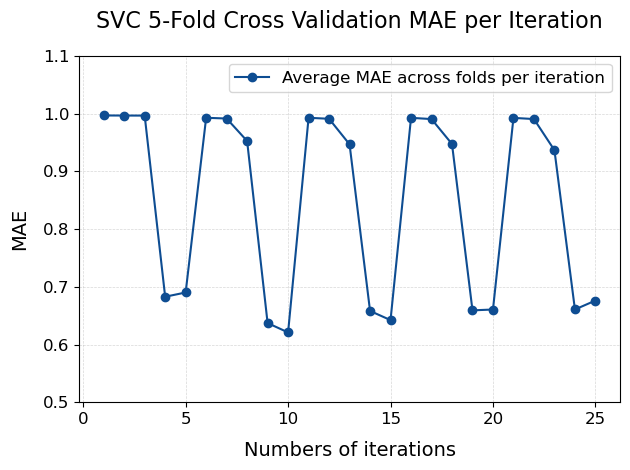

In [1613]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('SVC 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('SVC_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [1614]:
# Trained SVC predict test data with best estimator
svm_random1 = svm_random.best_estimator_
y_pred = svm_random1.predict(X_test)

Test MAE: 0.621
Test RMSE: 0.958
Test CWK: 0.326


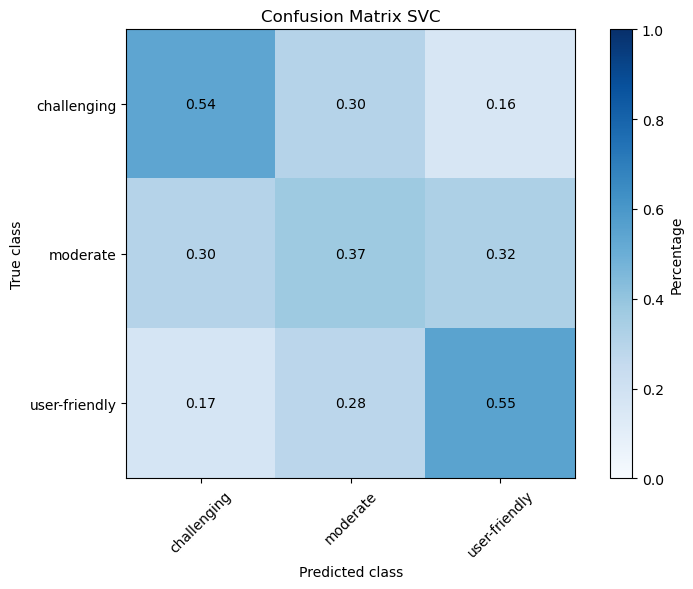

In [1615]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('SVC_confusionmatrixTB', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## SVC unigrams and bigrams without additional features 

In [167]:
# Hyperparameter tuning SVC GidSearch
start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr'],
    'class_weight': ['balanced'], 
} 

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   
svm_classifier = SVC(random_state=42)
svm_random = GridSearchCV(estimator=svm_classifier,
                                param_grid=param_grid,                
                                cv=k_fold,                        
                                scoring='neg_mean_absolute_error',          
                                n_jobs=5,
                                verbose = 3)  

svm_random.fit(X_train, y_train)

print("Best Parameters:", svm_random.best_params_)
print("Best score found: ",-svm_random.best_score_)
print ('Best estimator:', svm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.996 total time=15.1min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.996 total time=16.2min
[CV 4/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf;, score=-0.997 total time=16.7min
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=-0.702 total time=16.0min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.0001, kernel=rbf;, score=-0.659 total time=15.6min
[CV 3/5] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.994 total time=27.8min
[CV 5/5] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.991 total time=23.1min
[CV 4/5] END C=1, class_weight=balanced, dec

In [168]:
# Save Gridsearch and 5CV results 
SVC_UB_nofeat_CV = pd.DataFrame(svm_random.cv_results_)
SVC_UB_nofeat_CV.to_csv('SVC_UB_nofeat_CV.csv', index=False)
box_fig = pd.read_csv('SVC_UB_nofeat_CV.csv')

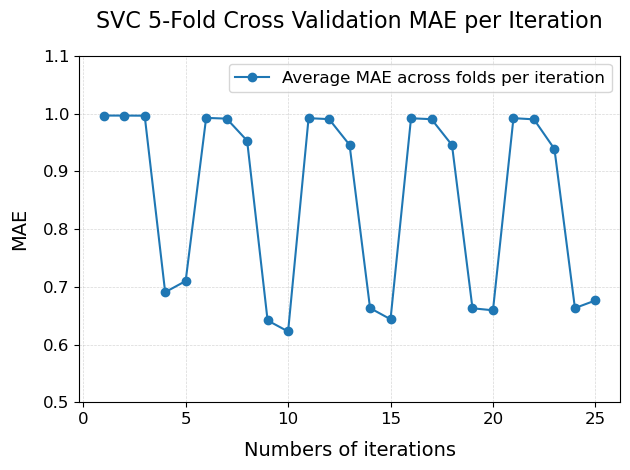

In [169]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('SVC 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('SVC_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [170]:
# Trained SVC predict test data with best estimator
svm_random1 = svm_random.best_estimator_
y_pred = svm_random1.predict(X_test)

Test MAE: 0.631
Test RMSE: 0.964
Test CWK: 0.319


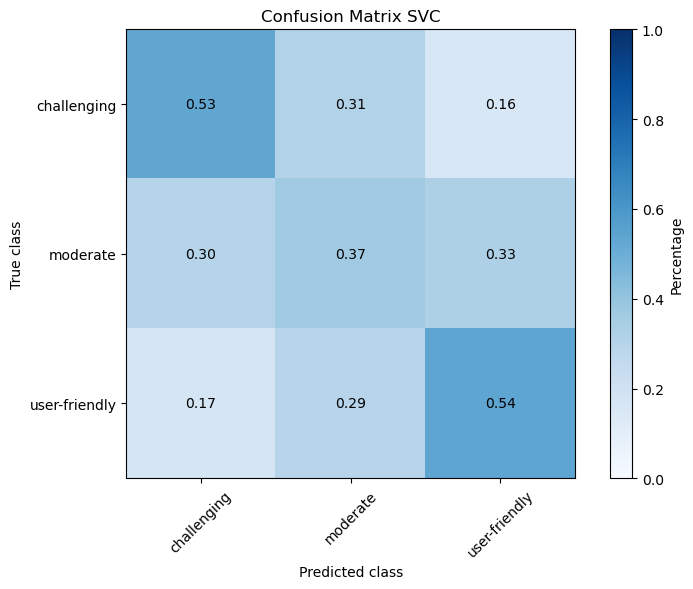

In [171]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('SVC_confusionmatrixTB', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## SVC Unigrams without additional features

In [197]:
# Hyperparameter tuning SVC GidSearch
start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr'],
    'class_weight': ['balanced'], 
} 

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   
svm_classifier = SVC(random_state=42)
svm_random = GridSearchCV(estimator=svm_classifier,
                                param_grid=param_grid,                
                                cv=k_fold,                        
                                scoring='neg_mean_absolute_error',          
                                n_jobs=5,
                                verbose = 3)  

svm_random.fit(X_train, y_train)

print("Best Parameters:", svm_random.best_params_)
print("Best score found: ",-svm_random.best_score_)
print ('Best estimator:', svm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.996 total time=13.6min
[CV 2/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.998 total time=14.0min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf;, score=-0.996 total time=14.1min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=-0.659 total time=12.7min
[CV 4/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.0001, kernel=rbf;, score=-0.663 total time=12.5min
[CV 4/5] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.993 total time=21.8min
[CV 4/5] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.990 total time=23.3min
[CV 5/5] END C=1, class_weight=balanced, dec

In [199]:
# Save Gridsearch and 5CV results 
SVC_U_nofeat_CV = pd.DataFrame(svm_random.cv_results_)
SVC_U_nofeat_CV.to_csv('SVC_U_nofeat_CV.csv', index=False)
box_fig = pd.read_csv('SVC_U_nofeat_CV.csv')

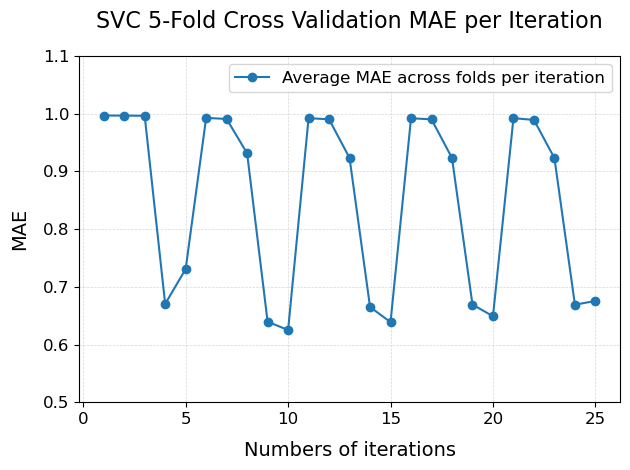

In [200]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('SVC 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('SVC_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [201]:
# Trained SVC predict test data with best estimator
svm_random1 = svm_random.best_estimator_
y_pred = svm_random1.predict(X_test)

Test MAE: 0.627
Test RMSE: 0.960
Test CWK: 0.319


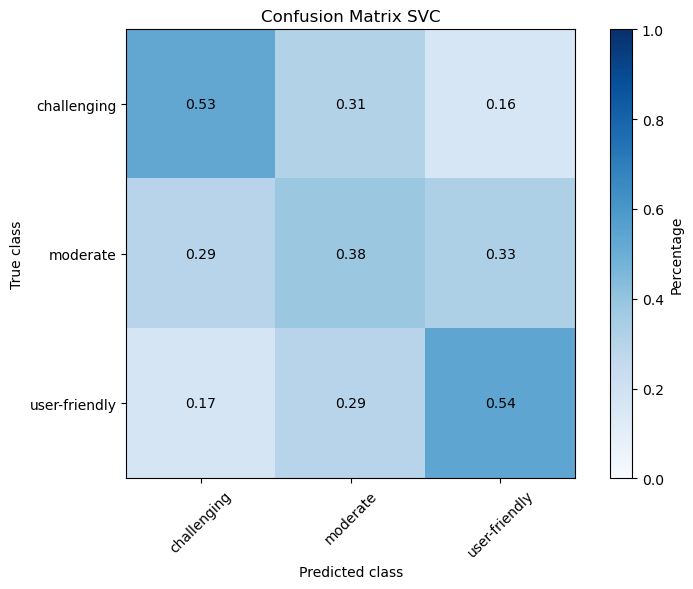

In [202]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('SVC_confusionmatrixTB', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

## SVC Unigrams + polarity no additional features

In [227]:
# Hyperparameter tuning SVC GidSearch
start_time = time.time()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr'],
    'class_weight': ['balanced'], 
} 

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   
svm_classifier = SVC(random_state=42)
svm_random = GridSearchCV(estimator=svm_classifier,
                                param_grid=param_grid,                
                                cv=k_fold,                        
                                scoring='neg_mean_absolute_error',          
                                n_jobs=5,
                                verbose = 3)  

svm_random.fit(X_train, y_train)

print("Best Parameters:", svm_random.best_params_)
print("Best score found: ",-svm_random.best_score_)
print ('Best estimator:', svm_random.best_estimator_)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.995 total time=13.6min
[CV 2/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.998 total time=14.1min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf;, score=-0.996 total time=10.2min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.001, kernel=rbf;, score=-0.656 total time= 8.4min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.0001, kernel=rbf;, score=-0.664 total time= 8.4min
[CV 3/5] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf;, score=-0.994 total time=16.6min
[CV 5/5] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf;, score=-0.989 total time=13.9min
[CV 3/5] END C=1, class_weight=balanced, dec

In [228]:
# Save Gridsearch and 5CV results 
SVC_UT_nofeat_CV = pd.DataFrame(svm_random.cv_results_)
SVC_UT_nofeat_CV.to_csv('SVC_UT_nofeat_CV.csv', index=False)
box_fig = pd.read_csv('SVC_UT_nofeat_CV.csv')

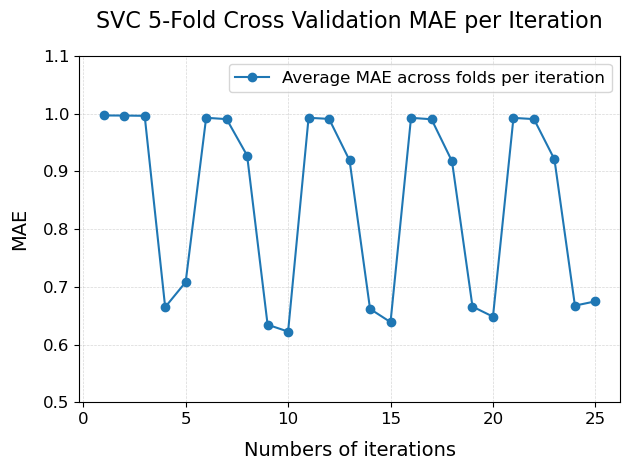

In [229]:
# Plot MAE scores average per cross validation
cv_scores = -box_fig['mean_test_score']
plt.plot(range(1, len(cv_scores) + 1), cv_scores, '-o', label='Average MAE across folds per iteration', color='#1f77b4')

plt.xlabel('Numbers of iterations', fontsize=14, labelpad=10)
plt.ylabel('MAE', fontsize=14, labelpad=10)
plt.title('SVC 5-Fold Cross Validation MAE per Iteration', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0.5, 1.1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('SVC_avg_mae_iteration', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [230]:
# Trained SVC predict test data with best estimator
svm_random1 = svm_random.best_estimator_
y_pred = svm_random1.predict(X_test)

Test MAE: 0.624
Test RMSE: 0.960
Test CWK: 0.320


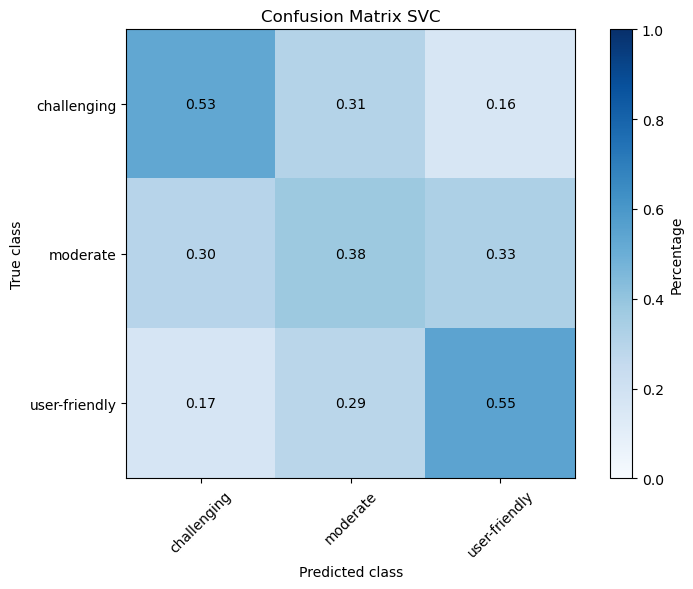

In [231]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.savefig('SVC_confusionmatrixTB', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

# some extra testing 

In [1759]:
# Test SVC 
start_time = time.time()

svc_test = SVC(kernel='rbf', decision_function_shape='ovr', verbose = 0,  random_state = 42)
svc_test.fit(X_train, y_train)
y_pred = svc_test.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Execution time: 0 hours, 14 minutes, 32 seconds


Test MAE: 0.645
Test RMSE: 0.984
Test CWK: 0.303


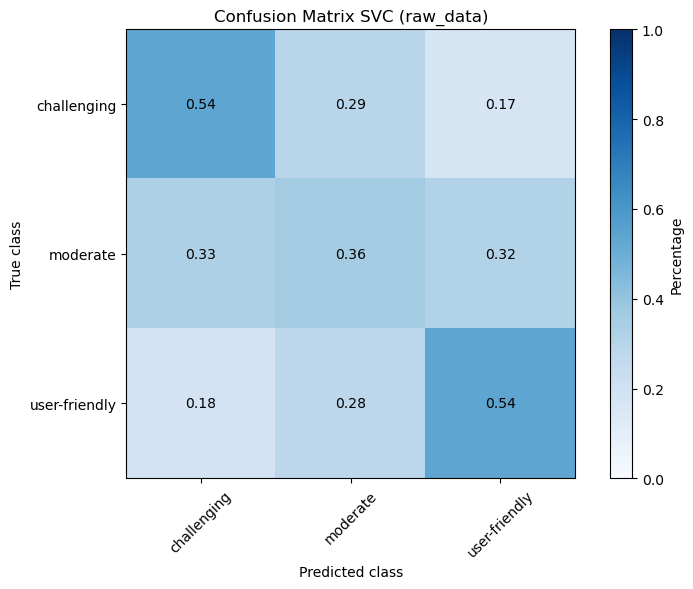

In [1760]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC (raw_data)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.show()

## Imbalanced raw with class weight

In [1711]:
# Test SVC only on review with class weights 
start_time = time.time()
class_weights = {1: 1, 2: 1.01, 3: 1}
svc_test = SVC(C=1, class_weight=class_weights, gamma=0.0001, random_state=42)
svc_test.fit(X_train, y_train)
y_pred = svc_test.predict(X_test)

end_time = time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print(f"Execution time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

Execution time: 0 hours, 13 minutes, 7 seconds


Test MAE: 0.624
Test RMSE: 0.956
Test CWK: 0.323


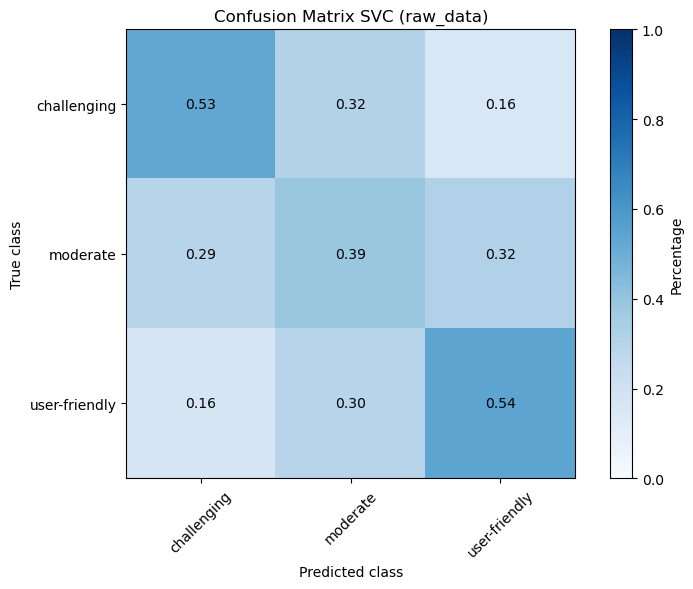

In [1712]:
# Evaluation
svc_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {svc_mae:.3f}')
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = svc_mse ** 0.5
print(f'Test RMSE: {svc_rmse:.3f}')
svc_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {svc_kappa:.3f}')

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix SVC (raw_data)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])
plt.tight_layout()
plt.show()

In [41]:
#Testing RF
testingRF = RandomForestClassifier(random_state = 42)
testingRF.fit(X_train, y_train)
y_pred = testingRF.predict(X_test)

Test MAE: 0.661
Test RMSE: 1.024
Test CWK: 0.284



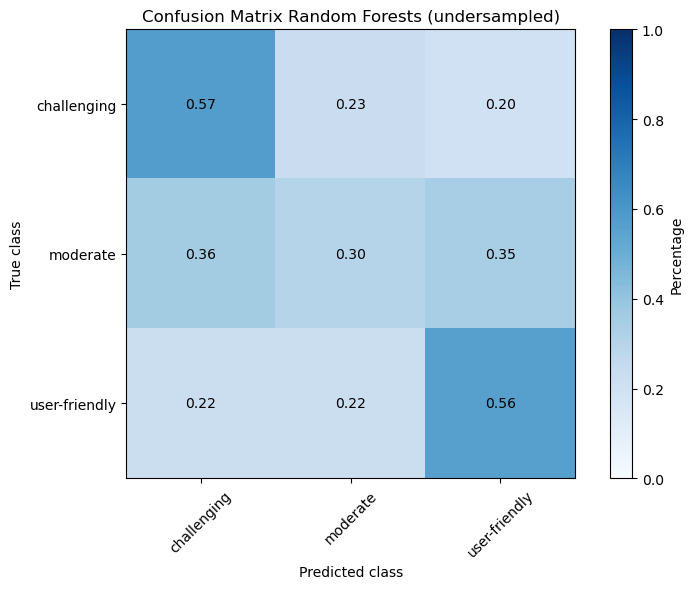

In [42]:
# Evaluation
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {rf_mae:.3f}')
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = rf_mse ** 0.5
print(f'Test RMSE: {rf_rmse:.3f}')
rf_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Test CWK: {rf_kappa:.3f}')
print ()

# Confusion matrix
class_labels = {1: 'challenging', 2: 'moderate', 3: 'user-friendly'}
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.title('Confusion Matrix Random Forests (undersampled)')
plt.colorbar(label='Percentage')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix_percent[i, j]:.2f}', ha='center', va='center', color='black')

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.xticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)], rotation=45)
plt.yticks(np.arange(len(class_labels)), [class_labels[i] for i in sorted(class_labels)])

plt.tight_layout()
# plt.savefig('RFconfusion_matrix_baseline.png')
plt.show()

In [43]:
confusion_matrix(y_test, y_pred)

array([[ 737,  293,  258],
       [ 295,  245,  285],
       [1210, 1201, 3055]])